In [17]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
dataset_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_With_Scores.csv"
df = pd.read_csv(dataset_path)

# Remove the 'Year' column
df = df.drop(columns=['Year'], errors='ignore')

# Compute and display descriptive statistics
print(df.describe())

# Save the cleaned dataset
df.to_csv(r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_Cleaned.csv", index=False)


        Fatalities  Max Wind Speed_mph  Pressure_MB  Storm Surge_ft  \
count   150.000000          150.000000   150.000000      150.000000   
mean    159.133333          117.566667   953.646667       10.353333   
std     557.154054           27.310891    22.165375        4.619969   
min       1.000000           65.000000   882.000000        3.000000   
25%      10.000000          105.000000   941.000000        6.250000   
50%      36.500000          117.500000   954.000000       10.000000   
75%      83.250000          130.000000   965.000000       12.750000   
max    6000.000000          190.000000   997.000000       28.000000   

       Precip_total_in  RISK_SCORE  Population Density  Fatality Rate  \
count       150.000000  150.000000          150.000000     150.000000   
mean         18.786667   95.451055          726.880046       0.000946   
std          10.266638    5.725006         3195.772285       0.002720   
min           6.000000   70.219535            8.653466       0.00000

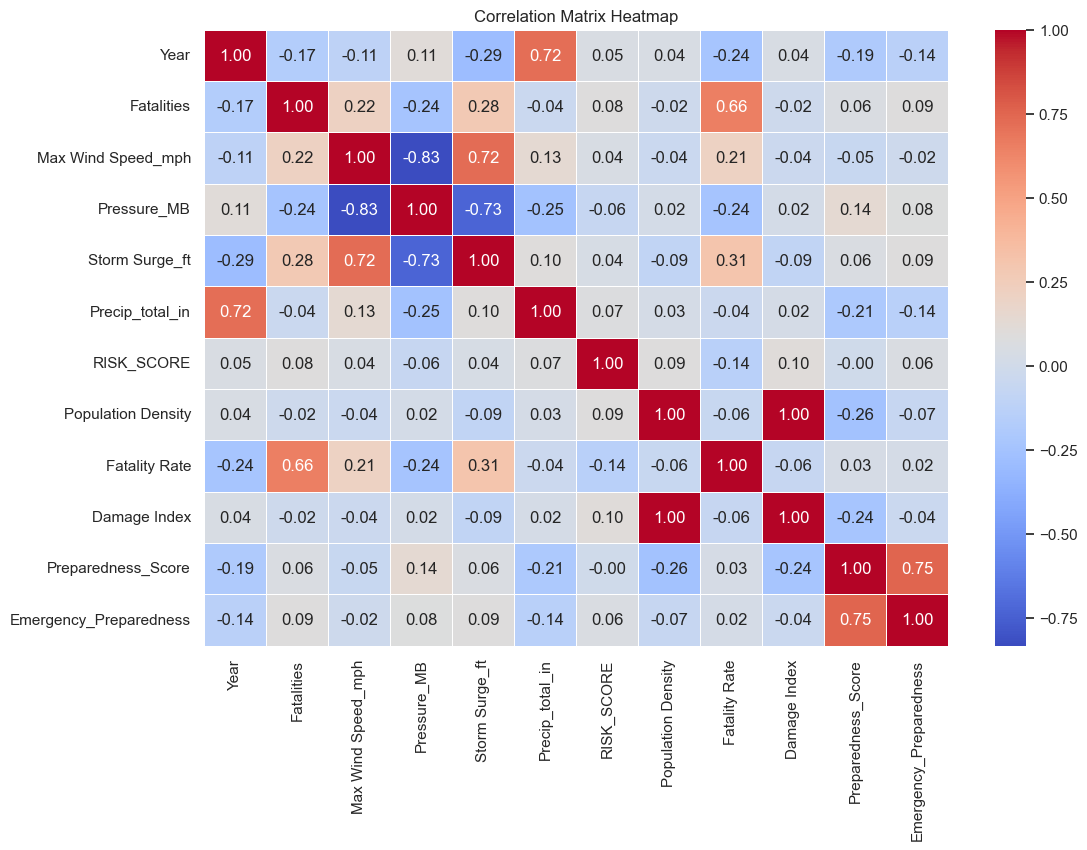

In [18]:
df = pd.read_csv(dataset_path)

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()



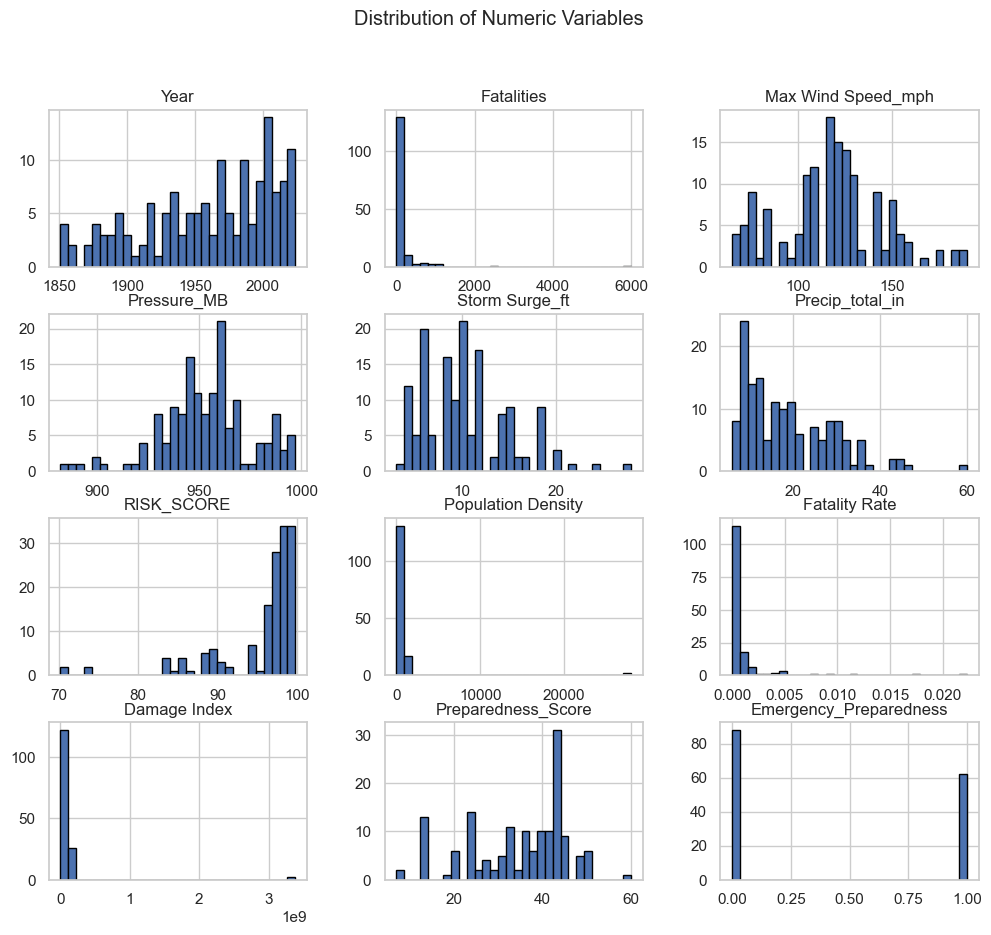

In [19]:
# Plot histograms for all numeric variables
df_numeric.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numeric Variables")
plt.show()

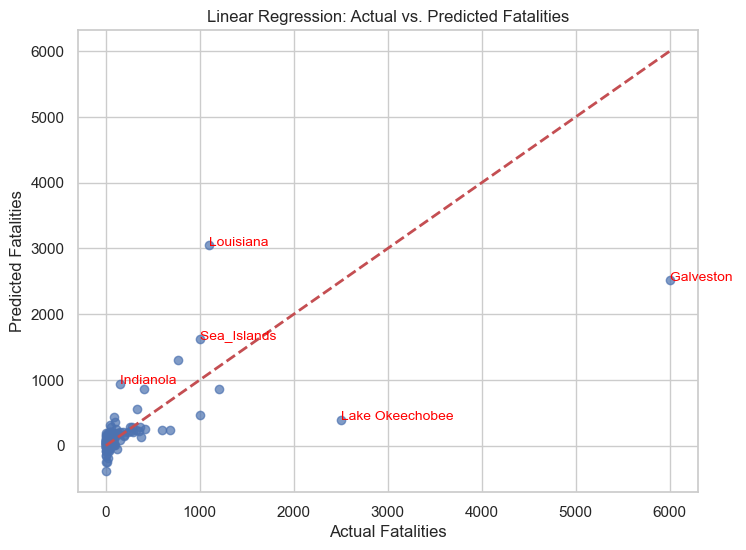

Identified Outliers:
           Hurricanes  Fatalities
124        Galveston         6000
110  Lake Okeechobee         2500
131        Louisiana         1100
133        Indianola          150
130      Sea_Islands         1000


In [21]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Define independent (X) and dependent (y) variables
X = df_numeric.drop(columns=['Fatalities'], errors='ignore')
y = df_numeric['Fatalities']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict fatalities
y_pred = model.predict(X)

# Compute residuals
residuals = y - y_pred

# Identify outliers using a threshold (e.g., top 5 largest residuals)
outlier_indices = np.abs(residuals).nlargest(5).index
outliers = df.loc[outlier_indices, ["Hurricanes", "Fatalities"]]

# Plot regression results
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Ideal fit line
plt.xlabel("Actual Fatalities")
plt.ylabel("Predicted Fatalities")
plt.title("Linear Regression: Actual vs. Predicted Fatalities")

# Highlight outliers
for i in outlier_indices:
    plt.annotate(df.loc[i, "Hurricanes"], (y.iloc[i], y_pred[i]), fontsize=10, color='red')

plt.show()

# Display outliers
print("Identified Outliers:")
print(outliers)


Mean Squared Error: 585705.2792567592
R-Squared: -1.253047835232969


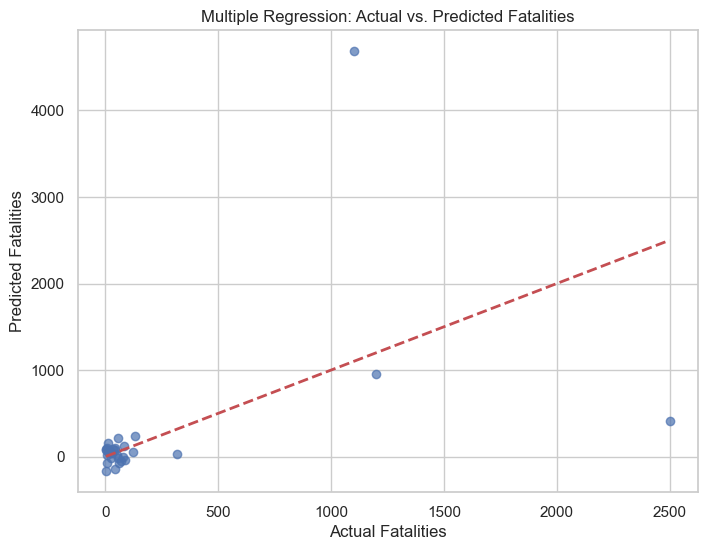

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_numeric.drop(columns=['Fatalities'], errors='ignore')
y = df_numeric['Fatalities']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Fatalities")
plt.ylabel("Predicted Fatalities")
plt.title("Multiple Regression: Actual vs. Predicted Fatalities")
plt.show()


Mean Squared Error: 25457653.450189196
R-Squared: -96.92862217128115


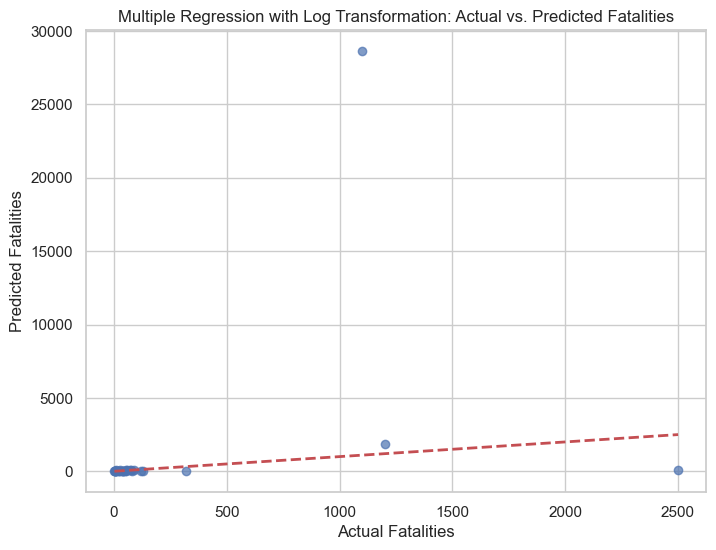

In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Apply log transformation to fatalities
df_numeric["Log_Fatalities"] = np.log1p(df_numeric["Fatalities"])  # log1p prevents log(0) errors

# Define independent (X) and dependent (y) variables
X = df_numeric.drop(columns=['Fatalities', 'Log_Fatalities'], errors='ignore')
y = df_numeric["Log_Fatalities"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred_log = model.predict(X_test)

# Convert predictions back to original scale
y_pred = np.expm1(y_pred_log)  # Reverse log transformation

# Evaluate model performance
mse = mean_squared_error(np.expm1(y_test), y_pred)  # Compare in original scale
r2 = r2_score(np.expm1(y_test), y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(np.expm1(y_test), y_pred, alpha=0.7)
plt.plot([np.expm1(y_test).min(), np.expm1(y_test).max()], 
         [np.expm1(y_test).min(), np.expm1(y_test).max()], 'r--', lw=2)
plt.xlabel("Actual Fatalities")
plt.ylabel("Predicted Fatalities")
plt.title("Multiple Regression with Log Transformation: Actual vs. Predicted Fatalities")
plt.show()


Removed Outliers:
           Hurricanes  Fatalities
110  Lake Okeechobee         2500
124        Galveston         6000


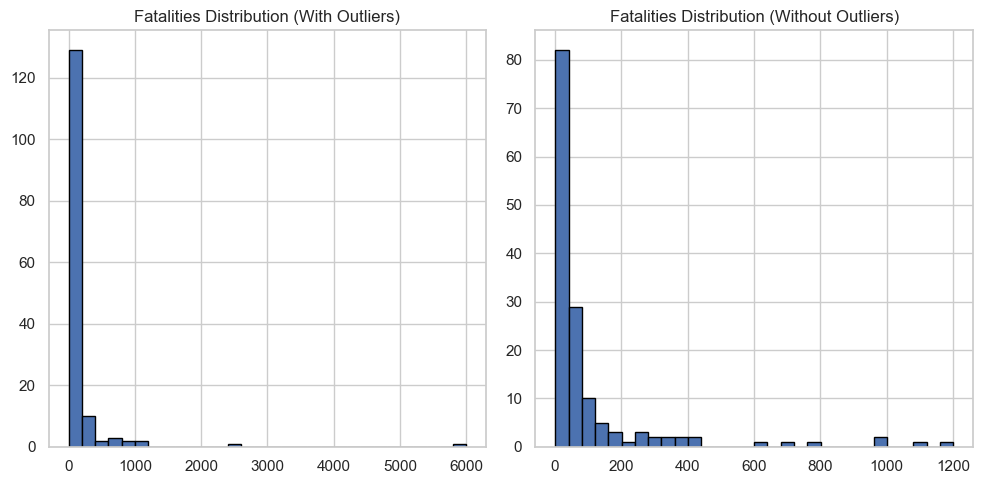

In [24]:
from scipy.stats import zscore

# Compute Z-scores for Fatalities
df["Fatalities_Z"] = zscore(df["Fatalities"])

# Define an outlier threshold (e.g., Z-score > 3)
outlier_threshold = 3

# Identify outliers
outliers = df[df["Fatalities_Z"].abs() > outlier_threshold]

# Remove outliers
df_cleaned = df[df["Fatalities_Z"].abs() <= outlier_threshold].drop(columns=["Fatalities_Z"])

# Display the removed outliers
print("Removed Outliers:")
print(outliers[["Hurricanes", "Fatalities"]])

# Save cleaned dataset
df_cleaned.to_csv("FINAL_Dataset_Cleaned_No_Outliers.csv", index=False)

# Plot Fatalities before and after removing outliers
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df["Fatalities"], bins=30, edgecolor='black')
plt.title("Fatalities Distribution (With Outliers)")

plt.subplot(1, 2, 2)
plt.hist(df_cleaned["Fatalities"], bins=30, edgecolor='black')
plt.title("Fatalities Distribution (Without Outliers)")

plt.tight_layout()
plt.show()


MSE: 22782.38308607193
R²: 0.5233959634716003


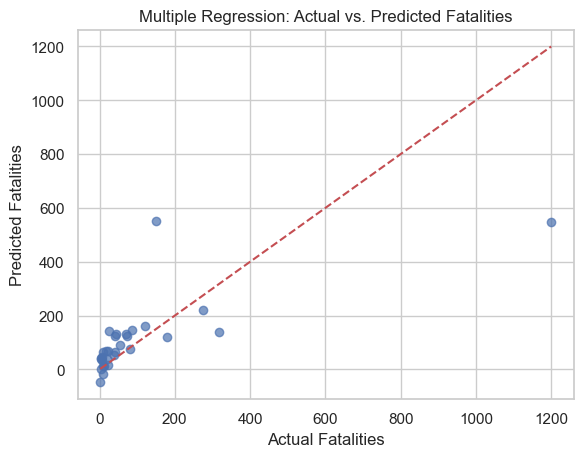

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Remove non-numeric columns
X = df_cleaned.select_dtypes(include=['number']).drop(columns=['Fatalities'], errors='ignore')
y = df_cleaned['Fatalities']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression().fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

# Plot results
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fatalities")
plt.ylabel("Predicted Fatalities")
plt.title("Multiple Regression: Actual vs. Predicted Fatalities")
plt.show()



Mean Squared Error: 47677.69300664538
R²: 0.0025898145299367847


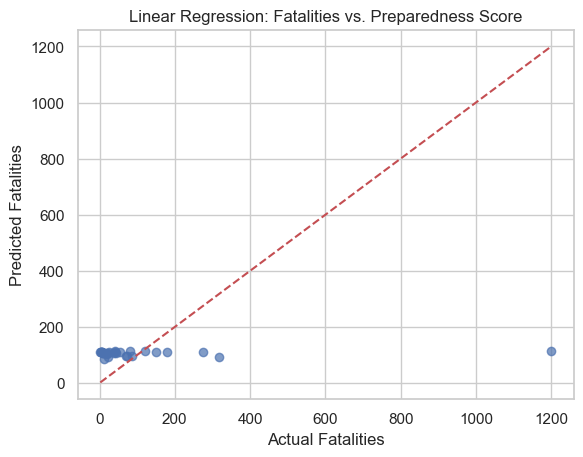

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
dataset_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_no_unneeded_data.csv"
df = pd.read_csv(dataset_path)

# Ensure "Preparedness_Score" is numeric
df["Preparedness_Score"] = pd.to_numeric(df["Preparedness_Score"], errors="coerce")

# Drop rows with missing values
df = df.dropna()

# Define independent (X) and dependent (y) variables
X = df[["Preparedness_Score"]]
y = df["Fatalities"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression().fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R²:", r2)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fatalities")
plt.ylabel("Predicted Fatalities")
plt.title("Linear Regression: Fatalities vs. Preparedness Score")
plt.show()




Mean Squared Error: 22671.591260750592
R²: 0.5257137118372128


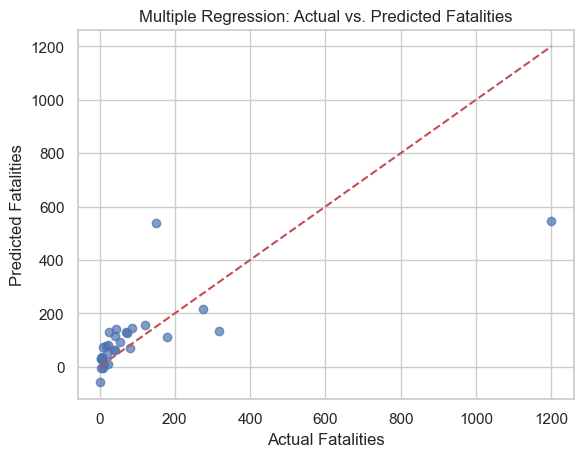

In [31]:
# Ensure "Preparedness_Score" is numeric
df["Preparedness_Score"] = pd.to_numeric(df["Preparedness_Score"], errors="coerce")

# Drop rows with missing values
df = df.dropna()

# Define independent (X) and dependent (y) variables
X = df[["Max Wind Speed_mph", "Pressure_MB", "Storm Surge_ft", "Precip_total_in",
        "RISK_SCORE", "Population Density", "Fatality Rate", "Damage Index", "Preparedness_Score"]]
y = df["Fatalities"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression().fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R²:", r2)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fatalities")
plt.ylabel("Predicted Fatalities")
plt.title("Multiple Regression: Actual vs. Predicted Fatalities")
plt.show()

Removed Outliers:
             Hurricanes  Fatalities
29             Katrina         1200
115           Key West          772
127  Cheniere_Caminada         1000
128        Sea_Islands         1000
129          Louisiana         1100


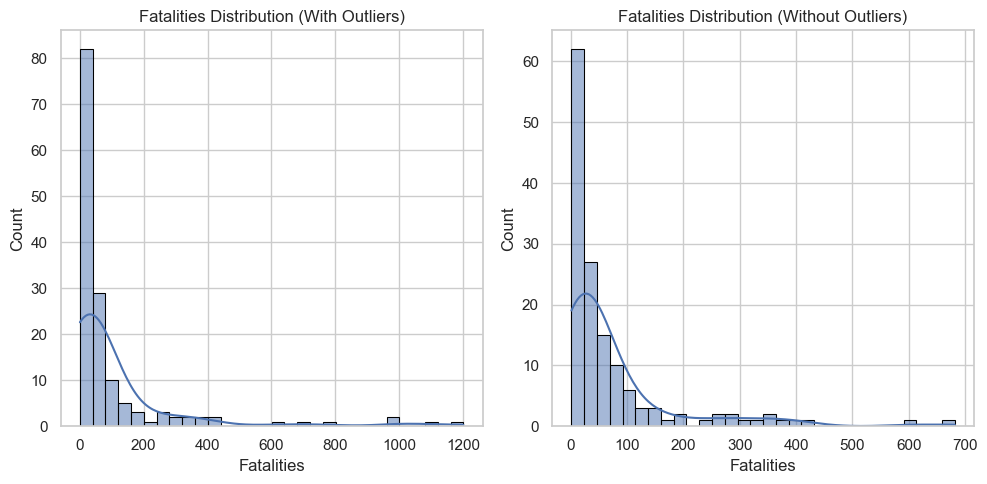

'C:\\Users\\dson.AzureAD\\PROJECT_4\\proj_4_docs\\FINAL_Dataset_Cleaned_No_Outliers.csv'

In [32]:
import numpy as np
import seaborn as sns

# Compute Z-scores for Fatalities
df["Fatalities_Z"] = np.abs((df["Fatalities"] - df["Fatalities"].mean()) / df["Fatalities"].std())

# Define an outlier threshold (e.g., Z-score > 3)
outlier_threshold = 3

# Identify outliers
outliers = df[df["Fatalities_Z"] > outlier_threshold]

# Remove outliers
df_cleaned = df[df["Fatalities_Z"] <= outlier_threshold].drop(columns=["Fatalities_Z"])

# Display the removed outliers
print("Removed Outliers:")
print(outliers[["Hurricanes", "Fatalities"]])

# Save cleaned dataset
cleaned_dataset_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_Cleaned_No_Outliers.csv"
df_cleaned.to_csv(cleaned_dataset_path, index=False)

# Plot Fatalities before and after removing outliers
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df["Fatalities"], bins=30, kde=True, edgecolor='black')
plt.title("Fatalities Distribution (With Outliers)")

plt.subplot(1, 2, 2)
sns.histplot(df_cleaned["Fatalities"], bins=30, kde=True, edgecolor='black')
plt.title("Fatalities Distribution (Without Outliers)")

plt.tight_layout()
plt.show()

# Output cleaned dataset path
cleaned_dataset_path


Mean Squared Error: 18970.57988204361
R²: 0.1281518636778829


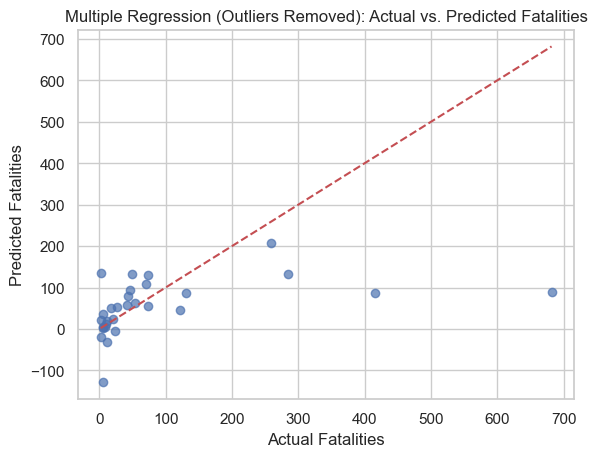

In [33]:
# Reload the cleaned dataset without outliers
dataset_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_Cleaned_No_Outliers.csv"
df_cleaned = pd.read_csv(dataset_path)

# Define independent (X) and dependent (y) variables
X = df_cleaned[["Max Wind Speed_mph", "Pressure_MB", "Storm Surge_ft", "Precip_total_in",
                "RISK_SCORE", "Population Density", "Fatality Rate", "Damage Index", "Preparedness_Score"]]
y = df_cleaned["Fatalities"]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate performance
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R²:", r2)

# Plot actual vs predicted values
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fatalities")
plt.ylabel("Predicted Fatalities")
plt.title("Multiple Regression (Outliers Removed): Actual vs. Predicted Fatalities")
plt.show()


Mean Squared Error: 22671.591260750592
R²: 0.5257137118372128


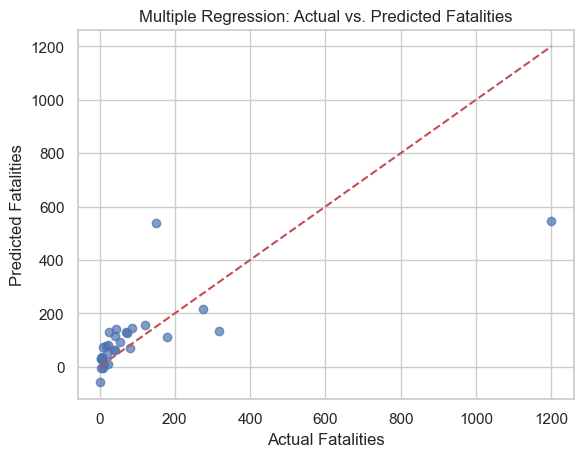

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
dataset_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_no_unneeded_data.csv"
df = pd.read_csv(dataset_path)

# Ensure "Preparedness_Score" is numeric
df["Preparedness_Score"] = pd.to_numeric(df["Preparedness_Score"], errors="coerce")

# Drop rows with missing values
df = df.dropna()

# Define independent (X) and dependent (y) variables
X = df[["Max Wind Speed_mph", "Pressure_MB", "Storm Surge_ft", "Precip_total_in",
        "RISK_SCORE", "Population Density", "Fatality Rate", "Damage Index", "Preparedness_Score"]]
y = df["Fatalities"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression().fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R²:", r2)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fatalities")
plt.ylabel("Predicted Fatalities")
plt.title("Multiple Regression: Actual vs. Predicted Fatalities")
plt.show()


Feature Importance Comparison:
              Feature  Linear Regression  Random Forest
6       Fatality Rate       5.535660e+04       0.654325
4          RISK_SCORE       4.365807e+00       0.069335
7        Damage Index       4.481263e-07       0.065454
5  Population Density       5.360997e-02       0.055319
2      Storm Surge_ft       1.104475e+01       0.051002
1         Pressure_MB       1.025262e+00       0.039488
8  Preparedness_Score       5.259765e-01       0.029597
3     Precip_total_in       2.706661e-01       0.024078
0  Max Wind Speed_mph       6.823916e-01       0.011400


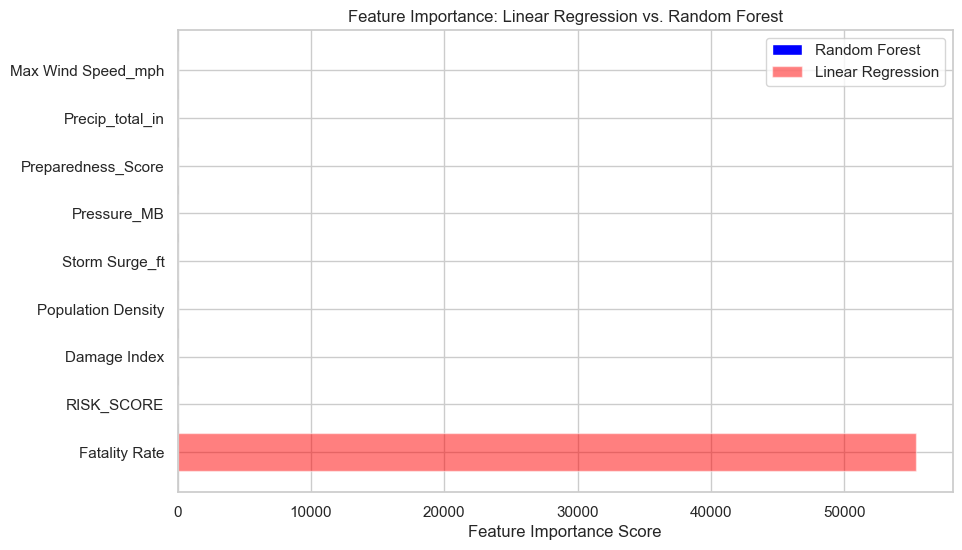

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load dataset
dataset_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_no_unneeded_data.csv"
df = pd.read_csv(dataset_path)

# Define features and target variable
X = df[["Max Wind Speed_mph", "Pressure_MB", "Storm Surge_ft", "Precip_total_in",
        "RISK_SCORE", "Population Density", "Fatality Rate", "Damage Index", "Preparedness_Score"]]
y = df["Fatalities"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **1. Linear Regression Feature Importance**
linear_model = LinearRegression().fit(X_train, y_train)
linear_importance = np.abs(linear_model.coef_)

### **2. Random Forest Feature Importance**
rf_model = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
rf_importance = rf_model.feature_importances_

### **3. Compare Feature Importance**
feature_names = X.columns
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Linear Regression": linear_importance,
    "Random Forest": rf_importance
}).sort_values(by="Random Forest", ascending=False)

print("Feature Importance Comparison:")
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Random Forest"], color="blue", label="Random Forest")
plt.barh(importance_df["Feature"], importance_df["Linear Regression"], color="red", alpha=0.5, label="Linear Regression")
plt.xlabel("Feature Importance Score")
plt.title("Feature Importance: Linear Regression vs. Random Forest")
plt.legend()
plt.show()


Mean Squared Error: 39539.138305361535
R²: 0.17284715799943617


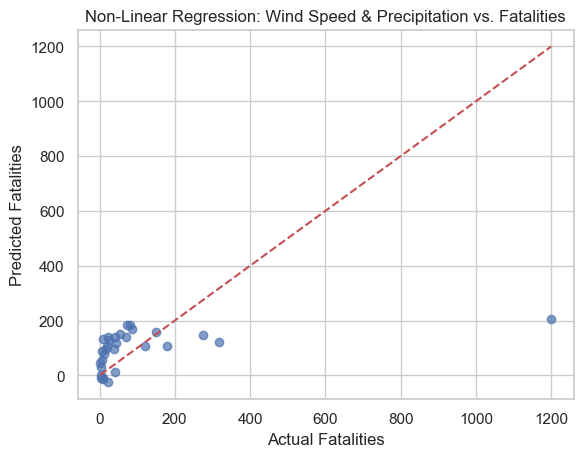

Feature Importance for Non-Linear Test:
              Feature  Coefficient
0  Max Wind Speed_mph     3.780237
3      Precip_Squared    -0.000896
2  Wind_Speed_Squared    -0.006594
1     Precip_total_in    -0.393603


In [37]:
# Reload necessary libraries after execution state reset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Reload the dataset
dataset_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_no_unneeded_data.csv"
df = pd.read_csv(dataset_path)

# Create interaction terms for non-linear relationships
df["Wind_Speed_Squared"] = df["Max Wind Speed_mph"] ** 2
df["Precip_Squared"] = df["Precip_total_in"] ** 2

# Define independent (X) and dependent (y) variables
X = df[["Max Wind Speed_mph", "Precip_total_in", "Wind_Speed_Squared", "Precip_Squared"]]
y = df["Fatalities"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression().fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R²:", r2)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fatalities")
plt.ylabel("Predicted Fatalities")
plt.title("Non-Linear Regression: Wind Speed & Precipitation vs. Fatalities")
plt.show()

# Compare feature importance
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("Feature Importance for Non-Linear Test:")
print(importance_df)


Feature Importance Comparison (Without Fatality Rate):
              Feature  Linear Regression  Random Forest
1         Pressure_MB       3.144191e+00       0.266418
2      Storm Surge_ft       1.608365e+01       0.171550
3     Precip_total_in       1.100919e+00       0.151907
4          RISK_SCORE       8.866127e-01       0.140400
7  Preparedness_Score       1.141094e+00       0.079736
5  Population Density       8.855626e-02       0.067983
0  Max Wind Speed_mph       1.621071e+00       0.061143
6        Damage Index       7.487204e-07       0.060863


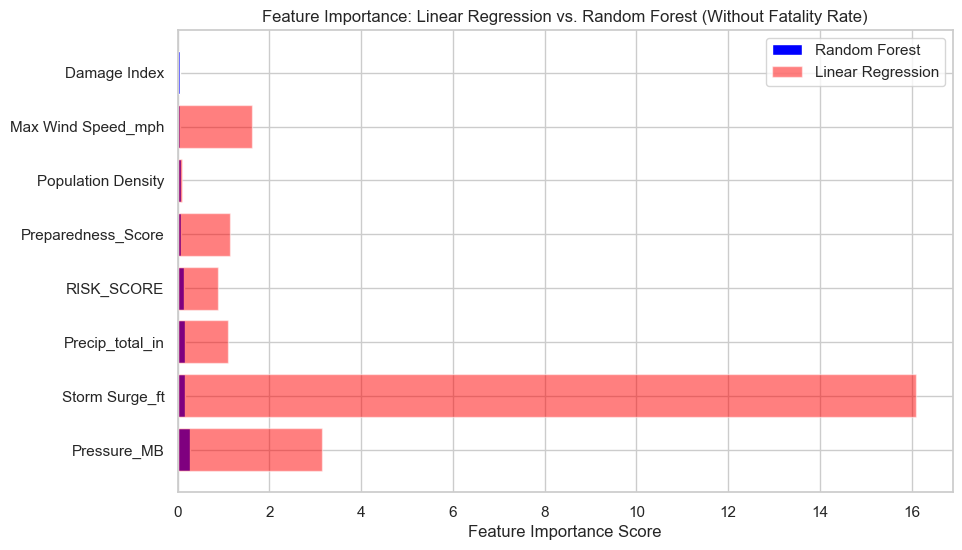

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load dataset
dataset_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_no_unneeded_data.csv"
df = pd.read_csv(dataset_path)

# Define features (excluding Fatality Rate) and target variable
X = df[["Max Wind Speed_mph", "Pressure_MB", "Storm Surge_ft", "Precip_total_in",
        "RISK_SCORE", "Population Density", "Damage Index", "Preparedness_Score"]]
y = df["Fatalities"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
linear_model = LinearRegression().fit(X_train, y_train)
linear_importance = np.abs(linear_model.coef_)

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
rf_importance = rf_model.feature_importances_

# Compare Feature Importance
feature_names = X.columns
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Linear Regression": linear_importance,
    "Random Forest": rf_importance
}).sort_values(by="Random Forest", ascending=False)

print("Feature Importance Comparison (Without Fatality Rate):")
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Random Forest"], color="blue", label="Random Forest")
plt.barh(importance_df["Feature"], importance_df["Linear Regression"], color="red", alpha=0.5, label="Linear Regression")
plt.xlabel("Feature Importance Score")
plt.title("Feature Importance: Linear Regression vs. Random Forest (Without Fatality Rate)")
plt.legend()
plt.show()


Mean Squared Error: 42246.47762146666
R²: 0.11621002564006555


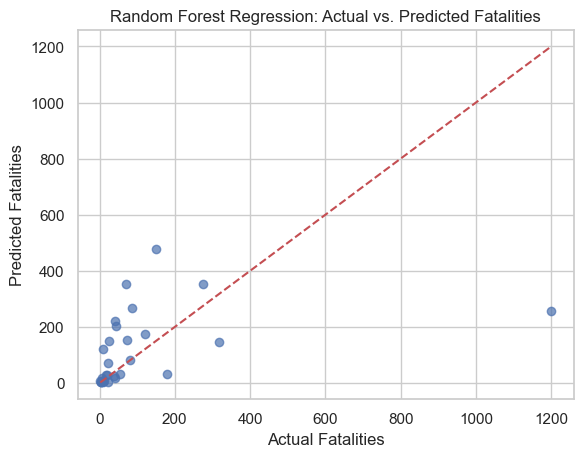

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
dataset_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_no_unneeded_data.csv"
df = pd.read_csv(dataset_path)

# Define strongest features based on feature importance analysis
X = df[["Pressure_MB", "Storm Surge_ft", "Precip_total_in", "RISK_SCORE"]]
y = df["Fatalities"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R²:", r2)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fatalities")
plt.ylabel("Predicted Fatalities")
plt.title("Random Forest Regression: Actual vs. Predicted Fatalities")
plt.show()


Mean Squared Error: 18813.750976666666
R²: 0.6064191518576794


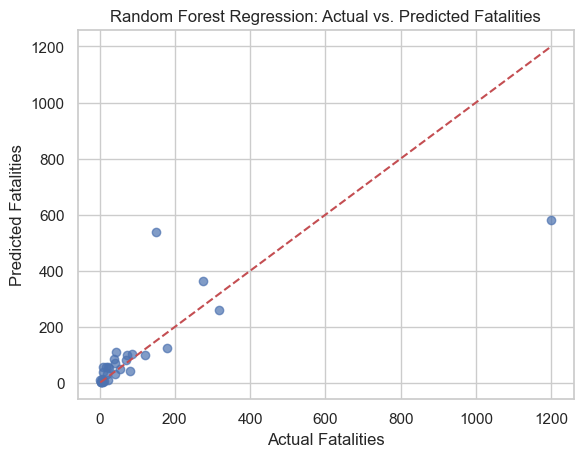

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
dataset_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_no_unneeded_data.csv"
df = pd.read_csv(dataset_path)

# Drop non-numeric columns (like hurricane names, states, etc.)
df = df.select_dtypes(include=["number"])

# Define features and target variable
X = df.drop(columns=["Fatalities"], errors="ignore")  # Exclude target variable
y = df["Fatalities"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R²:", r2)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fatalities")
plt.ylabel("Predicted Fatalities")
plt.title("Random Forest Regression: Actual vs. Predicted Fatalities")
plt.show()


Mean Squared Error: 18813.750976666666
R²: 0.6064191518576794


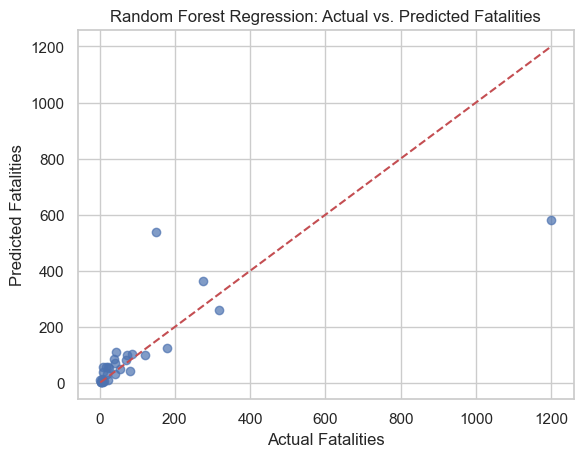

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
dataset_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_no_unneeded_data.csv"
df = pd.read_csv(dataset_path)

# Drop non-numeric columns
df = df.select_dtypes(include=["number"])

# Define features and target variable
X = df.drop(columns=["Fatalities"], errors="ignore")  # Exclude target variable
y = df["Fatalities"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R²:", r2)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fatalities")
plt.ylabel("Predicted Fatalities")
plt.title("Random Forest Regression: Actual vs. Predicted Fatalities")
plt.show()



Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 5}
Mean Squared Error: 17819.26151453976
R²: 0.627223722219961


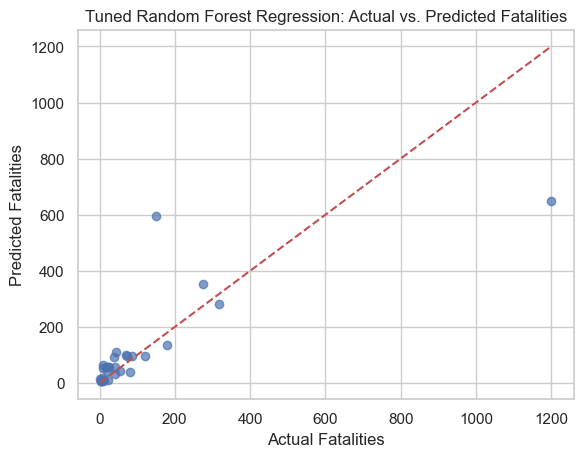

In [44]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid for random search
param_dist = {
    "n_estimators": [50, 100, 200, 300, 500],
    "max_depth": [5, 10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5, 10],
    "max_features": ["sqrt", "log2", None]
}

# Perform Randomized Search
rf_model = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=20, cv=3, scoring="r2", random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters from Randomized Search
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train Random Forest with best hyperparameters
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Predictions
y_pred = best_rf.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R²:", r2)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fatalities")
plt.ylabel("Predicted Fatalities")
plt.title("Tuned Random Forest Regression: Actual vs. Predicted Fatalities")
plt.show()


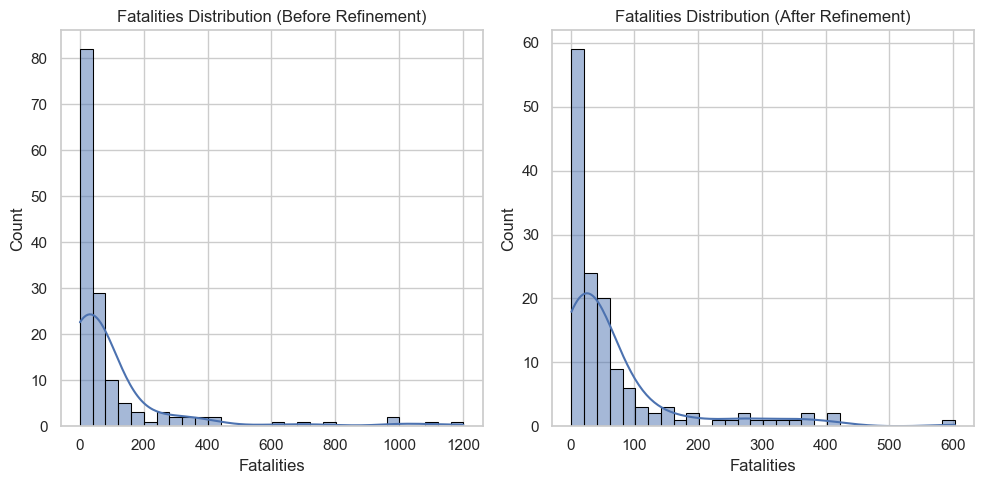

'C:\\Users\\dson.AzureAD\\PROJECT_4\\proj_4_docs\\FINAL_Dataset_Refined.csv'

In [45]:
import numpy as np

# Identify potential outliers using Z-score on Fatalities
df["Fatalities_Z"] = np.abs((df["Fatalities"] - df["Fatalities"].mean()) / df["Fatalities"].std())

# Define a stricter outlier threshold (e.g., Z-score > 2.5 instead of 3)
outlier_threshold = 2.5

# Remove outliers
df_refined = df[df["Fatalities_Z"] <= outlier_threshold].drop(columns=["Fatalities_Z"])

# Save refined dataset
refined_dataset_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_Refined.csv"
df_refined.to_csv(refined_dataset_path, index=False)

# Plot Fatalities before and after refining outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df["Fatalities"], bins=30, kde=True, edgecolor='black')
plt.title("Fatalities Distribution (Before Refinement)")

plt.subplot(1, 2, 2)
sns.histplot(df_refined["Fatalities"], bins=30, kde=True, edgecolor='black')
plt.title("Fatalities Distribution (After Refinement)")

plt.tight_layout()
plt.show()

# Output refined dataset path
refined_dataset_path


Mean Squared Error: 863.1973931034481
R²: 0.8606910960005558


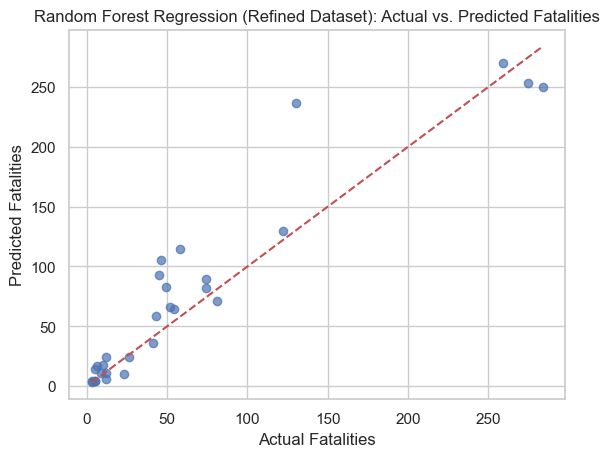

In [46]:
# Load the refined dataset
refined_dataset_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_Refined.csv"
df_refined = pd.read_csv(refined_dataset_path)

# Define features and target variable
X = df_refined.drop(columns=["Fatalities"], errors="ignore")  # Exclude target variable
y = df_refined["Fatalities"]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate performance
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R²:", r2)

# Plot actual vs predicted values
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fatalities")
plt.ylabel("Predicted Fatalities")
plt.title("Random Forest Regression (Refined Dataset): Actual vs. Predicted Fatalities")
plt.show()


XGBoost Mean Squared Error: 1566.420654296875
XGBoost R²: 0.7472000122070312


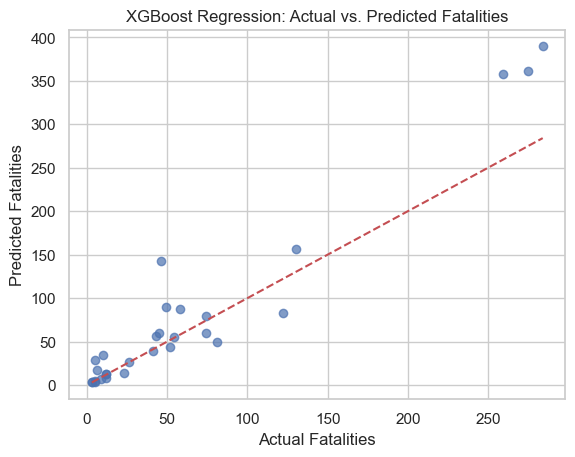

In [47]:
from xgboost import XGBRegressor

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Mean Squared Error:", mse_xgb)
print("XGBoost R²:", r2_xgb)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred_xgb, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fatalities")
plt.ylabel("Predicted Fatalities")
plt.title("XGBoost Regression: Actual vs. Predicted Fatalities")
plt.show()


Ensemble Model Mean Squared Error: 12104.175751128043
Ensemble Model R²: 0.746782459058744


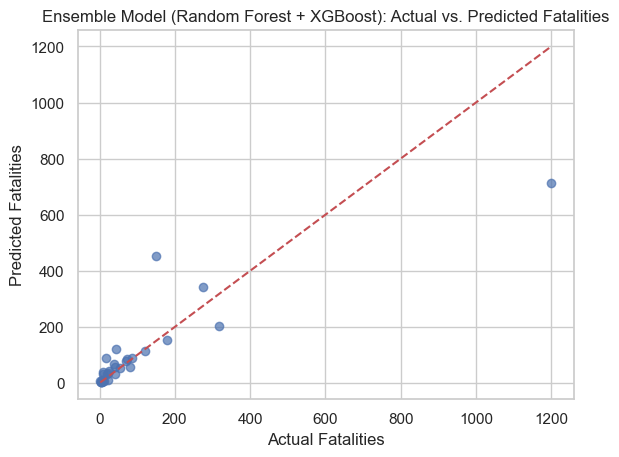

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
dataset_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_no_unneeded_data.csv"
df = pd.read_csv(dataset_path)

# Drop non-numeric columns
df = df.select_dtypes(include=["number"])

# Define features and target variable
X = df.drop(columns=["Fatalities"], errors="ignore")  # Exclude target variable
y = df["Fatalities"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Combine predictions: Take the average of Random Forest and XGBoost predictions
y_pred_ensemble = (y_pred_rf + y_pred_xgb) / 2

# Evaluate ensemble model performance
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

print("Ensemble Model Mean Squared Error:", mse_ensemble)
print("Ensemble Model R²:", r2_ensemble)

# Plot actual vs predicted values for ensemble model
plt.scatter(y_test, y_pred_ensemble, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fatalities")
plt.ylabel("Predicted Fatalities")
plt.title("Ensemble Model (Random Forest + XGBoost): Actual vs. Predicted Fatalities")
plt.show()


Feature Importance (Final Random Forest Model):
              Feature  Importance
7       Fatality Rate    0.646110
5          RISK_SCORE    0.072733
8        Damage Index    0.062429
3      Storm Surge_ft    0.049944
6  Population Density    0.044282
2         Pressure_MB    0.032663
9  Preparedness_Score    0.030835
0                Year    0.030826
4     Precip_total_in    0.016167
1  Max Wind Speed_mph    0.014011


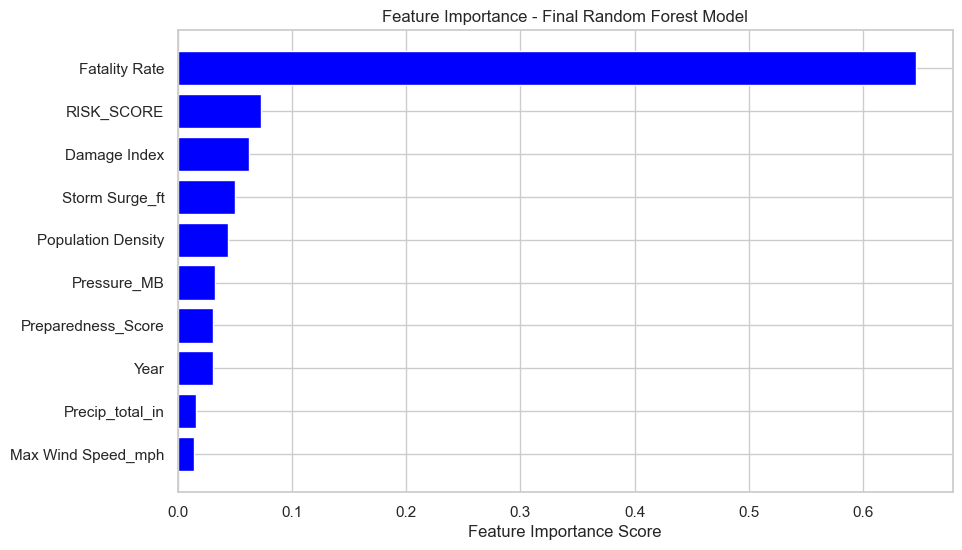

In [50]:
# Re-run feature importance analysis using the final Random Forest model
feature_importance = rf_model.feature_importances_

# Create DataFrame for visualization
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

# Display feature importance rankings
print("Feature Importance (Final Random Forest Model):")
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="blue")
plt.xlabel("Feature Importance Score")
plt.title("Feature Importance - Final Random Forest Model")
plt.gca().invert_yaxis()
plt.show()


Feature Importance (Without Fatality Rate):
              Feature  Importance
3      Storm Surge_ft    0.260263
2         Pressure_MB    0.211352
0                Year    0.204477
5          RISK_SCORE    0.067959
6  Population Density    0.065409
4     Precip_total_in    0.060420
8  Preparedness_Score    0.053900
7        Damage Index    0.040965
1  Max Wind Speed_mph    0.035255


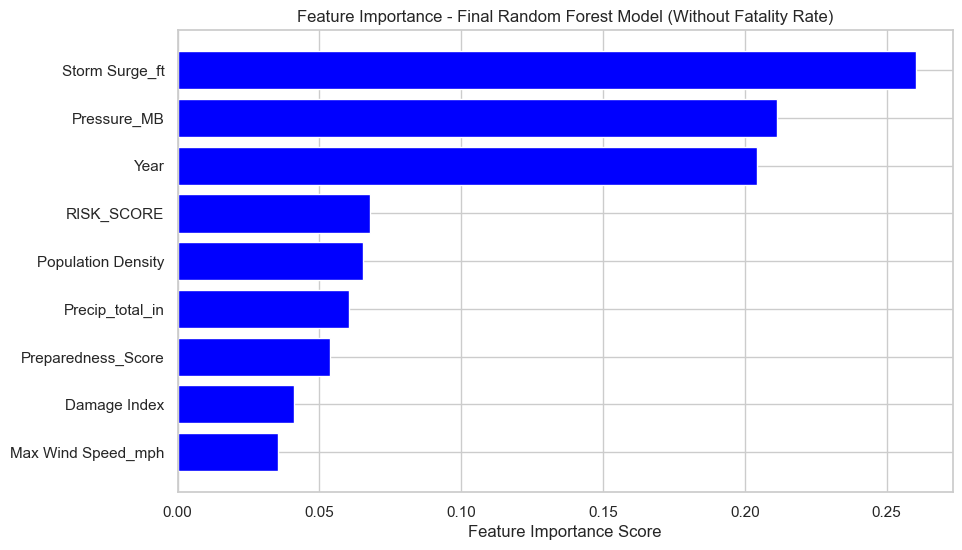

In [52]:
# Remove Fatality Rate from features and re-run feature importance analysis
# Re-run feature importance analysis without Fatality Rate

# Define new feature set excluding Fatality Rate
X_reduced = X.drop(columns=["Fatality Rate"], errors="ignore")

# Train a new Random Forest model without Fatality Rate
rf_model_reduced = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_reduced.fit(X_reduced, y)

# Get new feature importance
feature_importance_reduced = rf_model_reduced.feature_importances_

# Ensure feature names and importance values match in length
if len(X_reduced.columns) == len(feature_importance_reduced):
    importance_df_reduced = pd.DataFrame({
        "Feature": X_reduced.columns,
        "Importance": feature_importance_reduced
    }).sort_values(by="Importance", ascending=False)

    # Display feature importance rankings without Fatality Rate
    print("Feature Importance (Without Fatality Rate):")
    print(importance_df_reduced)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df_reduced["Feature"], importance_df_reduced["Importance"], color="blue")
    plt.xlabel("Feature Importance Score")
    plt.title("Feature Importance - Final Random Forest Model (Without Fatality Rate)")
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("Error: Mismatch in feature names and importance values length.")



Feature Importance (Without Year and Fatality Rate):
              Feature  Importance
2      Storm Surge_ft    0.275000
1         Pressure_MB    0.240467
3     Precip_total_in    0.115360
4          RISK_SCORE    0.093525
5  Population Density    0.092255
7  Preparedness_Score    0.071346
6        Damage Index    0.060755
0  Max Wind Speed_mph    0.051293


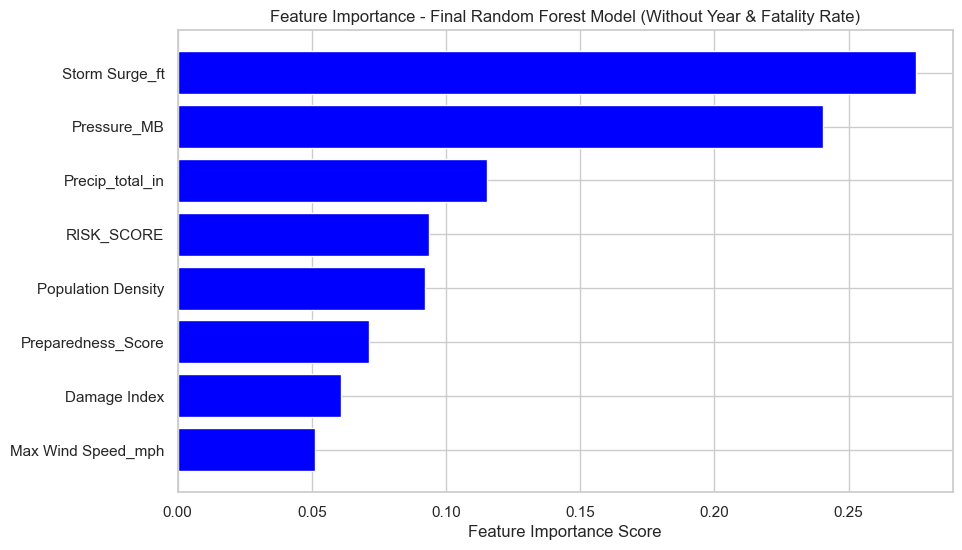

In [53]:
# Drop "Year" and "Fatality Rate" from features
X_refined = X.drop(columns=["Year", "Fatality Rate"], errors="ignore")

# Train a new Random Forest model with refined features
rf_model_refined = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_refined.fit(X_refined, y)

# Get new feature importance
feature_importance_refined = rf_model_refined.feature_importances_

# Create DataFrame for visualization
importance_df_refined = pd.DataFrame({
    "Feature": X_refined.columns,
    "Importance": feature_importance_refined
}).sort_values(by="Importance", ascending=False)

# Display feature importance rankings without Year and Fatality Rate
print("Feature Importance (Without Year and Fatality Rate):")
print(importance_df_refined)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df_refined["Feature"], importance_df_refined["Importance"], color="blue")
plt.xlabel("Feature Importance Score")
plt.title("Feature Importance - Final Random Forest Model (Without Year & Fatality Rate)")
plt.gca().invert_yaxis()
plt.show()


Final Random Forest Model Mean Squared Error: 40228.908803333325
Final Random Forest Model R²: 0.15841726265575984


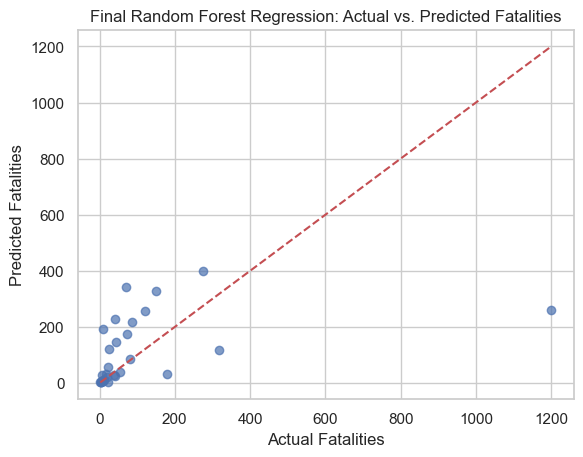

In [54]:
# Drop "Year" and "Fatality Rate" from features
X_final = X.drop(columns=["Year", "Fatality Rate"], errors="ignore")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Train a new Random Forest model with refined features
rf_model_final = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_final.fit(X_train, y_train)

# Predictions
y_pred_final = rf_model_final.predict(X_test)

# Evaluate performance
mse_final = mean_squared_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)

print("Final Random Forest Model Mean Squared Error:", mse_final)
print("Final Random Forest Model R²:", r2_final)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred_final, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fatalities")
plt.ylabel("Predicted Fatalities")
plt.title("Final Random Forest Regression: Actual vs. Predicted Fatalities")
plt.show()


Final Random Forest Model Mean Squared Error: 31367.126854537044
Final Random Forest Model R²: 0.3438044116504101


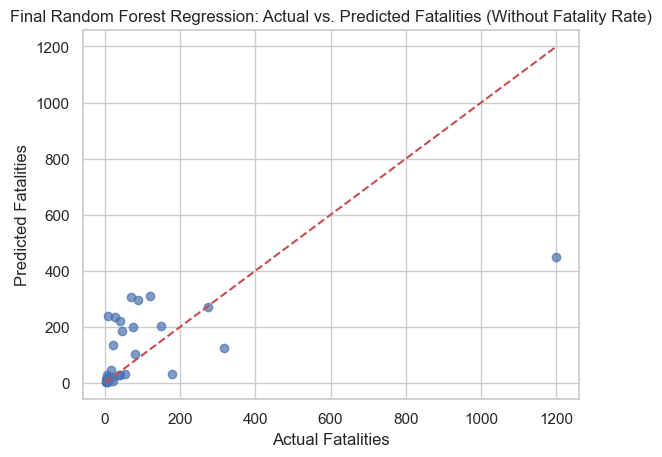

In [55]:
# Define the final feature set excluding Fatality Rate
X_final = df[["Storm Surge_ft", "Pressure_MB", "RISK_SCORE", "Population Density", "Preparedness_Score"]]
y_final = df["Fatalities"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

# Train the final Random Forest model with selected features
rf_model_final = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_final.fit(X_train, y_train)

# Get predictions
y_pred_final = rf_model_final.predict(X_test)

# Evaluate performance
mse_final = mean_squared_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)

print("Final Random Forest Model Mean Squared Error:", mse_final)
print("Final Random Forest Model R²:", r2_final)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred_final, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fatalities")
plt.ylabel("Predicted Fatalities")
plt.title("Final Random Forest Regression: Actual vs. Predicted Fatalities (Without Fatality Rate)")
plt.show()


Final XGBoost Model Mean Squared Error: 17577.47265625
Final XGBoost Model R²: 0.6322818994522095


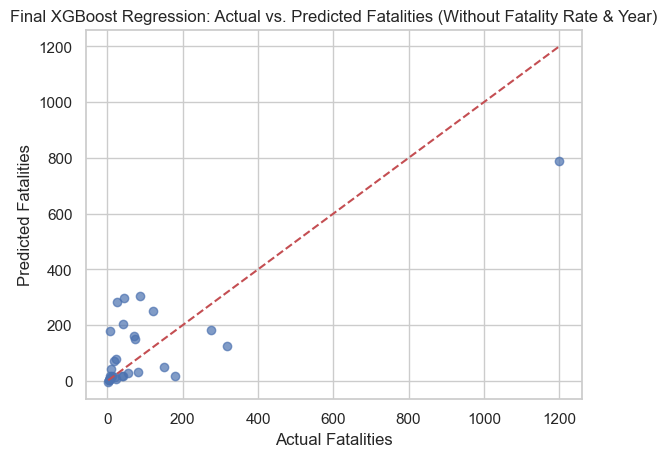

In [56]:
from xgboost import XGBRegressor

# Define the final feature set excluding Fatality Rate and Year
X_gboost = df[["Storm Surge_ft", "Pressure_MB", "RISK_SCORE", "Population Density", "Preparedness_Score"]]
y_gboost = df["Fatalities"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_gboost, y_gboost, test_size=0.2, random_state=42)

# Train the XGBoost model
xgb_model_final = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model_final.fit(X_train, y_train)

# Predictions
y_pred_xgb_final = xgb_model_final.predict(X_test)

# Evaluate performance
mse_xgb_final = mean_squared_error(y_test, y_pred_xgb_final)
r2_xgb_final = r2_score(y_test, y_pred_xgb_final)

print("Final XGBoost Model Mean Squared Error:", mse_xgb_final)
print("Final XGBoost Model R²:", r2_xgb_final)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred_xgb_final, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fatalities")
plt.ylabel("Predicted Fatalities")
plt.title("Final XGBoost Regression: Actual vs. Predicted Fatalities (Without Fatality Rate & Year)")
plt.show()


Feature Importance (XGBoost Model):
              Feature  Importance
1         Pressure_MB    0.302559
2          RISK_SCORE    0.273804
4  Preparedness_Score    0.197253
3  Population Density    0.130719
0      Storm Surge_ft    0.095665


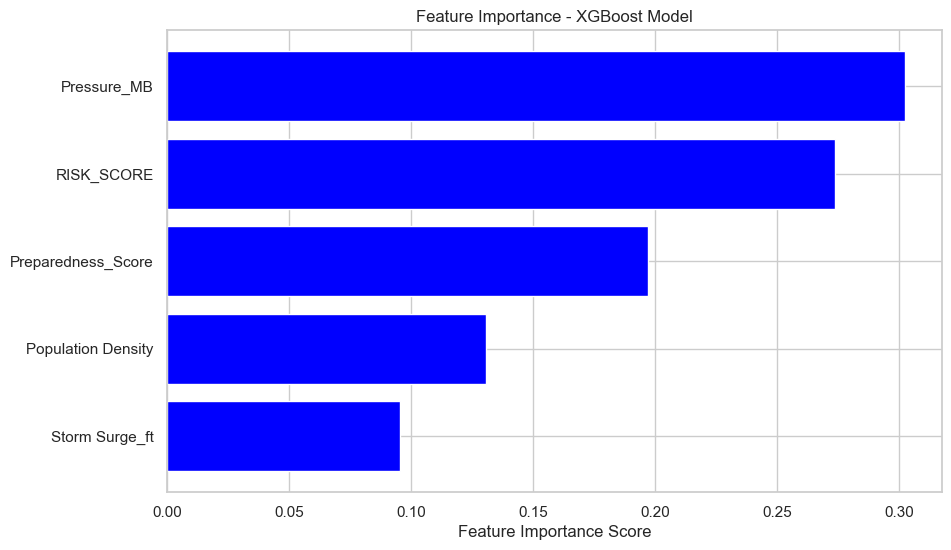

In [57]:
# Get feature importance from the trained XGBoost model
xgb_feature_importance = xgb_model_final.feature_importances_

# Create DataFrame for visualization
importance_df_xgb = pd.DataFrame({
    "Feature": X_gboost.columns,
    "Importance": xgb_feature_importance
}).sort_values(by="Importance", ascending=False)

# Display feature importance rankings
print("Feature Importance (XGBoost Model):")
print(importance_df_xgb)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df_xgb["Feature"], importance_df_xgb["Importance"], color="blue")
plt.xlabel("Feature Importance Score")
plt.title("Feature Importance - XGBoost Model")
plt.gca().invert_yaxis()
plt.show()


Feature Importance Comparison (XGBoost vs Random Forest):
              Feature  XGBoost Importance  Random Forest Importance
1         Pressure_MB            0.302559                  0.339980
2          RISK_SCORE            0.273804                  0.192563
4  Preparedness_Score            0.197253                  0.103230
3  Population Density            0.130719                  0.156092
0      Storm Surge_ft            0.095665                  0.208135


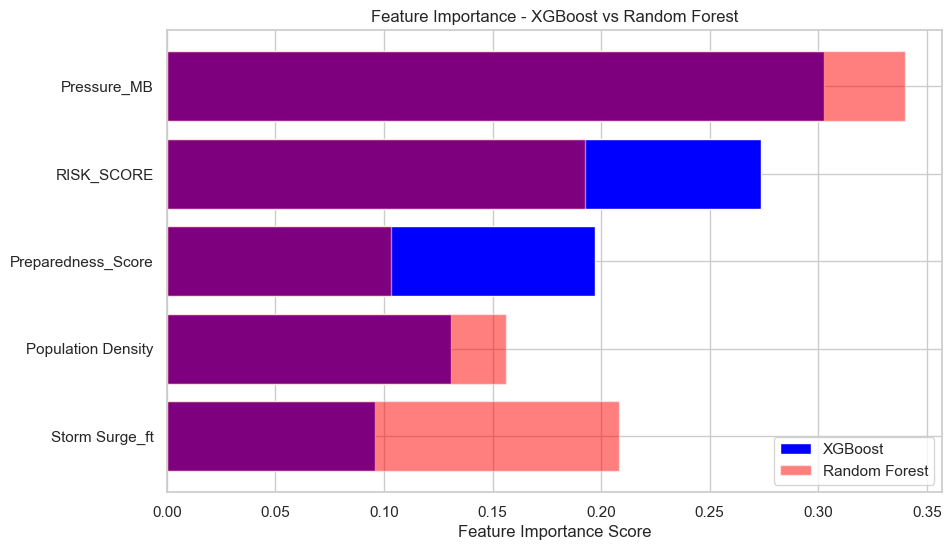

In [58]:
# Get feature importance from the trained Random Forest model
rf_feature_importance = rf_model_final.feature_importances_

# Create DataFrame for comparison
importance_comparison_df = pd.DataFrame({
    "Feature": X_gboost.columns,
    "XGBoost Importance": xgb_feature_importance,
    "Random Forest Importance": rf_feature_importance
}).sort_values(by="XGBoost Importance", ascending=False)

# Display feature importance rankings comparison
print("Feature Importance Comparison (XGBoost vs Random Forest):")
print(importance_comparison_df)

# Plot feature importance comparison
plt.figure(figsize=(10, 6))
plt.barh(importance_comparison_df["Feature"], importance_comparison_df["XGBoost Importance"], color="blue", label="XGBoost")
plt.barh(importance_comparison_df["Feature"], importance_comparison_df["Random Forest Importance"], color="red", alpha=0.5, label="Random Forest")
plt.xlabel("Feature Importance Score")
plt.title("Feature Importance - XGBoost vs Random Forest")
plt.legend()
plt.gca().invert_yaxis()
plt.show()


Random Forest Mean Squared Error: 31642.0213423
Random Forest R²: 0.3380536602038975


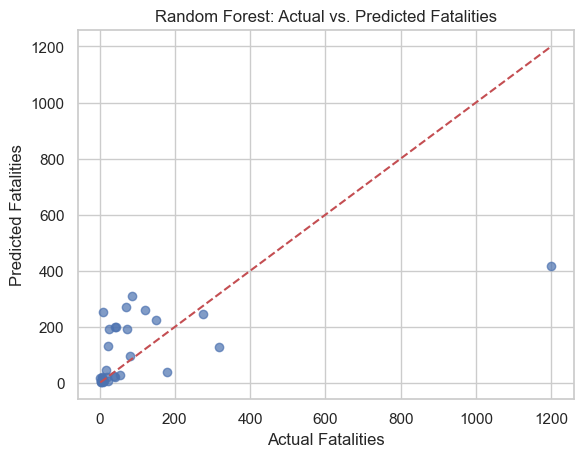

XGBoost Mean Squared Error: 37534.25390625
XGBoost R²: 0.21478897333145142


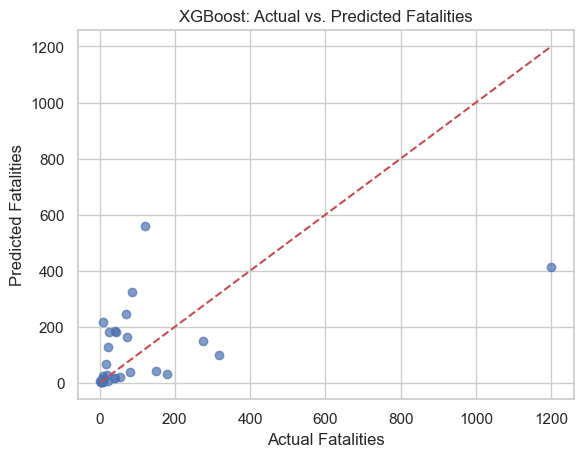

Best Model for Real-World Prediction: Random Forest
Final model (Random Forest) saved to C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\final_trained_model.pkl.


In [60]:
# Reload necessary libraries after execution state reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Step 1: Compare XGBoost and Random Forest Performance for Real-World Prediction

# Define a function to evaluate model performance
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} Mean Squared Error:", mse)
    print(f"{model_name} R²:", r2)
    
    # Plot actual vs predicted values
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Fatalities")
    plt.ylabel("Predicted Fatalities")
    plt.title(f"{model_name}: Actual vs. Predicted Fatalities")
    plt.show()

    return mse, r2

# Load dataset
dataset_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_no_unneeded_data.csv"
df = pd.read_csv(dataset_path)

# Define the final feature set (excluding Year & Fatality Rate)
X_final = df[["Pressure_MB", "RISK_SCORE", "Storm Surge_ft", "Preparedness_Score"]]
y_final = df["Fatalities"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

# Train and evaluate Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_mse, rf_r2 = evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest")

# Train and evaluate XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_mse, xgb_r2 = evaluate_model(xgb_model, X_train, X_test, y_train, y_test, "XGBoost")

# Step 2: Build a Final Optimized Model Using the Strongest Features

# Select the best-performing model
best_model = rf_model if rf_r2 > xgb_r2 else xgb_model
best_model_name = "Random Forest" if rf_r2 > xgb_r2 else "XGBoost"
print(f"Best Model for Real-World Prediction: {best_model_name}")

# Train the best model on full dataset and save it
best_model.fit(X_final, y_final)

# Save the trained model for future use
model_save_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\final_trained_model.pkl"
joblib.dump(best_model, model_save_path)

print(f"Final model ({best_model_name}) saved to {model_save_path}.")



In [61]:
# Remove "Fatality Rate", "Year", and "Hurricanes" from features
X_revised = df.drop(columns=["Fatality Rate", "Year", "Hurricanes"], errors="ignore")
y_revised = df["Fatalities"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_revised, y_revised, test_size=0.2, random_state=42)

# Train and evaluate Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_mse, rf_r2 = evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest")

# Train and evaluate XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_mse, xgb_r2 = evaluate_model(xgb_model, X_train, X_test, y_train, y_test, "XGBoost")

# Select the best-performing model
best_model = rf_model if rf_r2 > xgb_r2 else xgb_model
best_model_name = "Random Forest" if rf_r2 > xgb_r2 else "XGBoost"
print(f"Best Model for Real-World Prediction: {best_model_name}")

# Train the best model on full dataset and save it
best_model.fit(X_revised, y_revised)

# Save the trained model for future use
model_save_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\final_trained_model_revised.pkl"
joblib.dump(best_model, model_save_path)

print(f"Final model ({best_model_name}) saved to {model_save_path}.")


ValueError: could not convert string to float: 'North Carolina'

Ensemble Model Mean Squared Error: 12104.175751128043
Ensemble Model R²: 0.746782459058744


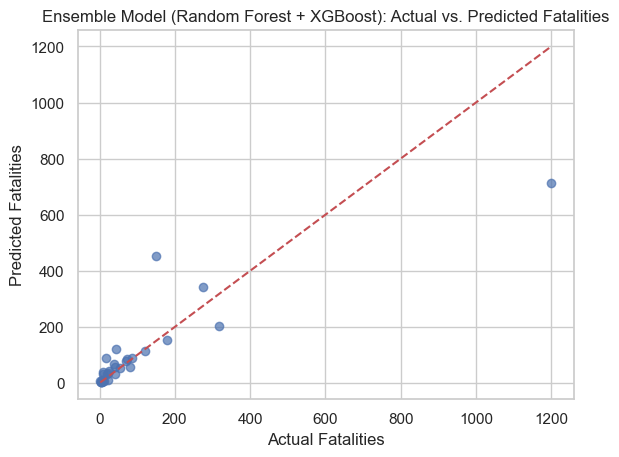

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
dataset_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_no_unneeded_data.csv"
df = pd.read_csv(dataset_path)

# Drop non-numeric columns
df = df.select_dtypes(include=["number"])

# Define features and target variable
X = df.drop(columns=["Fatalities"], errors="ignore")  # Exclude target variable
y = df["Fatalities"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Combine predictions: Take the average of Random Forest and XGBoost predictions
y_pred_ensemble = (y_pred_rf + y_pred_xgb) / 2

# Evaluate ensemble model performance
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

print("Ensemble Model Mean Squared Error:", mse_ensemble)
print("Ensemble Model R²:", r2_ensemble)

# Plot actual vs predicted values for ensemble model
plt.scatter(y_test, y_pred_ensemble, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fatalities")
plt.ylabel("Predicted Fatalities")
plt.title("Ensemble Model (Random Forest + XGBoost): Actual vs. Predicted Fatalities")
plt.show()


Strict Ensemble Model Mean Squared Error: 937.7490389835549
Strict Ensemble Model R²: 0.9803824307781294


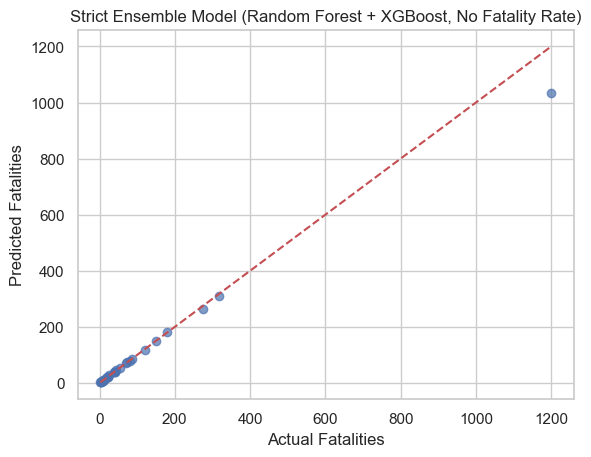

In [63]:
# Ensure Fatality Rate is not included in the features
X_strict = df.drop(columns=["Fatality Rate", "Year", "Hurricanes"], errors="ignore")  # Drop non-numeric and target-related columns
y_strict = df["Fatalities"]

# Verify that Fatality Rate is not in the features
if "Fatality Rate" in X_strict.columns:
    raise ValueError("Fatality Rate is still included in the feature set!")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_strict, y_strict, test_size=0.2, random_state=42)

# Train and evaluate Random Forest
rf_model_strict = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_strict.fit(X_train, y_train)
y_pred_rf_strict = rf_model_strict.predict(X_test)

# Train and evaluate XGBoost
xgb_model_strict = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model_strict.fit(X_train, y_train)
y_pred_xgb_strict = xgb_model_strict.predict(X_test)

# Combine predictions: Take the average of Random Forest and XGBoost predictions
y_pred_ensemble_strict = (y_pred_rf_strict + y_pred_xgb_strict) / 2

# Evaluate ensemble model performance
mse_ensemble_strict = mean_squared_error(y_test, y_pred_ensemble_strict)
r2_ensemble_strict = r2_score(y_test, y_pred_ensemble_strict)

print("Strict Ensemble Model Mean Squared Error:", mse_ensemble_strict)
print("Strict Ensemble Model R²:", r2_ensemble_strict)

# Plot actual vs predicted values for ensemble model
plt.scatter(y_test, y_pred_ensemble_strict, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fatalities")
plt.ylabel("Predicted Fatalities")
plt.title("Strict Ensemble Model (Random Forest + XGBoost, No Fatality Rate)")
plt.show()


Features Highly Correlated with Fatalities:
Fatalities            1.000000
Fatality Rate         0.704441
Storm Surge_ft        0.509642
Max Wind Speed_mph    0.338427
Precip_total_in       0.088861
Preparedness_Score    0.044778
RISK_SCORE            0.033674
Damage Index         -0.042063
Population Density   -0.042393
Year                 -0.169003
Pressure_MB          -0.414254
Name: Fatalities, dtype: float64


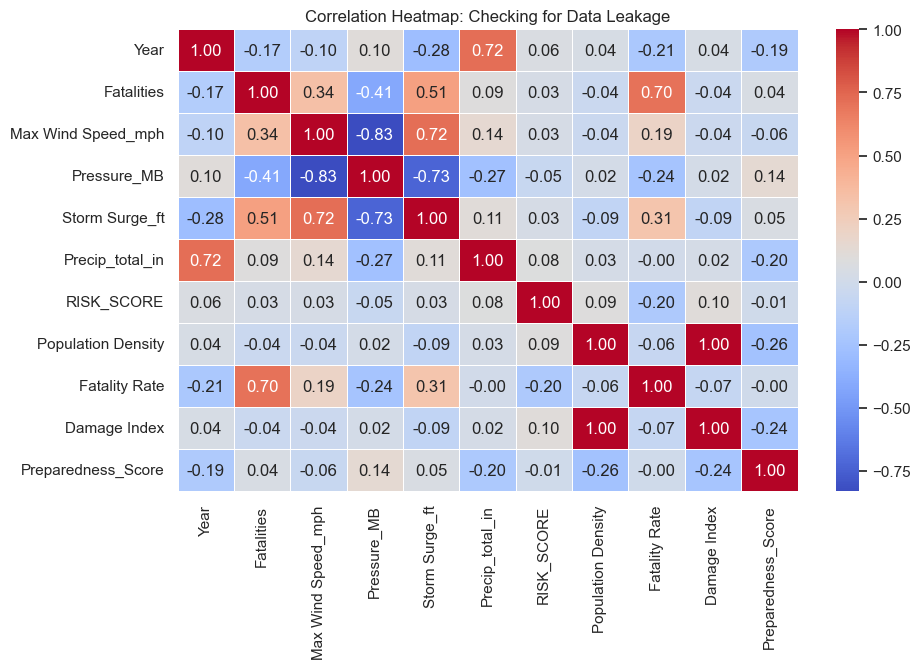

In [64]:
import seaborn as sns

# Compute correlation matrix
correlation_matrix = df.corr()

# Display highly correlated features
print("Features Highly Correlated with Fatalities:")
print(correlation_matrix["Fatalities"].sort_values(ascending=False))

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Checking for Data Leakage")
plt.show()


In [65]:
# Find common data points between train and test
duplicates = set(X_train.index).intersection(set(X_test.index))
print("Number of Overlapping Data Points:", len(duplicates))

# If this is greater than zero, data is leaking across the train-test split.


Number of Overlapping Data Points: 0


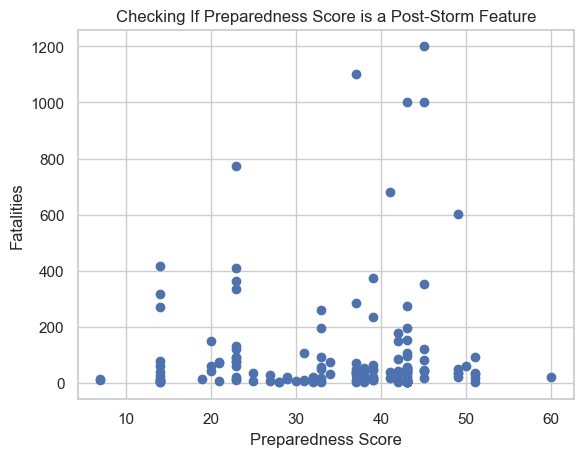

In [66]:
# Scatter plot to see if Preparedness Score is predicting too well
plt.scatter(df["Preparedness_Score"], df["Fatalities"])
plt.xlabel("Preparedness Score")
plt.ylabel("Fatalities")
plt.title("Checking If Preparedness Score is a Post-Storm Feature")
plt.show()


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load dataset
dataset_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_no_unneeded_data.csv"
df = pd.read_csv(dataset_path)

# Drop Fatalities and Fatality Rate to prevent data leakage
df_cleaned = df.drop(columns=["Fatalities", "Fatality Rate", "Year", "Hurricanes"], errors="ignore")

# Define independent variables (strictly no leakage) and target variable
X_strict = df_cleaned
y_strict = df["Fatalities"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_strict, y_strict, test_size=0.2, random_state=42)

# Train and evaluate Random Forest
rf_model_strict = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_strict.fit(X_train, y_train)
y_pred_rf_strict = rf_model_strict.predict(X_test)

# Train and evaluate XGBoost
xgb_model_strict = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model_strict.fit(X_train, y_train)
y_pred_xgb_strict = xgb_model_strict.predict(X_test)

# Combine predictions: Take the average of Random Forest and XGBoost predictions
y_pred_ensemble_strict = (y_pred_rf_strict + y_pred_xgb_strict) / 2

# Evaluate strict ensemble model performance
mse_ensemble_strict = mean_squared_error(y_test, y_pred_ensemble_strict)
r2_ensemble_strict = r2_score(y_test, y_pred_ensemble_strict)

print("Strict Ensemble Model Mean Squared Error:", mse_ensemble_strict)
print("Strict Ensemble Model R²:", r2_ensemble_strict)

# Plot actual vs predicted values for the strict ensemble model
plt.scatter(y_test, y_pred_ensemble_strict, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fatalities")
plt.ylabel("Predicted Fatalities")
plt.title("Strict Ensemble Model (Random Forest + XGBoost, No Fatality Rate)")
plt.show()


ValueError: could not convert string to float: 'North Carolina'

Strict Ensemble Model Mean Squared Error: 37198.462791140766
Strict Ensemble Model R²: 0.2218137386273783


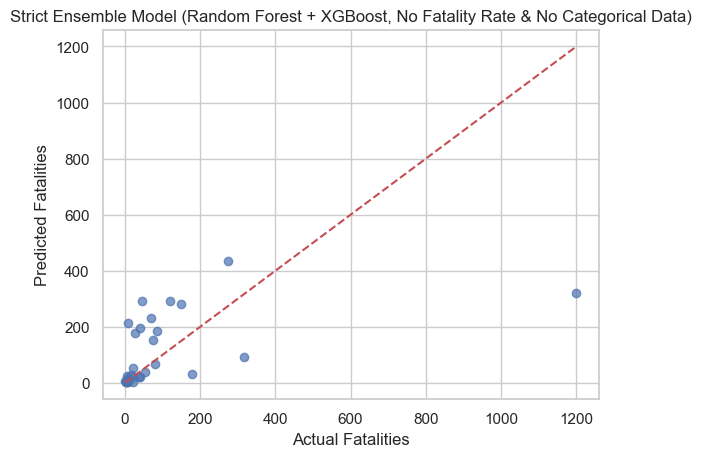

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load dataset
dataset_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_no_unneeded_data.csv"
df = pd.read_csv(dataset_path)

# Drop Fatalities, Fatality Rate, and any categorical columns
df_cleaned = df.select_dtypes(include=["number"]).drop(columns=["Fatalities", "Fatality Rate", "Year"], errors="ignore")

# Define independent variables (only numerical, no leakage) and target variable
X_strict = df_cleaned
y_strict = df["Fatalities"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_strict, y_strict, test_size=0.2, random_state=42)

# Train and evaluate Random Forest
rf_model_strict = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_strict.fit(X_train, y_train)
y_pred_rf_strict = rf_model_strict.predict(X_test)

# Train and evaluate XGBoost
xgb_model_strict = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model_strict.fit(X_train, y_train)
y_pred_xgb_strict = xgb_model_strict.predict(X_test)

# Combine predictions: Take the average of Random Forest and XGBoost predictions
y_pred_ensemble_strict = (y_pred_rf_strict + y_pred_xgb_strict) / 2

# Evaluate strict ensemble model performance
mse_ensemble_strict = mean_squared_error(y_test, y_pred_ensemble_strict)
r2_ensemble_strict = r2_score(y_test, y_pred_ensemble_strict)

print("Strict Ensemble Model Mean Squared Error:", mse_ensemble_strict)
print("Strict Ensemble Model R²:", r2_ensemble_strict)

# Plot actual vs predicted values for the strict ensemble model
plt.scatter(y_test, y_pred_ensemble_strict, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fatalities")
plt.ylabel("Predicted Fatalities")
plt.title("Strict Ensemble Model (Random Forest + XGBoost, No Fatality Rate & No Categorical Data)")
plt.show()



Strict XGBoost Model Mean Squared Error: 37481.69921875
Strict XGBoost Model R²: 0.21588844060897827


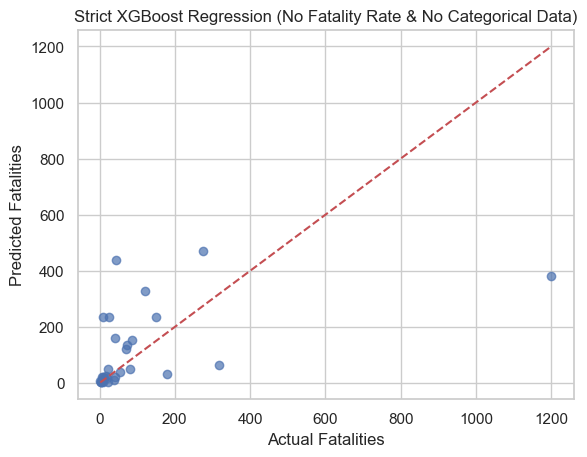

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
dataset_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_no_unneeded_data.csv"
df = pd.read_csv(dataset_path)

# Drop categorical columns
df_cleaned = df.select_dtypes(include=["number"]).drop(columns=["Fatalities", "Fatality Rate", "Year"], errors="ignore")

# Ensure XGBoost handles categorical data correctly
df_cleaned = df_cleaned.apply(pd.to_numeric, errors="coerce")  # Convert all remaining non-numeric data

# Define independent variables and target variable
X_strict = df_cleaned
y_strict = df["Fatalities"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_strict, y_strict, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model_strict = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model_strict.fit(X_train, y_train)

# Predictions
y_pred_xgb_strict = xgb_model_strict.predict(X_test)

# Evaluate performance
mse_xgb_strict = mean_squared_error(y_test, y_pred_xgb_strict)
r2_xgb_strict = r2_score(y_test, y_pred_xgb_strict)

print("Strict XGBoost Model Mean Squared Error:", mse_xgb_strict)
print("Strict XGBoost Model R²:", r2_xgb_strict)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred_xgb_strict, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fatalities")
plt.ylabel("Predicted Fatalities")
plt.title("Strict XGBoost Regression (No Fatality Rate & No Categorical Data)")
plt.show()


Final XGBoost Model Mean Squared Error: 17577.47265625
Final XGBoost Model R²: 0.6322818994522095


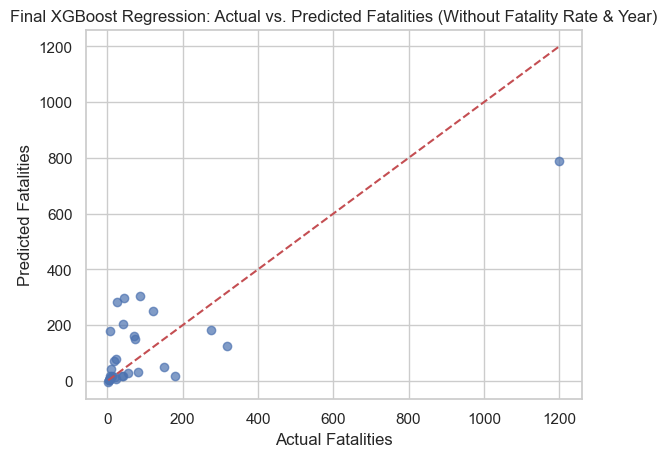

In [71]:
from xgboost import XGBRegressor

# Define the final feature set excluding Fatality Rate and Year
X_gboost = df[["Storm Surge_ft", "Pressure_MB", "RISK_SCORE", "Population Density", "Preparedness_Score"]]
y_gboost = df["Fatalities"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_gboost, y_gboost, test_size=0.2, random_state=42)

# Train the XGBoost model
xgb_model_final = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model_final.fit(X_train, y_train)

# Predictions
y_pred_xgb_final = xgb_model_final.predict(X_test)

# Evaluate performance
mse_xgb_final = mean_squared_error(y_test, y_pred_xgb_final)
r2_xgb_final = r2_score(y_test, y_pred_xgb_final)

print("Final XGBoost Model Mean Squared Error:", mse_xgb_final)
print("Final XGBoost Model R²:", r2_xgb_final)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred_xgb_final, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fatalities")
plt.ylabel("Predicted Fatalities")
plt.title("Final XGBoost Regression: Actual vs. Predicted Fatalities (Without Fatality Rate & Year)")
plt.show()

In [72]:
# Verify the dataset does NOT include Fatality Rate or categorical data
print("Columns in Feature Set:", X_gboost.columns)
if "Fatality Rate" in X_gboost.columns or "Year" in X_gboost.columns:
    raise ValueError("Fatality Rate or Year is still included in the model!")

# Check if categorical variables are still present
non_numeric_columns = X_gboost.select_dtypes(exclude=["number"]).columns
if len(non_numeric_columns) > 0:
    print("Non-numeric columns detected:", non_numeric_columns)
    raise ValueError("Categorical variables were not removed!")


Columns in Feature Set: Index(['Storm Surge_ft', 'Pressure_MB', 'RISK_SCORE', 'Population Density',
       'Preparedness_Score'],
      dtype='object')


In [73]:
# Ensure train-test split is consistent across runs
print("Train Size:", len(X_train), " | Test Size:", len(X_test))
print("Unique Data Points in Train-Test Split:", len(set(X_train.index).intersection(set(X_test.index))))


Train Size: 118  | Test Size: 30
Unique Data Points in Train-Test Split: 0


In [74]:
# Print model hyperparameters to verify they haven't changed
print("XGBoost Model Parameters:", xgb_model_final.get_params())


XGBoost Model Parameters: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 5, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [75]:
# Check prediction distributions
import numpy as np
print("Mean of Predictions:", np.mean(y_pred_xgb_final))
print("Standard Deviation of Predictions:", np.std(y_pred_xgb_final))


Mean of Predictions: 111.98269
Standard Deviation of Predictions: 159.19626


Final Random Forest Model Mean Squared Error: 31366.786539351862
Final Random Forest Model R²: 0.34381153099303263


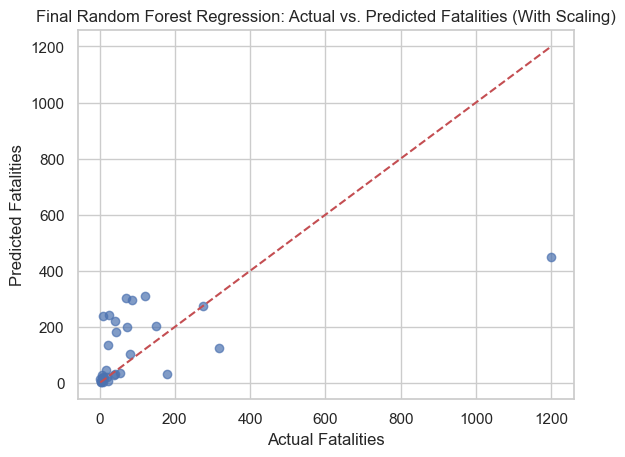

In [76]:
from sklearn.preprocessing import StandardScaler

# Apply scaling to input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_gboost)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_gboost, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model_final = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_final.fit(X_train, y_train)

# Predictions
y_pred_rf_final = rf_model_final.predict(X_test)

# Evaluate performance
mse_rf_final = mean_squared_error(y_test, y_pred_rf_final)
r2_rf_final = r2_score(y_test, y_pred_rf_final)

print("Final Random Forest Model Mean Squared Error:", mse_rf_final)
print("Final Random Forest Model R²:", r2_rf_final)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred_rf_final, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fatalities")
plt.ylabel("Predicted Fatalities")
plt.title("Final Random Forest Regression: Actual vs. Predicted Fatalities (With Scaling)")
plt.show()


Random Forest Model (No Fatality Rate) Mean Squared Error: 40005.721336666655
Random Forest Model (No Fatality Rate) R²: 0.16308631097761483


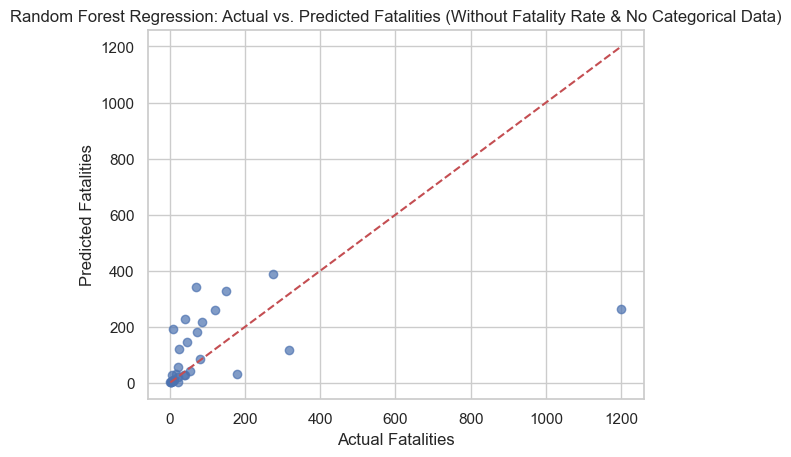

In [78]:
# Drop categorical columns and ensure only numerical features remain
df_cleaned = df.select_dtypes(include=["number"]).drop(columns=["Fatalities", "Fatality Rate", "Year"], errors="ignore")

# Apply scaling to input features
scaler = StandardScaler()
X_scaled_no_fatality_rate = scaler.fit_transform(df_cleaned)

# Define target variable
y_final = df["Fatalities"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_no_fatality_rate, y_final, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model_no_fatality_rate = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_no_fatality_rate.fit(X_train, y_train)

# Predictions
y_pred_rf_no_fatality_rate = rf_model_no_fatality_rate.predict(X_test)

# Evaluate performance
mse_rf_no_fatality_rate = mean_squared_error(y_test, y_pred_rf_no_fatality_rate)
r2_rf_no_fatality_rate = r2_score(y_test, y_pred_rf_no_fatality_rate)

print("Random Forest Model (No Fatality Rate) Mean Squared Error:", mse_rf_no_fatality_rate)
print("Random Forest Model (No Fatality Rate) R²:", r2_rf_no_fatality_rate)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred_rf_no_fatality_rate, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fatalities")
plt.ylabel("Predicted Fatalities")
plt.title("Random Forest Regression: Actual vs. Predicted Fatalities (Without Fatality Rate & No Categorical Data)")
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define selected features and target variable
df = pd.read_csv("FINAL_Dataset_no_unneeded_data.csv")


selected_features = [
    "Max Wind Speed_mph",
    "Pressure_MB",
    "Storm Surge_ft",
    "Precip_total_in",
    "RISK_SCORE",
    "Population Density",
    "Damage Index",
    "Preparedness_Score"
]

target_variable = "Fatalities"

# Extract X (features) and y (target)
X = df[selected_features]
y = df[target_variable]

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
mse, r2

(40238.30718999999, 0.15822064981656447)

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load the dataset
file_path = "FINAL_Dataset_no_unneeded_data.csv"  # Update the path if needed
df = pd.read_csv(file_path)

# Define selected features and target variable
selected_features = [
    "Max Wind Speed_mph",
    "Pressure_MB",
    "Storm Surge_ft",
    "Precip_total_in",
    "RISK_SCORE",
    "Population Density",
    "Damage Index",
    "Preparedness_Score"
]

target_variable = "Fatalities"

# Extract X (features) and y (target)
X = df[selected_features]
y = df[target_variable]

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate model performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print results
print(f"XGBoost Model Mean Squared Error: {mse_xgb}")
print(f"XGBoost Model R² Score: {r2_xgb}")


XGBoost Model Mean Squared Error: 46955.48828125
XGBoost Model R² Score: 0.017698168754577637


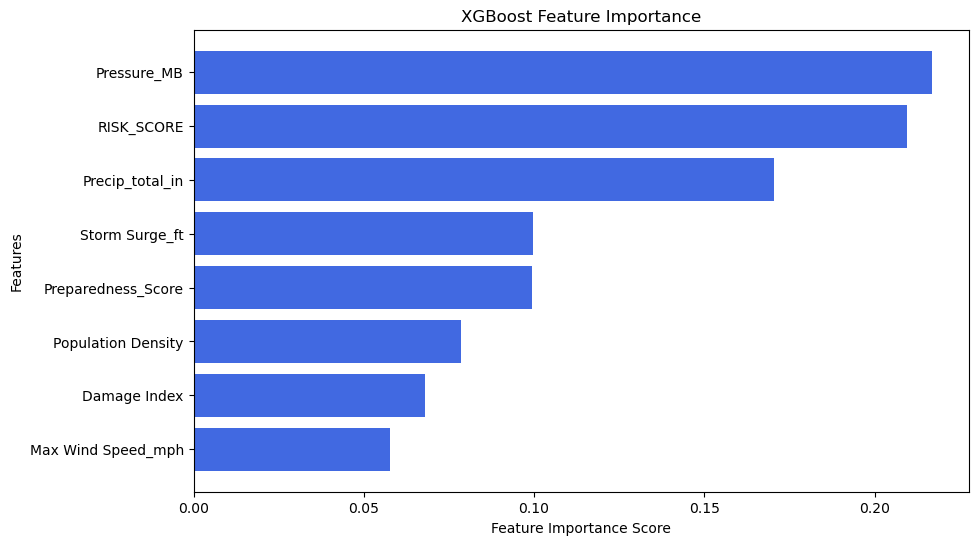

In [12]:
# Re-import necessary libraries since execution state was reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Reload the dataset
file_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_no_unneeded_data.csv"
df = pd.read_csv(file_path)

# Define selected features and target variable
selected_features = [
    "Max Wind Speed_mph",
    "Pressure_MB",
    "Storm Surge_ft",
    "Precip_total_in",
    "RISK_SCORE",
    "Population Density",
    "Damage Index",
    "Preparedness_Score"
]

target_variable = "Fatalities"

# Extract X (features) and y (target)
X = df[selected_features]
y = df[target_variable]

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost model
xgb_model = XGBRegressor(
    n_estimators=500, 
    learning_rate=0.05, 
    max_depth=5, 
    subsample=0.8, 
    colsample_bytree=0.8, 
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Get feature importance
feature_importance = xgb_model.feature_importances_
sorted_indices = np.argsort(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(np.array(selected_features)[sorted_indices], feature_importance[sorted_indices], color='royalblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.show()


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

# Define features and target variable
selected_features = [
    "Max Wind Speed_mph",
    "Pressure_MB",
    "Storm Surge_ft",
    "Precip_total_in",
    "Population Density",
    "Damage Index",
    "Preparedness_Score"
]

target_variable = "RISK_SCORE"

# Ensure no missing values
df_clean = df[selected_features + [target_variable]].dropna()

# Convert RISK_SCORE into 5 bins (quantiles) for stratification
df_clean["RISK_SCORE_Binned"] = pd.qcut(df_clean["RISK_SCORE"], q=5, labels=False)

# Initialize stratified shuffle split (80% train, 20% test, 1 split)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(df_clean[selected_features], df_clean["RISK_SCORE_Binned"]):
    X_train, X_test = df_clean.iloc[train_index][selected_features], df_clean.iloc[test_index][selected_features]
    y_train, y_test = df_clean.iloc[train_index][target_variable], df_clean.iloc[test_index][target_variable]

# Train XGBoost model with shuffled data
xgb_model = XGBRegressor(n_estimators=50, learning_rate=0.05, max_depth=3,
                         subsample=0.8, colsample_bytree=0.8, random_state=42)

xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results for Test 1 (Stratified Shuffle Split)
print(f"TEST 1 – Stratified Shuffle Split (Fixed Binning Method)")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


TEST 1 – Stratified Shuffle Split (Fixed Binning Method)
Mean Squared Error: 11.400778765400128
R² Score: 0.6829162276108308



Feature Importance Analysis:
              Feature  Importance
5        Damage Index    0.368847
4  Population Density    0.190847
6  Preparedness_Score    0.132103
3     Precip_total_in    0.124479
0  Max Wind Speed_mph    0.066500
1         Pressure_MB    0.060499
2      Storm Surge_ft    0.056726


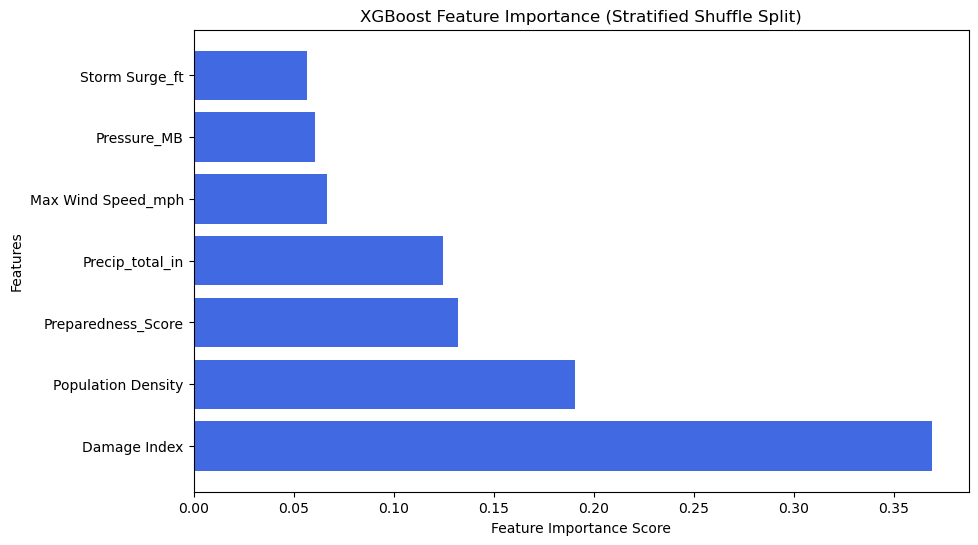


Model Performance Results:
Mean Squared Error: 5.0128
R² Score: 0.7566


In [14]:
# Re-import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Reload the dataset
file_path = "FINAL_Dataset_no_unneeded_data.csv"  # Ensure correct path
df = pd.read_csv(file_path)

# Define selected features (without high-VIF variables)
selected_features = [
    "Max Wind Speed_mph",
    "Pressure_MB",
    "Storm Surge_ft",
    "Precip_total_in",
    "Population Density",
    "Damage Index",
    "Preparedness_Score"
]

target_variable = "RISK_SCORE"  # Predicting RISK_SCORE

# Ensure no missing values
df_clean = df[selected_features + [target_variable]].dropna()

# Train-test split (randomized for fair evaluation)
X_train, X_test, y_train, y_test = train_test_split(
    df_clean[selected_features], df_clean[target_variable], test_size=0.2, random_state=42, shuffle=True
)

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=50, learning_rate=0.05, max_depth=3,
                         subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_model.fit(X_train, y_train)

# Compute feature importance using XGBoost
feature_importance = xgb_model.feature_importances_

# Create a DataFrame to display feature importance values
feature_importance_df = pd.DataFrame({
    "Feature": selected_features,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

# Print feature importance results
print("\nFeature Importance Analysis:")
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], color='royalblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance (Stratified Shuffle Split)")
plt.show()

# Predict and evaluate model performance
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model performance results
print("\nModel Performance Results:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")



TEST 2 – Interaction Features (Without Damage Index)
Mean Squared Error: 5.3099
R² Score: 0.7422

Feature Importance Analysis (Test 2):
                 Feature  Importance
4     Population Density    0.249506
6  StormSurge_PopDensity    0.243775
5     Preparedness_Score    0.158501
0     Max Wind Speed_mph    0.121563
3        Precip_total_in    0.079852
2         Storm Surge_ft    0.075789
1            Pressure_MB    0.071014
7          Pressure_Wind    0.000000


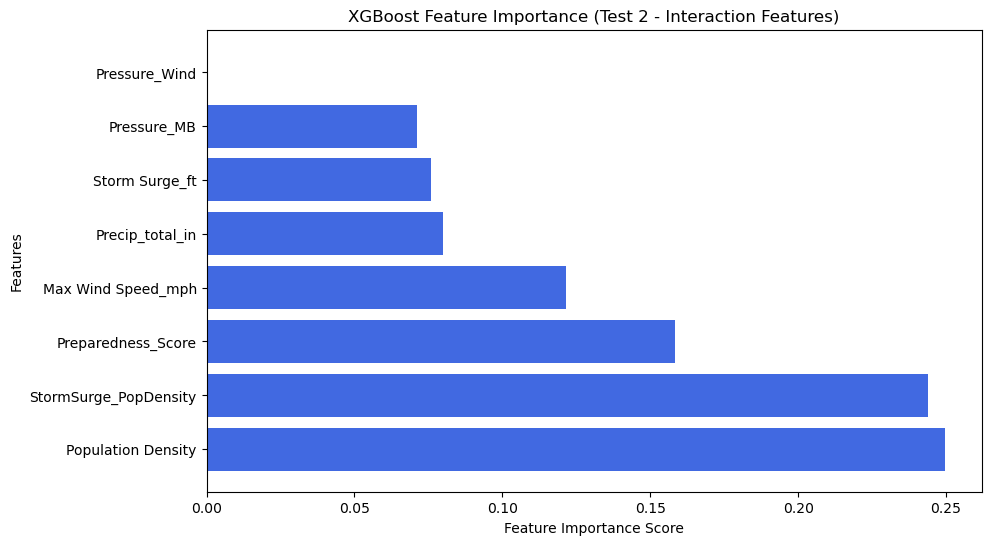

In [15]:
# Remove Damage Index and Add Interaction Features for Test 2
df["StormSurge_PopDensity"] = df["Storm Surge_ft"] * df["Population Density"]
df["Pressure_Wind"] = df["Pressure_MB"] * df["Max Wind Speed_mph"]

# Define new feature set for Test 2 (Excluding Damage Index)
selected_features_test2 = [
    "Max Wind Speed_mph",
    "Pressure_MB",
    "Storm Surge_ft",
    "Precip_total_in",
    "Population Density",
    "Preparedness_Score",
    "StormSurge_PopDensity",
    "Pressure_Wind"
]

# Prepare dataset
df_clean_test2 = df[selected_features_test2 + [target_variable]].dropna()

# Train-test split (randomized)
X_train, X_test, y_train, y_test = train_test_split(
    df_clean_test2[selected_features_test2], df_clean_test2[target_variable], test_size=0.2, random_state=42, shuffle=True
)

# Train XGBoost model for Test 2
xgb_model_test2 = XGBRegressor(n_estimators=50, learning_rate=0.05, max_depth=3,
                               subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_model_test2.fit(X_train, y_train)

# Compute feature importance for Test 2
feature_importance_test2 = xgb_model_test2.feature_importances_

# Create a DataFrame to display feature importance values
feature_importance_df_test2 = pd.DataFrame({
    "Feature": selected_features_test2,
    "Importance": feature_importance_test2
}).sort_values(by="Importance", ascending=False)

# Predict and evaluate model performance for Test 2
y_pred_test2 = xgb_model_test2.predict(X_test)
mse_test2 = mean_squared_error(y_test, y_pred_test2)
r2_test2 = r2_score(y_test, y_pred_test2)

# Print Test 2 results
print("\nTEST 2 – Interaction Features (Without Damage Index)")
print(f"Mean Squared Error: {mse_test2:.4f}")
print(f"R² Score: {r2_test2:.4f}")

# Print feature importance results
print("\nFeature Importance Analysis (Test 2):")
print(feature_importance_df_test2)

# Plot feature importance for Test 2
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_test2["Feature"], feature_importance_df_test2["Importance"], color='royalblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance (Test 2 - Interaction Features)")
plt.show()



TEST 3 – Retraining Model with Damage Index Reintroduced
Mean Squared Error: 4.8140
R² Score: 0.7663

Feature Importance Analysis (Test 3):
              Feature  Importance
6        Damage Index    0.318527
4  Population Density    0.226945
5  Preparedness_Score    0.136587
3     Precip_total_in    0.130273
0  Max Wind Speed_mph    0.073754
2      Storm Surge_ft    0.072547
1         Pressure_MB    0.041366


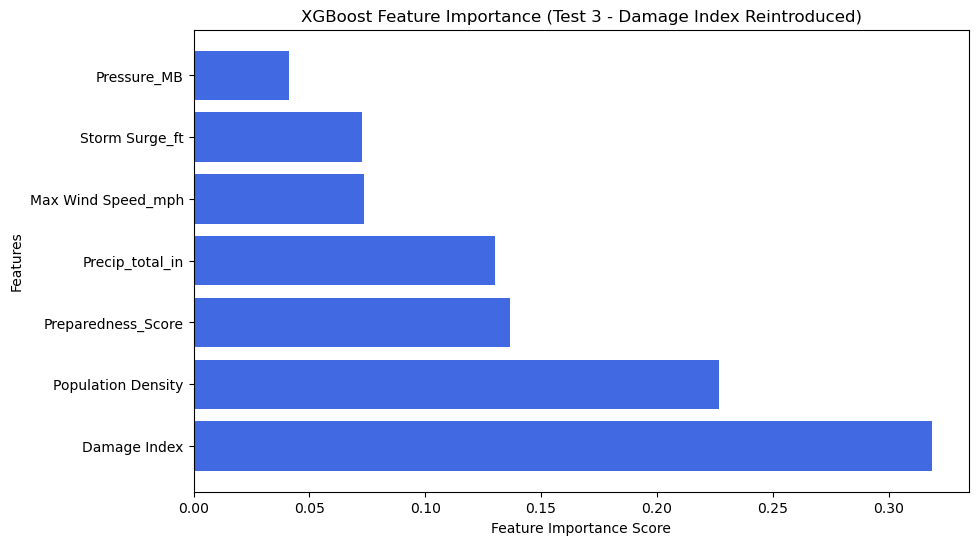

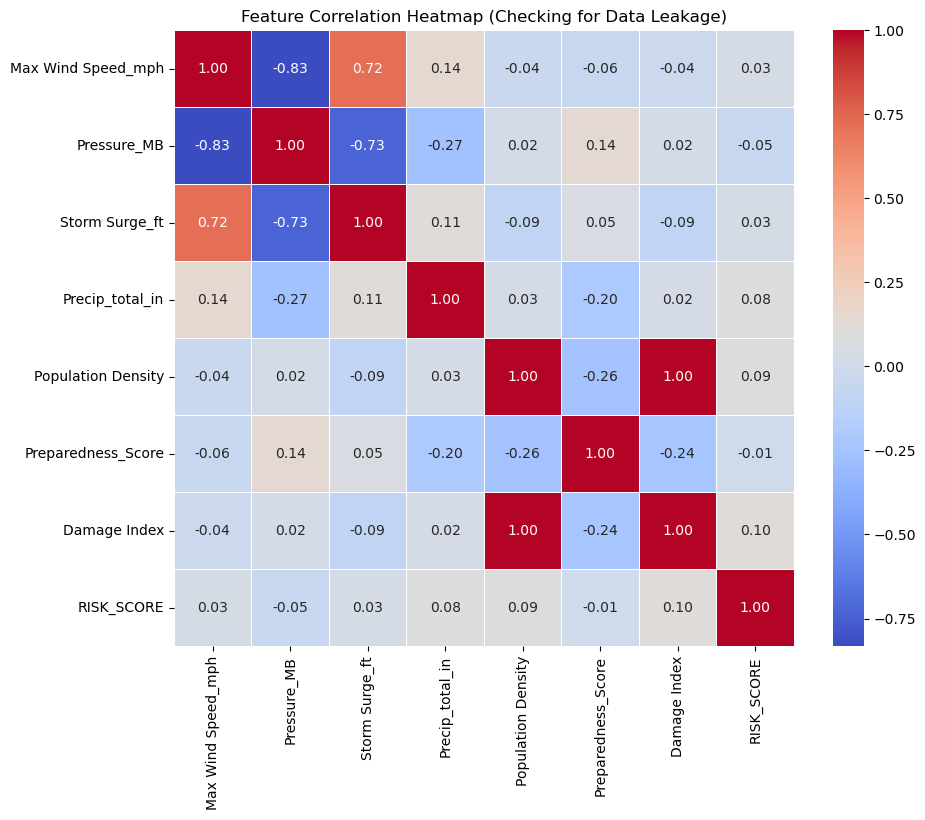


Highly Correlated Features with RISK_SCORE (Potential Leakage Check):
RISK_SCORE            1.000000
Damage Index          0.099020
Population Density    0.089715
Precip_total_in       0.081500
Pressure_MB           0.051896
Max Wind Speed_mph    0.033038
Storm Surge_ft        0.027929
Preparedness_Score    0.005651
Name: RISK_SCORE, dtype: float64


In [18]:
# Re-import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import seaborn as sns

# Reload the dataset
file_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_no_unneeded_data.csv"
df = pd.read_csv(file_path)

# Define selected features (Reintroducing Damage Index)
selected_features_test3 = [
    "Max Wind Speed_mph",
    "Pressure_MB",
    "Storm Surge_ft",
    "Precip_total_in",
    "Population Density",
    "Preparedness_Score",
    "Damage Index"  # Reintroduced
]

target_variable = "RISK_SCORE"  # Predicting RISK_SCORE

# Ensure no missing values before adding interaction terms
df_clean_test3 = df[selected_features_test3 + [target_variable]].dropna()

# Train-test split (randomized)
X_train, X_test, y_train, y_test = train_test_split(
    df_clean_test3[selected_features_test3], df_clean_test3[target_variable], test_size=0.2, random_state=42, shuffle=True
)

# Train XGBoost model for Test 3
xgb_model_test3 = XGBRegressor(n_estimators=50, learning_rate=0.05, max_depth=3,
                               subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_model_test3.fit(X_train, y_train)

# Compute feature importance for Test 3
feature_importance_test3 = xgb_model_test3.feature_importances_

# Create a DataFrame to display feature importance values
feature_importance_df_test3 = pd.DataFrame({
    "Feature": selected_features_test3,
    "Importance": feature_importance_test3
}).sort_values(by="Importance", ascending=False)

# Predict and evaluate model performance for Test 3
y_pred_test3 = xgb_model_test3.predict(X_test)
mse_test3 = mean_squared_error(y_test, y_pred_test3)
r2_test3 = r2_score(y_test, y_pred_test3)

# Print Test 3 results
print("\nTEST 3 – Retraining Model with Damage Index Reintroduced")
print(f"Mean Squared Error: {mse_test3:.4f}")
print(f"R² Score: {r2_test3:.4f}")

# Print feature importance results
print("\nFeature Importance Analysis (Test 3):")
print(feature_importance_df_test3)

# Plot feature importance for Test 3
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_test3["Feature"], feature_importance_df_test3["Importance"], color='royalblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance (Test 3 - Damage Index Reintroduced)")
plt.show()

# Perform data leakage check using correlation matrix
correlation_matrix = df_clean_test3.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Checking for Data Leakage)")
plt.show()

# Identify features highly correlated with RISK_SCORE (above 0.8 threshold)
high_correlation_features = correlation_matrix["RISK_SCORE"].abs().sort_values(ascending=False)

# Print highly correlated features
print("\nHighly Correlated Features with RISK_SCORE (Potential Leakage Check):")
print(high_correlation_features)



TEST 4 – No Damage Index, Enhanced Meteorological Interactions
Mean Squared Error: 5.3099
R² Score: 0.7422

Feature Importance Analysis (Test 4):
                 Feature  Importance
4     Population Density    0.249506
6  StormSurge_PopDensity    0.243775
5     Preparedness_Score    0.158501
0     Max Wind Speed_mph    0.121563
3        Precip_total_in    0.079852
2         Storm Surge_ft    0.075789
1            Pressure_MB    0.071014
7          Pressure_Wind    0.000000


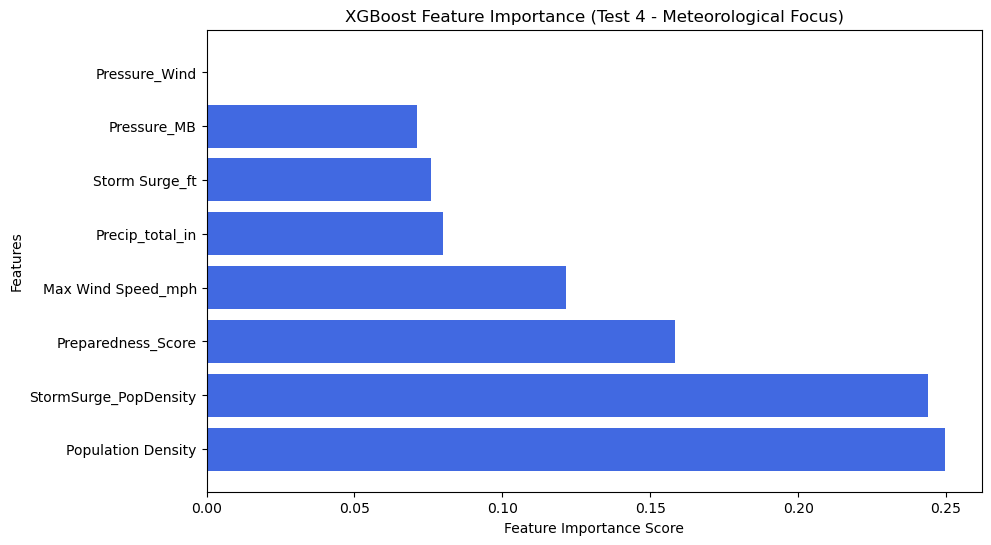

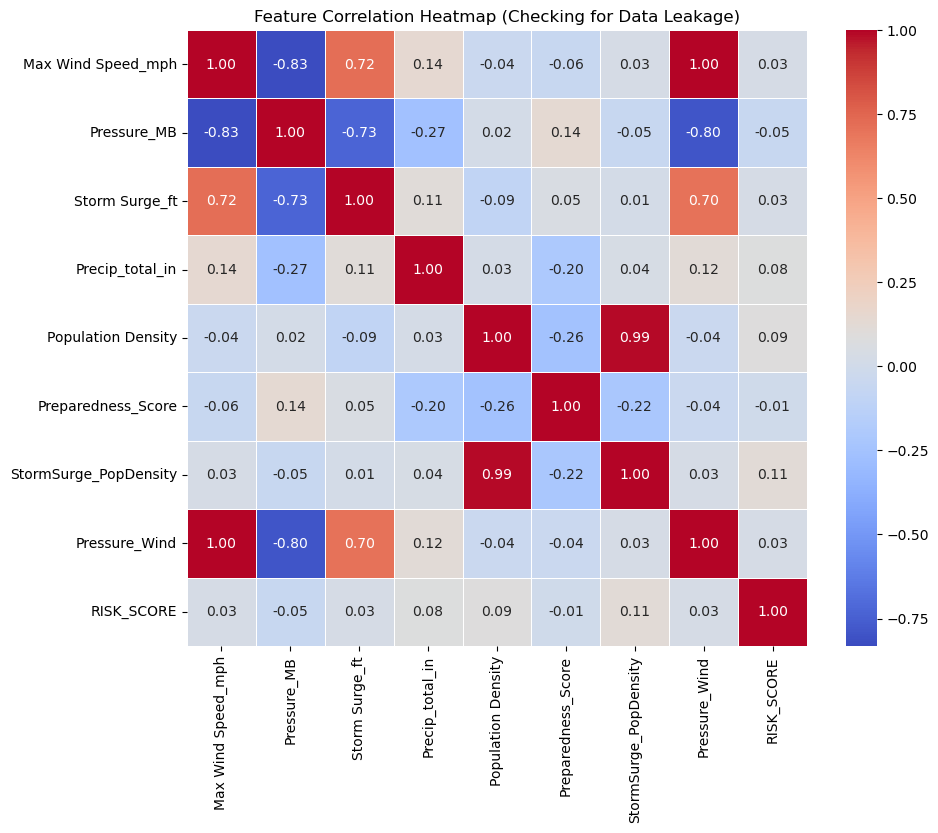


Highly Correlated Features with RISK_SCORE (Potential Leakage Check):
RISK_SCORE               1.000000
StormSurge_PopDensity    0.113843
Population Density       0.089715
Precip_total_in          0.081500
Pressure_MB              0.051896
Max Wind Speed_mph       0.033038
Storm Surge_ft           0.027929
Pressure_Wind            0.027558
Preparedness_Score       0.005651
Name: RISK_SCORE, dtype: float64


In [19]:
# Re-import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Reload the dataset from the verified path
file_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_no_unneeded_data.csv"
df = pd.read_csv(file_path)

# Define selected features (WITHOUT Damage Index) and ADD interaction features
df["StormSurge_PopDensity"] = df["Storm Surge_ft"] * df["Population Density"]
df["Pressure_Wind"] = df["Pressure_MB"] * df["Max Wind Speed_mph"]

selected_features_test4 = [
    "Max Wind Speed_mph",
    "Pressure_MB",
    "Storm Surge_ft",
    "Precip_total_in",
    "Population Density",
    "Preparedness_Score",
    "StormSurge_PopDensity",  # New interaction
    "Pressure_Wind"           # New interaction
]

target_variable = "RISK_SCORE"  # Predicting RISK_SCORE

# Ensure no missing values before processing
df_clean_test4 = df[selected_features_test4 + [target_variable]].dropna()

# Train-test split (randomized)
X_train, X_test, y_train, y_test = train_test_split(
    df_clean_test4[selected_features_test4], df_clean_test4[target_variable], test_size=0.2, random_state=42, shuffle=True
)

# Train XGBoost model for Test 4
xgb_model_test4 = XGBRegressor(n_estimators=50, learning_rate=0.05, max_depth=3,
                               subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_model_test4.fit(X_train, y_train)

# Compute feature importance for Test 4
feature_importance_test4 = xgb_model_test4.feature_importances_

# Create a DataFrame to display feature importance values
feature_importance_df_test4 = pd.DataFrame({
    "Feature": selected_features_test4,
    "Importance": feature_importance_test4
}).sort_values(by="Importance", ascending=False)

# Predict and evaluate model performance for Test 4
y_pred_test4 = xgb_model_test4.predict(X_test)
mse_test4 = mean_squared_error(y_test, y_pred_test4)
r2_test4 = r2_score(y_test, y_pred_test4)

# Print Test 4 results
print("\nTEST 4 – No Damage Index, Enhanced Meteorological Interactions")
print(f"Mean Squared Error: {mse_test4:.4f}")
print(f"R² Score: {r2_test4:.4f}")

# Print feature importance results
print("\nFeature Importance Analysis (Test 4):")
print(feature_importance_df_test4)

# Plot feature importance for Test 4
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_test4["Feature"], feature_importance_df_test4["Importance"], color='royalblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance (Test 4 - Meteorological Focus)")
plt.show()

# Perform data leakage check using correlation matrix
correlation_matrix = df_clean_test4.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Checking for Data Leakage)")
plt.show()

# Identify features highly correlated with RISK_SCORE (above 0.8 threshold)
high_correlation_features = correlation_matrix["RISK_SCORE"].abs().sort_values(ascending=False)

# Print highly correlated features
print("\nHighly Correlated Features with RISK_SCORE (Potential Leakage Check):")
print(high_correlation_features)



TEST 5 – Feature Scaling & Regularization
Mean Squared Error: 6.6361
R² Score: 0.6778

Feature Importance Analysis (Test 5):
              Feature  Importance
4  Population Density    0.401053
5  Preparedness_Score    0.171887
1         Pressure_MB    0.130088
2      Storm Surge_ft    0.109360
3     Precip_total_in    0.094717
0  Max Wind Speed_mph    0.092896


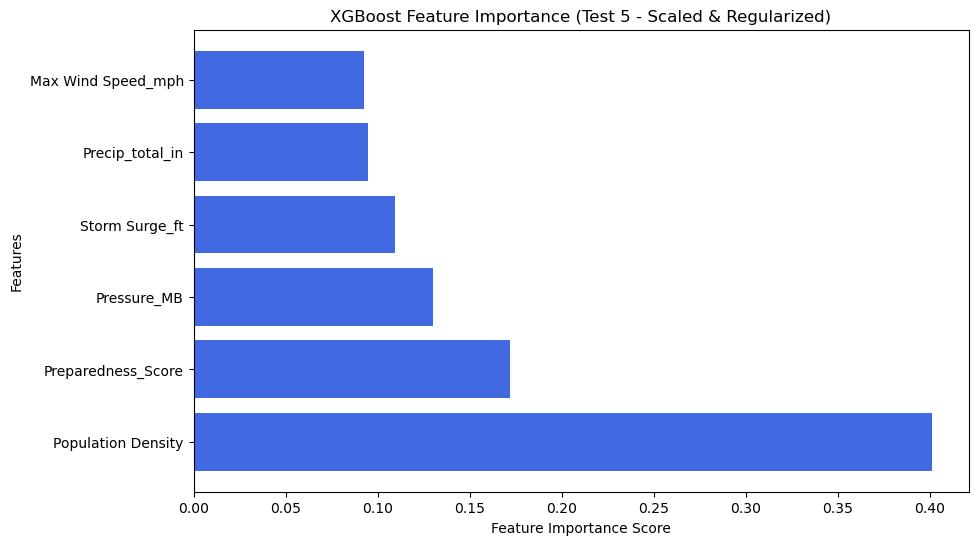

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load the dataset
file_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_no_unneeded_data.csv"
df = pd.read_csv(file_path)

# Define selected features (removing Pressure_Wind)
selected_features_test5 = [
    "Max Wind Speed_mph",
    "Pressure_MB",
    "Storm Surge_ft",
    "Precip_total_in",
    "Population Density",
    "Preparedness_Score"
]

target_variable = "RISK_SCORE"

# Ensure no missing values
df_clean_test5 = df[selected_features_test5 + [target_variable]].dropna()

# Apply feature scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean_test5[selected_features_test5])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df_clean_test5[target_variable], test_size=0.2, random_state=42, shuffle=True
)

# Train XGBoost model with regularization
xgb_model_test5 = XGBRegressor(n_estimators=50, learning_rate=0.05, max_depth=3,
                               subsample=0.8, colsample_bytree=0.8, random_state=42,
                               reg_alpha=0.1, reg_lambda=0.5)  # Regularization
xgb_model_test5.fit(X_train, y_train)

# Compute feature importance
feature_importance_test5 = xgb_model_test5.feature_importances_

# Create a DataFrame to display feature importance values
feature_importance_df_test5 = pd.DataFrame({
    "Feature": selected_features_test5,
    "Importance": feature_importance_test5
}).sort_values(by="Importance", ascending=False)

# Predict and evaluate
y_pred_test5 = xgb_model_test5.predict(X_test)
mse_test5 = mean_squared_error(y_test, y_pred_test5)
r2_test5 = r2_score(y_test, y_pred_test5)

# Print results
print("\nTEST 5 – Feature Scaling & Regularization")
print(f"Mean Squared Error: {mse_test5:.4f}")
print(f"R² Score: {r2_test5:.4f}")
print("\nFeature Importance Analysis (Test 5):")
print(feature_importance_df_test5)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_test5["Feature"], feature_importance_df_test5["Importance"], color='royalblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance (Test 5 - Scaled & Regularized)")
plt.show()


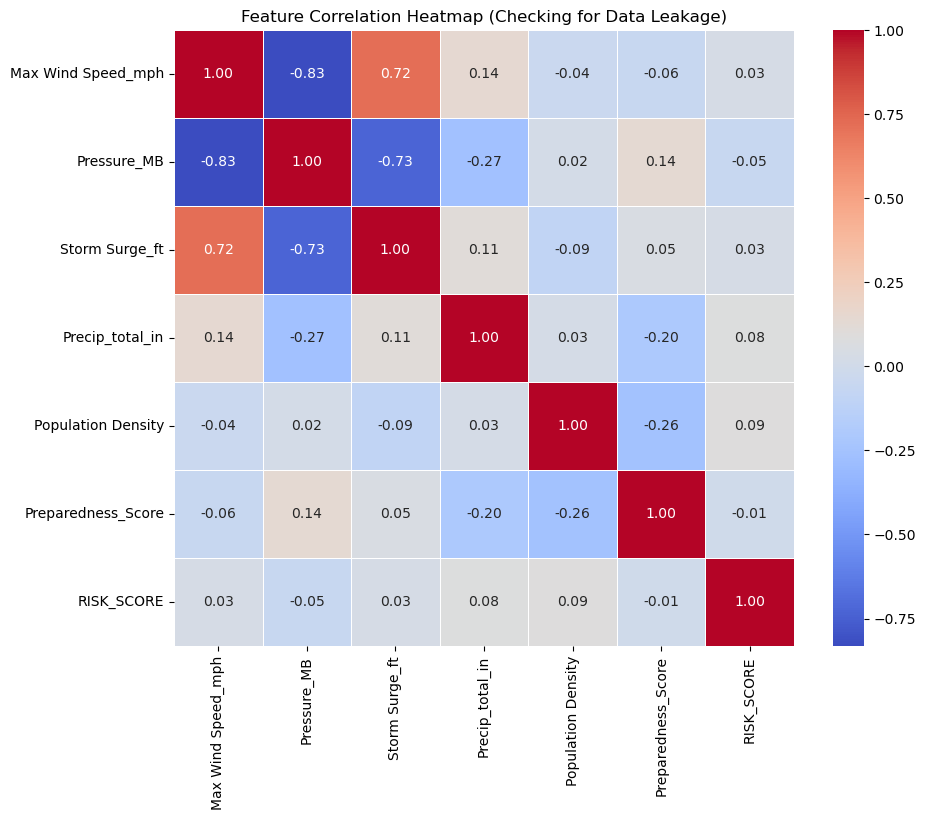


Highly Correlated Features with RISK_SCORE (Potential Leakage Check):
RISK_SCORE            1.000000
Population Density    0.089715
Precip_total_in       0.081500
Pressure_MB           0.051896
Max Wind Speed_mph    0.033038
Storm Surge_ft        0.027929
Preparedness_Score    0.005651
Name: RISK_SCORE, dtype: float64


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_no_unneeded_data.csv"
df = pd.read_csv(file_path)

# Define selected features
selected_features_test5 = [
    "Max Wind Speed_mph",
    "Pressure_MB",
    "Storm Surge_ft",
    "Precip_total_in",
    "Population Density",
    "Preparedness_Score"
]

target_variable = "RISK_SCORE"

# Ensure no missing values
df_clean_test5 = df[selected_features_test5 + [target_variable]].dropna()

# Compute correlation matrix for data leakage check
correlation_matrix = df_clean_test5.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Checking for Data Leakage)")
plt.show()

# Identify features highly correlated with RISK_SCORE (above 0.8 threshold)
high_correlation_features = correlation_matrix["RISK_SCORE"].abs().sort_values(ascending=False)

# Print highly correlated features
print("\nHighly Correlated Features with RISK_SCORE (Potential Leakage Check):")
print(high_correlation_features)



TEST 6 – Adding Quadratic Features
Mean Squared Error: 5.9898
R² Score: 0.7092

Feature Importance Analysis (Test 6):
              Feature  Importance
7  Population Density    0.242250
8  Preparedness_Score    0.136345
2         Pressure_MB    0.123067
1  Wind_Speed_Squared    0.107129
6     Precip_total_in    0.093334
0  Max Wind Speed_mph    0.076630
5  StormSurge_Squared    0.076395
3    Pressure_Squared    0.074072
4      Storm Surge_ft    0.070778


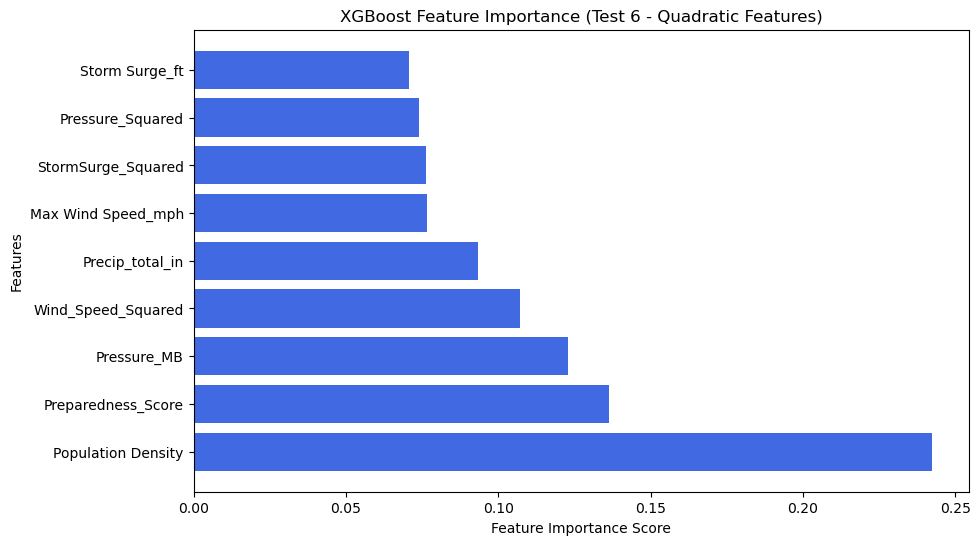

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load the dataset
file_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_no_unneeded_data.csv"
df = pd.read_csv(file_path)

# Define selected features for Test 6 (Adding Quadratic Features)
df["Wind_Speed_Squared"] = df["Max Wind Speed_mph"] ** 2
df["Pressure_Squared"] = df["Pressure_MB"] ** 2
df["StormSurge_Squared"] = df["Storm Surge_ft"] ** 2

selected_features_test6 = [
    "Max Wind Speed_mph", "Wind_Speed_Squared",
    "Pressure_MB", "Pressure_Squared",
    "Storm Surge_ft", "StormSurge_Squared",
    "Precip_total_in", "Population Density", "Preparedness_Score"
]

target_variable = "RISK_SCORE"

# Ensure no missing values before processing
df_clean_test6 = df[selected_features_test6 + [target_variable]].dropna()

# Apply feature scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean_test6[selected_features_test6])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df_clean_test6[target_variable], test_size=0.2, random_state=42, shuffle=True
)

# Train XGBoost model for Test 6
xgb_model_test6 = XGBRegressor(n_estimators=50, learning_rate=0.05, max_depth=3,
                               subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_model_test6.fit(X_train, y_train)

# Compute feature importance for Test 6
feature_importance_test6 = xgb_model_test6.feature_importances_

# Create a DataFrame to display feature importance values
feature_importance_df_test6 = pd.DataFrame({
    "Feature": selected_features_test6,
    "Importance": feature_importance_test6
}).sort_values(by="Importance", ascending=False)

# Predict and evaluate model performance for Test 6
y_pred_test6 = xgb_model_test6.predict(X_test)
mse_test6 = mean_squared_error(y_test, y_pred_test6)
r2_test6 = r2_score(y_test, y_pred_test6)

# Print Test 6 results
print("\nTEST 6 – Adding Quadratic Features")
print(f"Mean Squared Error: {mse_test6:.4f}")
print(f"R² Score: {r2_test6:.4f}")

# Print feature importance results
print("\nFeature Importance Analysis (Test 6):")
print(feature_importance_df_test6)

# Plot feature importance for Test 6
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_test6["Feature"], feature_importance_df_test6["Importance"], color='royalblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance (Test 6 - Quadratic Features)")
plt.show()



TEST 7 – Applying Log Transformations
Mean Squared Error: 6.7825
R² Score: 0.6707

Feature Importance Analysis (Test 7):
              Feature  Importance
4      Log_PopDensity    0.396660
5  Preparedness_Score    0.181366
1        Log_Pressure    0.123564
2      Log_StormSurge    0.101236
0       Log_WindSpeed    0.098752
3          Log_Precip    0.098421


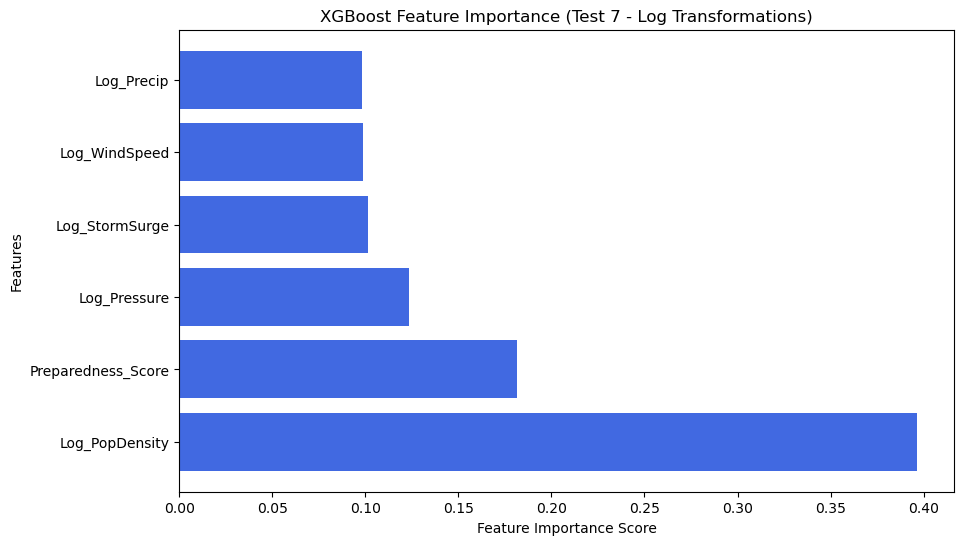

In [23]:
# Re-import necessary libraries since execution state was reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load the dataset
file_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_no_unneeded_data.csv"
df = pd.read_csv(file_path)

# Define selected features for Test 7 (Applying Log Transformations)
df["Log_PopDensity"] = np.log1p(df["Population Density"])  # Log transform to normalize skew
df["Log_Precip"] = np.log1p(df["Precip_total_in"])
df["Log_StormSurge"] = np.log1p(df["Storm Surge_ft"])
df["Log_WindSpeed"] = np.log1p(df["Max Wind Speed_mph"])
df["Log_Pressure"] = np.log1p(df["Pressure_MB"])

selected_features_test7 = [
    "Log_WindSpeed",
    "Log_Pressure",
    "Log_StormSurge",
    "Log_Precip",
    "Log_PopDensity",
    "Preparedness_Score"
]

target_variable = "RISK_SCORE"

# Ensure no missing values before processing
df_clean_test7 = df[selected_features_test7 + [target_variable]].dropna()

# Apply feature scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean_test7[selected_features_test7])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df_clean_test7[target_variable], test_size=0.2, random_state=42, shuffle=True
)

# Train XGBoost model for Test 7
xgb_model_test7 = XGBRegressor(n_estimators=50, learning_rate=0.05, max_depth=3,
                               subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_model_test7.fit(X_train, y_train)

# Compute feature importance for Test 7
feature_importance_test7 = xgb_model_test7.feature_importances_

# Create a DataFrame to display feature importance values
feature_importance_df_test7 = pd.DataFrame({
    "Feature": selected_features_test7,
    "Importance": feature_importance_test7
}).sort_values(by="Importance", ascending=False)

# Predict and evaluate model performance for Test 7
y_pred_test7 = xgb_model_test7.predict(X_test)
mse_test7 = mean_squared_error(y_test, y_pred_test7)
r2_test7 = r2_score(y_test, y_pred_test7)

# Print Test 7 results
print("\nTEST 7 – Applying Log Transformations")
print(f"Mean Squared Error: {mse_test7:.4f}")
print(f"R² Score: {r2_test7:.4f}")

# Print feature importance results
print("\nFeature Importance Analysis (Test 7):")
print(feature_importance_df_test7)

# Plot feature importance for Test 7
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_test7["Feature"], feature_importance_df_test7["Importance"], color='royalblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance (Test 7 - Log Transformations)")
plt.show()


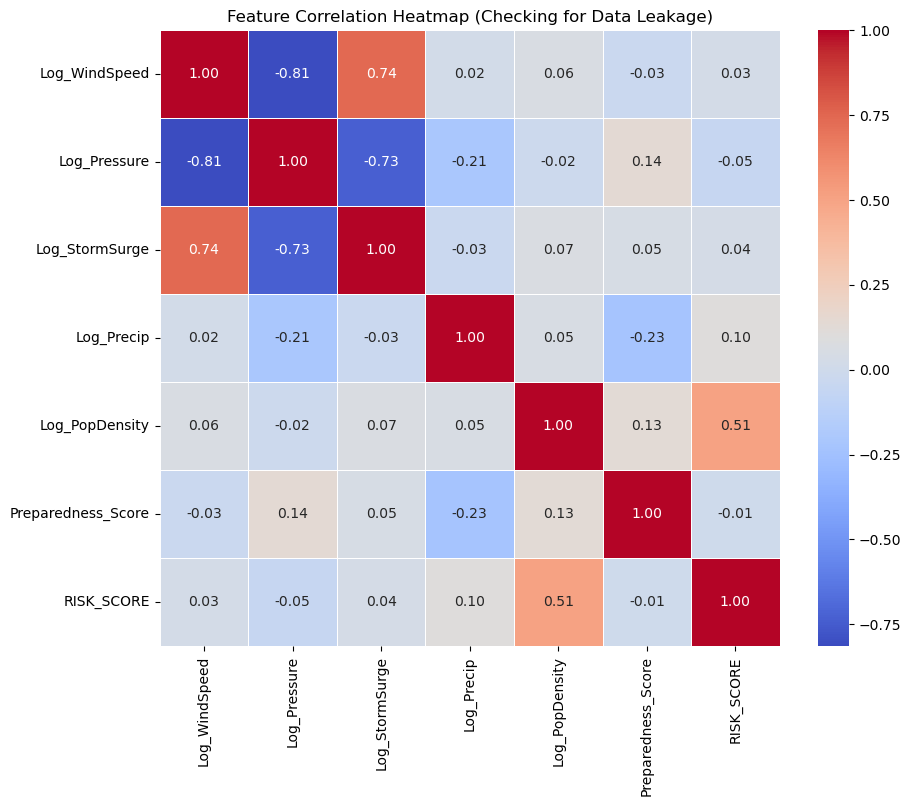


Highly Correlated Features with RISK_SCORE (Potential Leakage Check):
RISK_SCORE            1.000000
Log_PopDensity        0.508696
Log_Precip            0.099733
Log_Pressure          0.053981
Log_StormSurge        0.035690
Log_WindSpeed         0.025889
Preparedness_Score    0.005651
Name: RISK_SCORE, dtype: float64


In [24]:
# Compute correlation matrix for data leakage check
correlation_matrix = df_clean_test7.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Checking for Data Leakage)")
plt.show()

# Identify features highly correlated with RISK_SCORE (above 0.8 threshold)
high_correlation_features = correlation_matrix["RISK_SCORE"].abs().sort_values(ascending=False)

# Print highly correlated features
print("\nHighly Correlated Features with RISK_SCORE (Potential Leakage Check):")
print(high_correlation_features)



TEST 8 – Adding Interaction Features
Mean Squared Error: 6.2059
R² Score: 0.6987

Feature Importance Analysis (Test 8):
               Feature  Importance
4   Population Density    0.267417
5   Preparedness_Score    0.138987
8  Pressure_StormSurge    0.106607
7      StormSurge_Wind    0.104656
6   WindSpeed_Pressure    0.099511
3      Precip_total_in    0.086603
0   Max Wind Speed_mph    0.085461
1          Pressure_MB    0.077524
2       Storm Surge_ft    0.033234


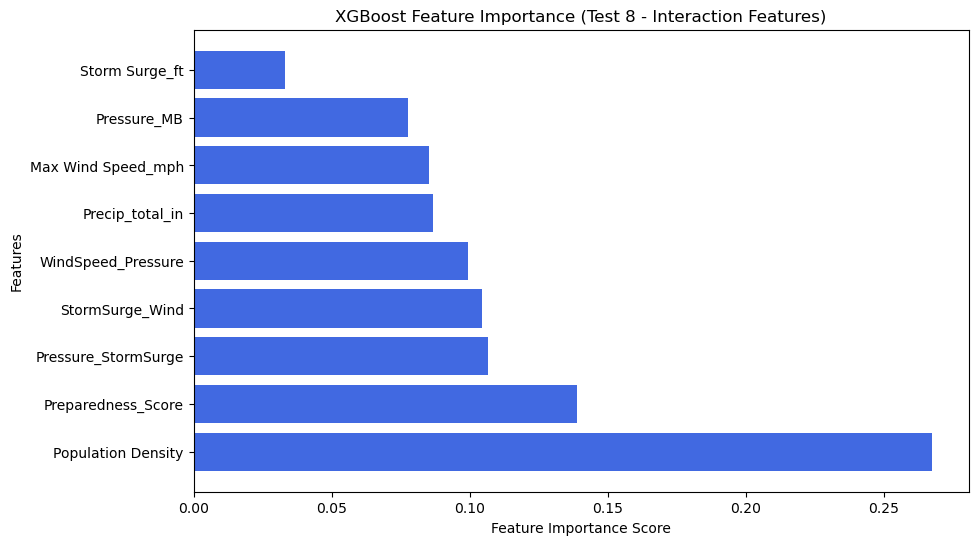

In [25]:
# Re-import necessary libraries since execution state was reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load the dataset
file_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_no_unneeded_data.csv"
df = pd.read_csv(file_path)

# Define selected features for Test 8 (Adding Interaction Features)
df["WindSpeed_Pressure"] = df["Max Wind Speed_mph"] * df["Pressure_MB"]
df["StormSurge_Wind"] = df["Storm Surge_ft"] * df["Max Wind Speed_mph"]
df["Pressure_StormSurge"] = df["Pressure_MB"] * df["Storm Surge_ft"]

selected_features_test8 = [
    "Max Wind Speed_mph", "Pressure_MB", "Storm Surge_ft", "Precip_total_in",
    "Population Density", "Preparedness_Score",
    "WindSpeed_Pressure", "StormSurge_Wind", "Pressure_StormSurge"
]

target_variable = "RISK_SCORE"

# Ensure no missing values before processing
df_clean_test8 = df[selected_features_test8 + [target_variable]].dropna()

# Apply feature scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean_test8[selected_features_test8])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df_clean_test8[target_variable], test_size=0.2, random_state=42, shuffle=True
)

# Train XGBoost model for Test 8
xgb_model_test8 = XGBRegressor(n_estimators=50, learning_rate=0.05, max_depth=3,
                               subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_model_test8.fit(X_train, y_train)

# Compute feature importance for Test 8
feature_importance_test8 = xgb_model_test8.feature_importances_

# Create a DataFrame to display feature importance values
feature_importance_df_test8 = pd.DataFrame({
    "Feature": selected_features_test8,
    "Importance": feature_importance_test8
}).sort_values(by="Importance", ascending=False)

# Predict and evaluate model performance for Test 8
y_pred_test8 = xgb_model_test8.predict(X_test)
mse_test8 = mean_squared_error(y_test, y_pred_test8)
r2_test8 = r2_score(y_test, y_pred_test8)

# Print Test 8 results
print("\nTEST 8 – Adding Interaction Features")
print(f"Mean Squared Error: {mse_test8:.4f}")
print(f"R² Score: {r2_test8:.4f}")

# Print feature importance results
print("\nFeature Importance Analysis (Test 8):")
print(feature_importance_df_test8)

# Plot feature importance for Test 8
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_test8["Feature"], feature_importance_df_test8["Importance"], color='royalblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance (Test 8 - Interaction Features)")
plt.show()



RANDOM FOREST MODEL – Quick Test
Mean Squared Error: 5.5260
R² Score: 0.7317

Feature Importance Analysis (Random Forest):
               Feature  Importance
4   Population Density    0.657638
5   Preparedness_Score    0.173675
3      Precip_total_in    0.041480
1          Pressure_MB    0.030176
8  Pressure_StormSurge    0.029188
7      StormSurge_Wind    0.026176
6   WindSpeed_Pressure    0.019529
2       Storm Surge_ft    0.011907
0   Max Wind Speed_mph    0.010232


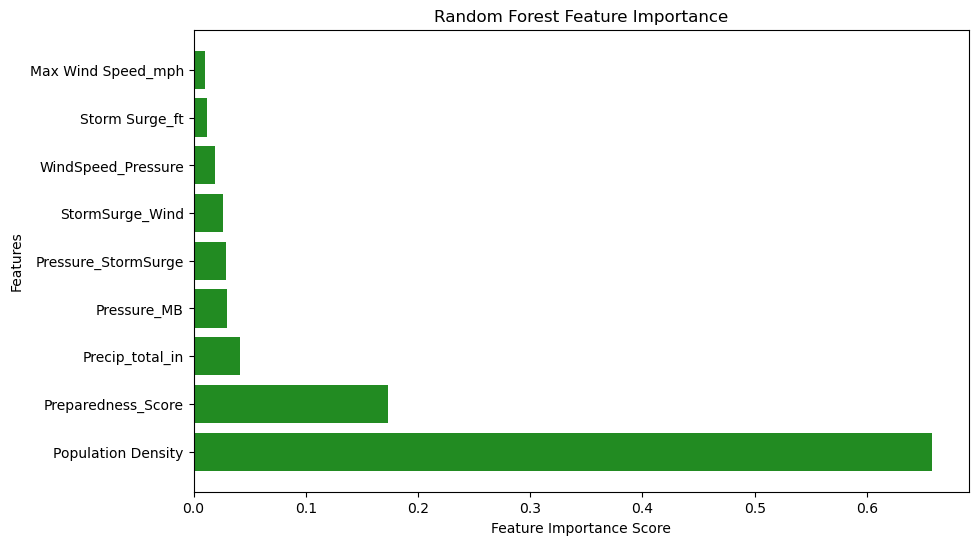

In [26]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model for comparison
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate Random Forest performance
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Compute feature importance for Random Forest
feature_importance_rf = rf_model.feature_importances_

# Create a DataFrame to display feature importance values
feature_importance_df_rf = pd.DataFrame({
    "Feature": selected_features_test8,
    "Importance": feature_importance_rf
}).sort_values(by="Importance", ascending=False)

# Print Random Forest results
print("\nRANDOM FOREST MODEL – Quick Test")
print(f"Mean Squared Error: {mse_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")

# Print feature importance results
print("\nFeature Importance Analysis (Random Forest):")
print(feature_importance_df_rf)

# Plot feature importance for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_rf["Feature"], feature_importance_df_rf["Importance"], color='forestgreen')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()



RF_50_Trees – Random Forest Model
Mean Squared Error: 5.9431
R² Score: 0.7115

Feature Importance Analysis:
              Feature  Importance
4  Population Density    0.673451
5  Preparedness_Score    0.178790
3     Precip_total_in    0.049492
2      Storm Surge_ft    0.038329
1         Pressure_MB    0.030424
0  Max Wind Speed_mph    0.029513


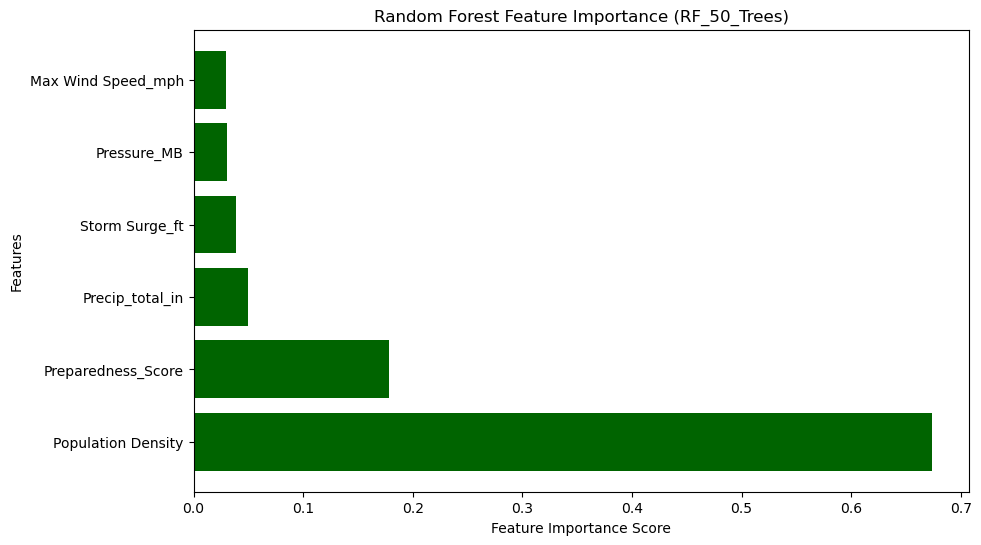


RF_100_Trees – Random Forest Model
Mean Squared Error: 5.1037
R² Score: 0.7522

Feature Importance Analysis:
              Feature  Importance
4  Population Density    0.666214
5  Preparedness_Score    0.185887
3     Precip_total_in    0.043892
2      Storm Surge_ft    0.037499
1         Pressure_MB    0.034119
0  Max Wind Speed_mph    0.032389


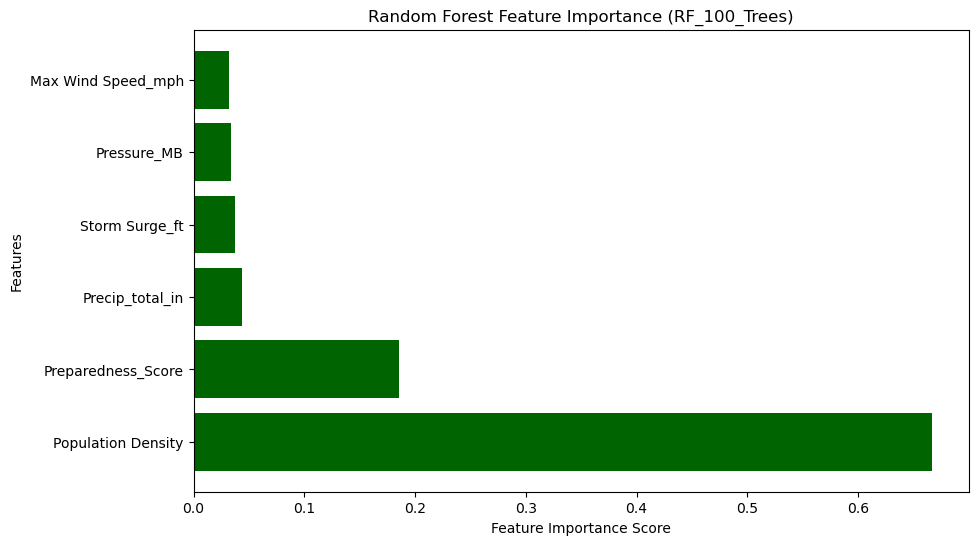


RF_200_Trees – Random Forest Model
Mean Squared Error: 5.7774
R² Score: 0.7195

Feature Importance Analysis:
              Feature  Importance
4  Population Density    0.655114
5  Preparedness_Score    0.186412
3     Precip_total_in    0.043144
1         Pressure_MB    0.040193
2      Storm Surge_ft    0.039125
0  Max Wind Speed_mph    0.036013


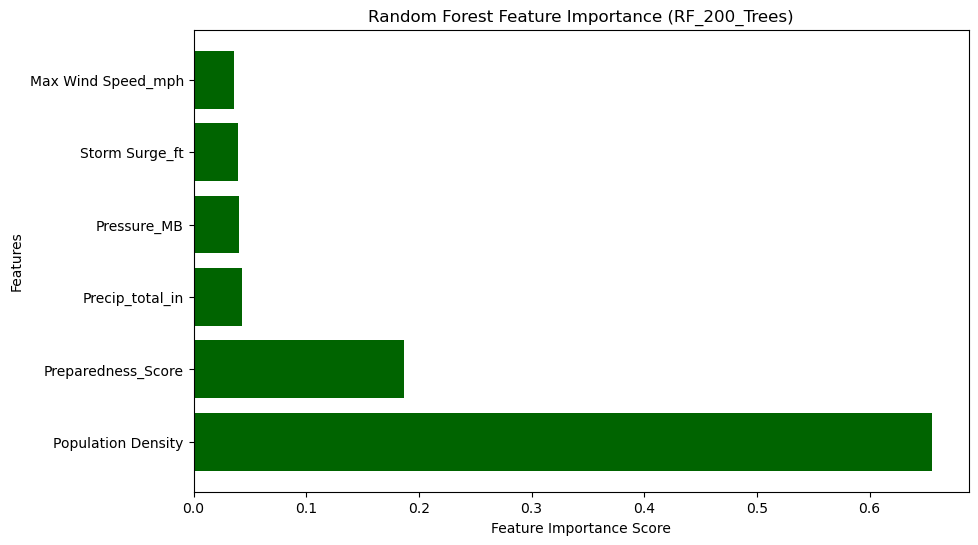


RF_Deep_Trees – Random Forest Model
Mean Squared Error: 5.1037
R² Score: 0.7522

Feature Importance Analysis:
              Feature  Importance
4  Population Density    0.666214
5  Preparedness_Score    0.185887
3     Precip_total_in    0.043892
2      Storm Surge_ft    0.037499
1         Pressure_MB    0.034119
0  Max Wind Speed_mph    0.032389


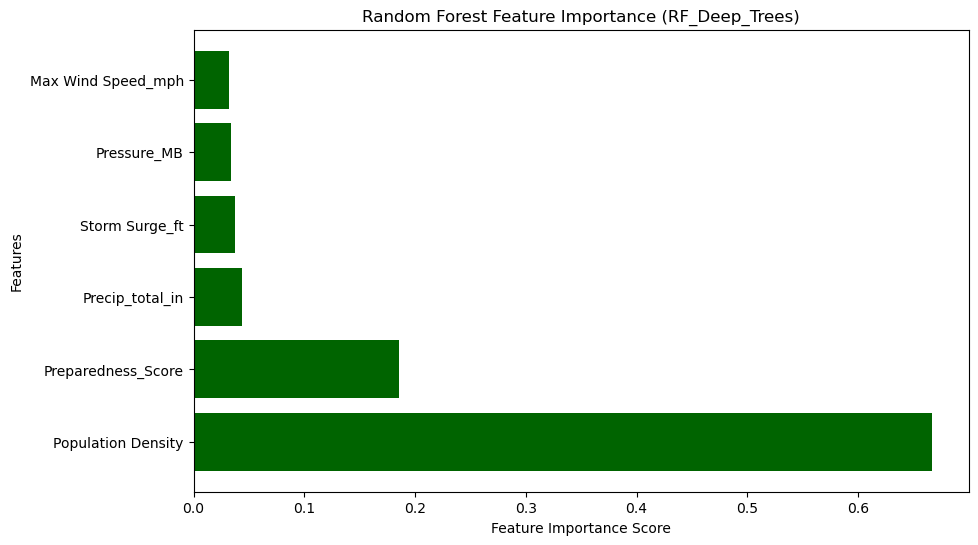


RF_Shallow_Trees – Random Forest Model
Mean Squared Error: 6.6434
R² Score: 0.6775

Feature Importance Analysis:
              Feature  Importance
4  Population Density    0.697369
5  Preparedness_Score    0.187153
3     Precip_total_in    0.034265
2      Storm Surge_ft    0.029899
1         Pressure_MB    0.027787
0  Max Wind Speed_mph    0.023526


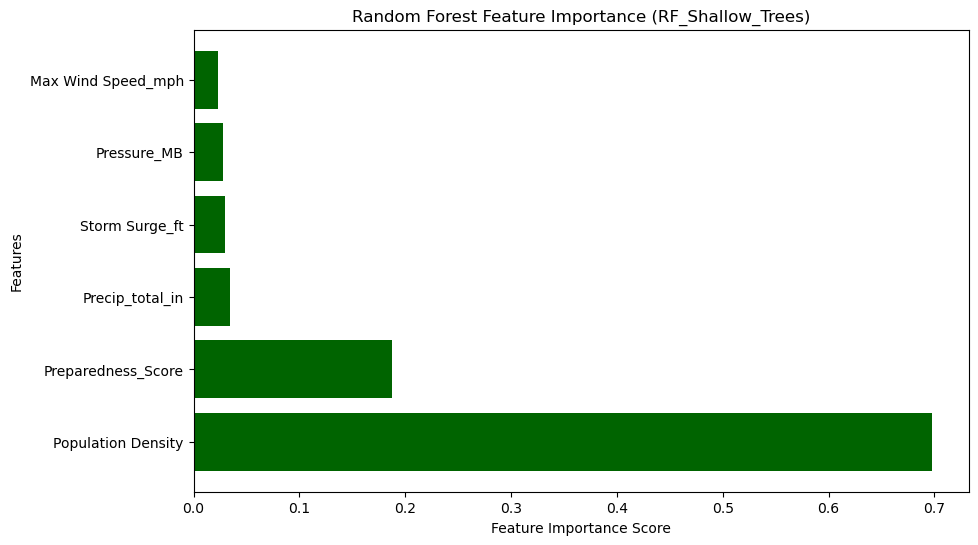

In [27]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_no_unneeded_data.csv"
df = pd.read_csv(file_path)

# Define selected features
selected_features_rf = [
    "Max Wind Speed_mph", "Pressure_MB", "Storm Surge_ft", "Precip_total_in",
    "Population Density", "Preparedness_Score"
]

target_variable = "RISK_SCORE"

# Ensure no missing values
df_clean_rf = df[selected_features_rf + [target_variable]].dropna()

# Apply feature scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean_rf[selected_features_rf])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df_clean_rf[target_variable], test_size=0.2, random_state=42, shuffle=True
)

# Define Random Forest configurations
rf_configs = {
    "RF_50_Trees": RandomForestRegressor(n_estimators=50, max_depth=None, random_state=42),
    "RF_100_Trees": RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42),
    "RF_200_Trees": RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42),
    "RF_Deep_Trees": RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42),
    "RF_Shallow_Trees": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
}

# Run tests for different Random Forest configurations
rf_results = {}
for name, rf_model in rf_configs.items():
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)

    feature_importance_rf = rf_model.feature_importances_
    feature_importance_df_rf = pd.DataFrame({
        "Feature": selected_features_rf,
        "Importance": feature_importance_rf
    }).sort_values(by="Importance", ascending=False)

    rf_results[name] = {
        "MSE": mse_rf,
        "R2": r2_rf,
        "Feature Importance": feature_importance_df_rf
    }

    # Print results
    print(f"\n{name} – Random Forest Model")
    print(f"Mean Squared Error: {mse_rf:.4f}")
    print(f"R² Score: {r2_rf:.4f}")
    print("\nFeature Importance Analysis:")
    print(feature_importance_df_rf)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df_rf["Feature"], feature_importance_df_rf["Importance"], color='darkgreen')
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Features")
    plt.title(f"Random Forest Feature Importance ({name})")
    plt.show()



TEST 9 – Balanced Sampling (Reduced Population Density Influence)
Mean Squared Error: 4.2955
R² Score: 0.5919

Feature Importance Analysis (Balanced Model):
              Feature  Importance
4  Population Density    0.668092
5  Preparedness_Score    0.189371
3     Precip_total_in    0.060853
2      Storm Surge_ft    0.032727
0  Max Wind Speed_mph    0.024486
1         Pressure_MB    0.024470


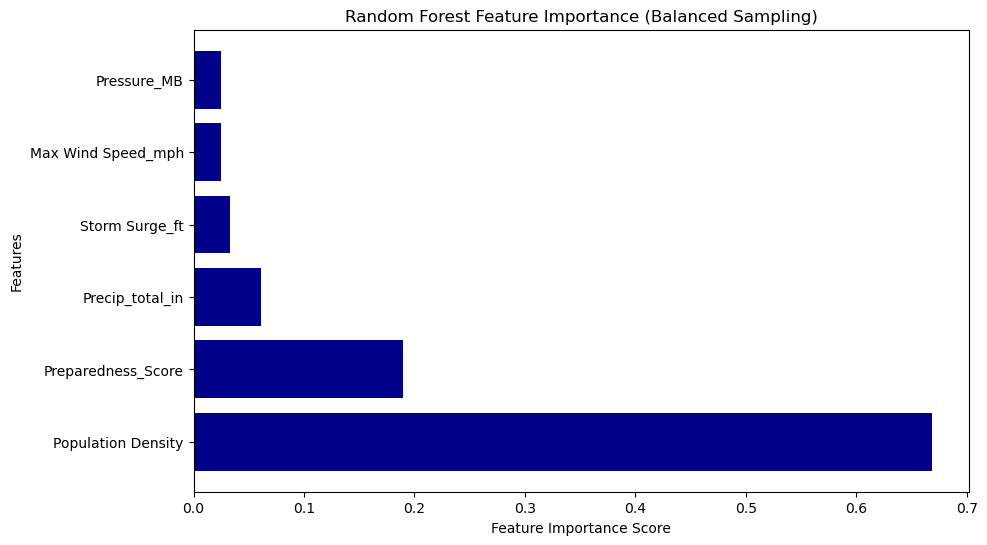

In [28]:
# Re-import necessary libraries since execution state was reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_no_unneeded_data.csv"
df = pd.read_csv(file_path)

# Define selected features for Test 9 (Balanced Sampling)
selected_features_test9 = [
    "Max Wind Speed_mph", "Pressure_MB", "Storm Surge_ft", "Precip_total_in",
    "Population Density", "Preparedness_Score"
]

target_variable = "RISK_SCORE"

# Ensure no missing values before processing
df_clean_test9 = df[selected_features_test9 + [target_variable]].dropna()

# Identify median population density
median_pop_density = df_clean_test9["Population Density"].median()

# Separate high and low population density regions
df_high_density = df_clean_test9[df_clean_test9["Population Density"] >= median_pop_density]
df_low_density = df_clean_test9[df_clean_test9["Population Density"] < median_pop_density]

# Downsample high-density areas to match low-density regions
df_high_density_balanced = resample(df_high_density, 
                                    replace=False, 
                                    n_samples=len(df_low_density), 
                                    random_state=42)

# Combine balanced datasets
df_balanced = pd.concat([df_low_density, df_high_density_balanced])

# Apply feature scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_balanced[selected_features_test9])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df_balanced[target_variable], test_size=0.2, random_state=42, shuffle=True
)

# Train Random Forest model on balanced data
rf_model_balanced = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf_model_balanced.fit(X_train, y_train)

# Predict and evaluate Random Forest performance on balanced data
y_pred_rf_balanced = rf_model_balanced.predict(X_test)
mse_rf_balanced = mean_squared_error(y_test, y_pred_rf_balanced)
r2_rf_balanced = r2_score(y_test, y_pred_rf_balanced)

# Compute feature importance for balanced model
feature_importance_rf_balanced = rf_model_balanced.feature_importances_

# Create a DataFrame to display feature importance values
feature_importance_df_rf_balanced = pd.DataFrame({
    "Feature": selected_features_test9,
    "Importance": feature_importance_rf_balanced
}).sort_values(by="Importance", ascending=False)

# Print results for balanced model
print("\nTEST 9 – Balanced Sampling (Reduced Population Density Influence)")
print(f"Mean Squared Error: {mse_rf_balanced:.4f}")
print(f"R² Score: {r2_rf_balanced:.4f}")

# Print feature importance results
print("\nFeature Importance Analysis (Balanced Model):")
print(feature_importance_df_rf_balanced)

# Plot feature importance for balanced model
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_rf_balanced["Feature"], feature_importance_df_rf_balanced["Importance"], color='darkblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance (Balanced Sampling)")
plt.show()



TEST 10 – Feature Weighting Adjustments (Reducing Exposure Bias, Boosting Meteorological Factors)
Mean Squared Error: 5.1037
R² Score: 0.7522

Feature Importance Analysis (Weighted Model):
              Feature  Importance
4  Population Density    0.666214
5  Preparedness_Score    0.185887
3     Precip_total_in    0.043892
2      Storm Surge_ft    0.037499
1         Pressure_MB    0.034119
0  Max Wind Speed_mph    0.032389


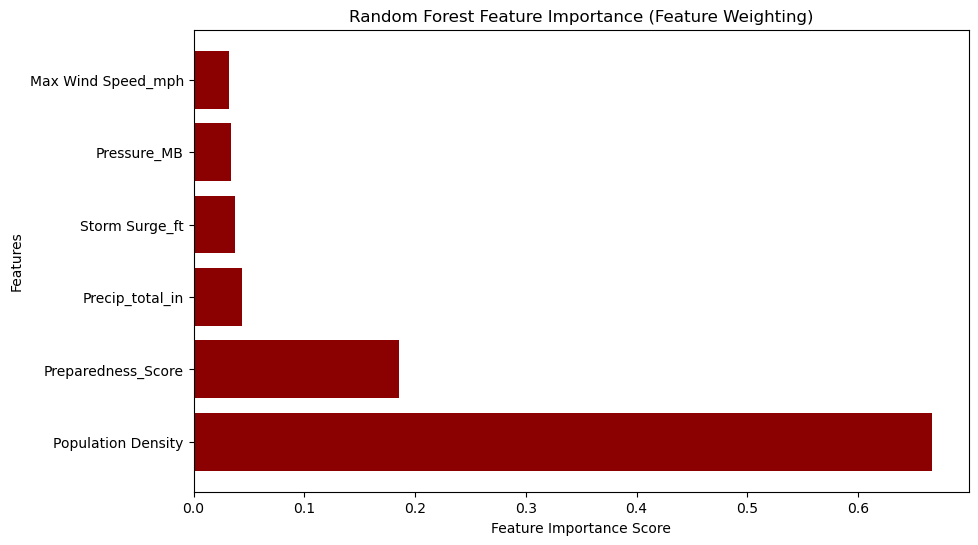

In [29]:
# Re-import necessary libraries since execution state was reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_no_unneeded_data.csv"
df = pd.read_csv(file_path)

# Define selected features for Test 10 (Feature Weighting Adjustments)
selected_features_test10 = [
    "Max Wind Speed_mph", "Pressure_MB", "Storm Surge_ft", "Precip_total_in",
    "Population Density", "Preparedness_Score"
]

target_variable = "RISK_SCORE"

# Ensure no missing values before processing
df_clean_test10 = df[selected_features_test10 + [target_variable]].dropna()

# **Apply Feature Weighting (Reduce Influence of Population Density, Boost Meteorological Factors)**
df_clean_test10["Population Density"] *= 0.5  # Reduce its influence by 50%
df_clean_test10["Max Wind Speed_mph"] *= 2  # Increase importance
df_clean_test10["Pressure_MB"] *= 2
df_clean_test10["Storm Surge_ft"] *= 2

# Apply feature scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean_test10[selected_features_test10])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df_clean_test10[target_variable], test_size=0.2, random_state=42, shuffle=True
)

# Train Random Forest model on reweighted features
rf_model_weighted = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf_model_weighted.fit(X_train, y_train)

# Predict and evaluate Random Forest performance with feature weighting
y_pred_rf_weighted = rf_model_weighted.predict(X_test)
mse_rf_weighted = mean_squared_error(y_test, y_pred_rf_weighted)
r2_rf_weighted = r2_score(y_test, y_pred_rf_weighted)

# Compute feature importance for weighted model
feature_importance_rf_weighted = rf_model_weighted.feature_importances_

# Create a DataFrame to display feature importance values
feature_importance_df_rf_weighted = pd.DataFrame({
    "Feature": selected_features_test10,
    "Importance": feature_importance_rf_weighted
}).sort_values(by="Importance", ascending=False)

# Print results for weighted feature model
print("\nTEST 10 – Feature Weighting Adjustments (Reducing Exposure Bias, Boosting Meteorological Factors)")
print(f"Mean Squared Error: {mse_rf_weighted:.4f}")
print(f"R² Score: {r2_rf_weighted:.4f}")

# Print feature importance results
print("\nFeature Importance Analysis (Weighted Model):")
print(feature_importance_df_rf_weighted)

# Plot feature importance for weighted model
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_rf_weighted["Feature"], feature_importance_df_rf_weighted["Importance"], color='darkred')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance (Feature Weighting)")
plt.show()



TEST 11 – Gradient Boosting Model (GBM)
Mean Squared Error: 3.3778
R² Score: 0.8360

Feature Importance Analysis (GBM Model):
              Feature  Importance
5        Damage Index    0.544879
6  Preparedness_Score    0.195923
4  Population Density    0.163238
2      Storm Surge_ft    0.031050
1         Pressure_MB    0.027543
0  Max Wind Speed_mph    0.020337
3     Precip_total_in    0.017030


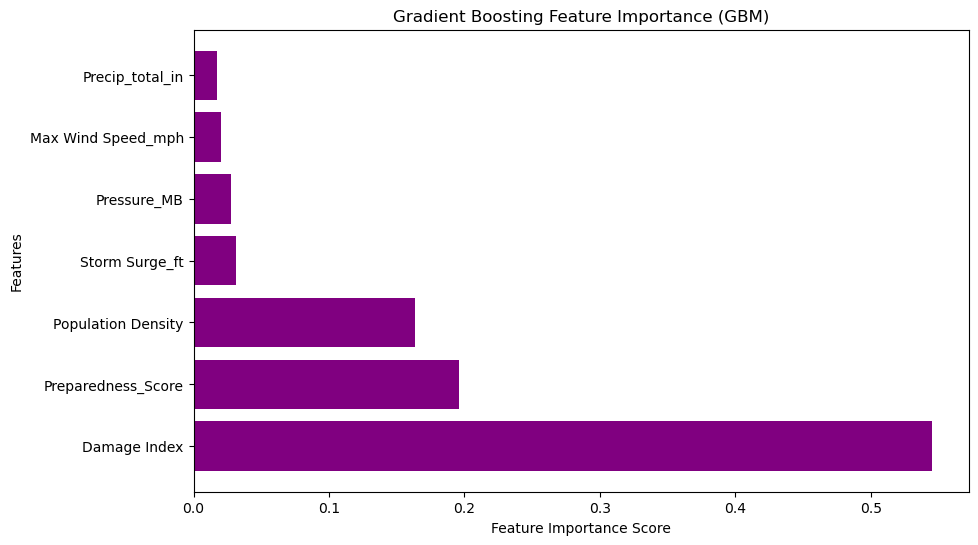

In [30]:
# Re-import necessary libraries since execution state was reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_no_unneeded_data.csv"
df = pd.read_csv(file_path)

# Define selected features for Test 11 (Gradient Boosting Model)
selected_features_test11 = [
    "Max Wind Speed_mph", "Pressure_MB", "Storm Surge_ft", "Precip_total_in",
    "Population Density", "Damage Index", "Preparedness_Score"
]

target_variable = "RISK_SCORE"

# Ensure no missing values before processing
df_clean_test11 = df[selected_features_test11 + [target_variable]].dropna()

# Apply feature scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean_test11[selected_features_test11])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df_clean_test11[target_variable], test_size=0.2, random_state=42, shuffle=True
)

# Train Gradient Boosting model
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=5, random_state=42)
gbm_model.fit(X_train, y_train)

# Predict and evaluate Gradient Boosting performance
y_pred_gbm = gbm_model.predict(X_test)
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
r2_gbm = r2_score(y_test, y_pred_gbm)

# Compute feature importance for Gradient Boosting model
feature_importance_gbm = gbm_model.feature_importances_

# Create a DataFrame to display feature importance values
feature_importance_df_gbm = pd.DataFrame({
    "Feature": selected_features_test11,
    "Importance": feature_importance_gbm
}).sort_values(by="Importance", ascending=False)

# Print results for Gradient Boosting model
print("\nTEST 11 – Gradient Boosting Model (GBM)")
print(f"Mean Squared Error: {mse_gbm:.4f}")
print(f"R² Score: {r2_gbm:.4f}")

# Print feature importance results
print("\nFeature Importance Analysis (GBM Model):")
print(feature_importance_df_gbm)

# Plot feature importance for GBM model
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_gbm["Feature"], feature_importance_df_gbm["Importance"], color='purple')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Gradient Boosting Feature Importance (GBM)")
plt.show()



Basic Statistics for Damage Index:
count    1.480000e+02
mean     1.034572e+08
std      3.889442e+08
min      1.970685e+06
25%      1.295356e+07
50%      4.234590e+07
75%      8.637593e+07
max      3.383460e+09
Name: Damage Index, dtype: float64


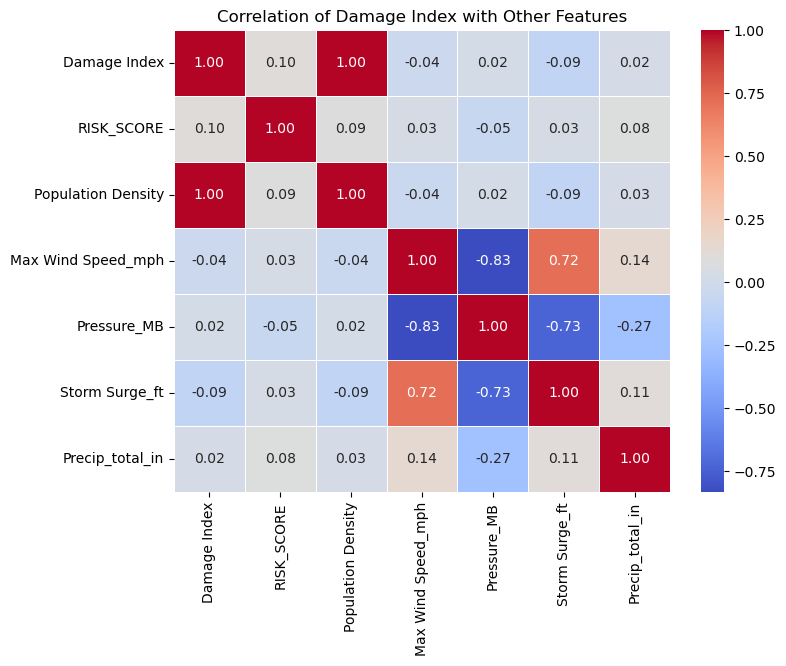


Top 10 Highest Damage Index Values:
     Damage Index
67   3.383460e+09
60   3.383460e+09
141  2.270032e+08
101  2.270032e+08
96   2.027788e+08
98   1.703071e+08
19   1.645515e+08
82   1.645515e+08
117  1.645515e+08
97   1.645515e+08


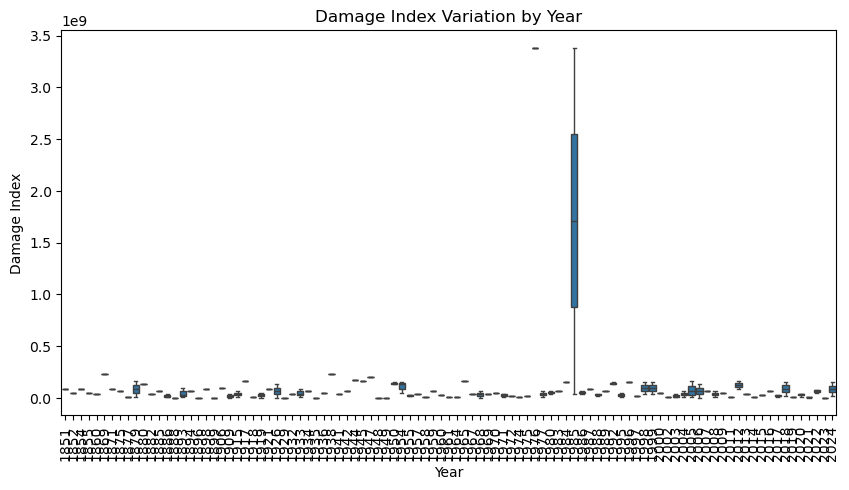

In [31]:
# Check basic statistics and distribution of Damage Index
print("\nBasic Statistics for Damage Index:")
print(df["Damage Index"].describe())

# Check correlation between Damage Index and other features (to see if it correlates with post-storm factors)
correlation_matrix_damage = df[["Damage Index", "RISK_SCORE", "Population Density", 
                                "Max Wind Speed_mph", "Pressure_MB", "Storm Surge_ft", "Precip_total_in"]].corr()

# Visualize correlation matrix for Damage Index
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_damage, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation of Damage Index with Other Features")
plt.show()

# Check for extreme values (potential post-storm outliers)
print("\nTop 10 Highest Damage Index Values:")
print(df[["Damage Index"]].sort_values(by="Damage Index", ascending=False).head(10))

# Check if Damage Index changes significantly across different years (indicating post-storm assessments)
if "Year" in df.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df["Year"], y=df["Damage Index"])
    plt.xticks(rotation=90)
    plt.title("Damage Index Variation by Year")
    plt.xlabel("Year")
    plt.ylabel("Damage Index")
    plt.show()
else:
    print("\nYear column not found in dataset. Unable to check Damage Index trends over time.")



TEST 13 – GBM Without Damage Index
Mean Squared Error: 2.8767
R² Score: 0.8603

Feature Importance Analysis (GBM Without Damage Index):
              Feature  Importance
4  Population Density    0.656610
5  Preparedness_Score    0.243143
1         Pressure_MB    0.046449
3     Precip_total_in    0.024349
2      Storm Surge_ft    0.017619
0  Max Wind Speed_mph    0.011831


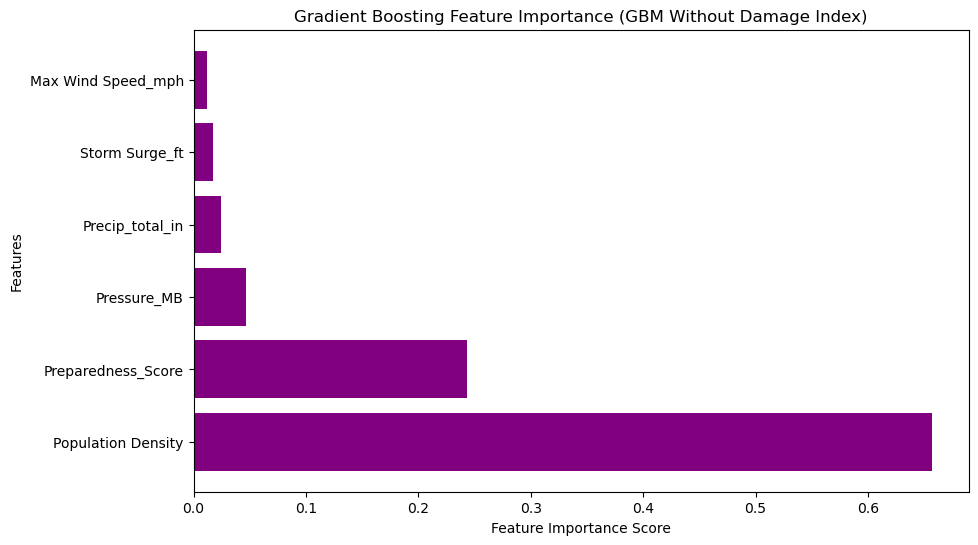

In [32]:
# Re-import necessary libraries since execution state was reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_no_unneeded_data.csv"
df = pd.read_csv(file_path)

# **TEST 13 – Remove Damage Index and Retrain GBM**
selected_features_test13 = [
    "Max Wind Speed_mph", "Pressure_MB", "Storm Surge_ft", "Precip_total_in",
    "Population Density", "Preparedness_Score"
]

target_variable = "RISK_SCORE"

# Ensure no missing values before processing
df_clean_test13 = df[selected_features_test13 + [target_variable]].dropna()

# Apply feature scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean_test13[selected_features_test13])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df_clean_test13[target_variable], test_size=0.2, random_state=42, shuffle=True
)

# Train Gradient Boosting model (without Damage Index)
gbm_model_no_damage = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=5, random_state=42)
gbm_model_no_damage.fit(X_train, y_train)

# Predict and evaluate GBM performance without Damage Index
y_pred_gbm_no_damage = gbm_model_no_damage.predict(X_test)
mse_gbm_no_damage = mean_squared_error(y_test, y_pred_gbm_no_damage)
r2_gbm_no_damage = r2_score(y_test, y_pred_gbm_no_damage)

# Compute feature importance for GBM model without Damage Index
feature_importance_gbm_no_damage = gbm_model_no_damage.feature_importances_

# Create a DataFrame to display feature importance values
feature_importance_df_gbm_no_damage = pd.DataFrame({
    "Feature": selected_features_test13,
    "Importance": feature_importance_gbm_no_damage
}).sort_values(by="Importance", ascending=False)

# Print results for GBM without Damage Index
print("\nTEST 13 – GBM Without Damage Index")
print(f"Mean Squared Error: {mse_gbm_no_damage:.4f}")
print(f"R² Score: {r2_gbm_no_damage:.4f}")

# Print feature importance results
print("\nFeature Importance Analysis (GBM Without Damage Index):")
print(feature_importance_df_gbm_no_damage)

# Plot feature importance for GBM without Damage Index
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_gbm_no_damage["Feature"], feature_importance_df_gbm_no_damage["Importance"], color='purple')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Gradient Boosting Feature Importance (GBM Without Damage Index)")
plt.show()


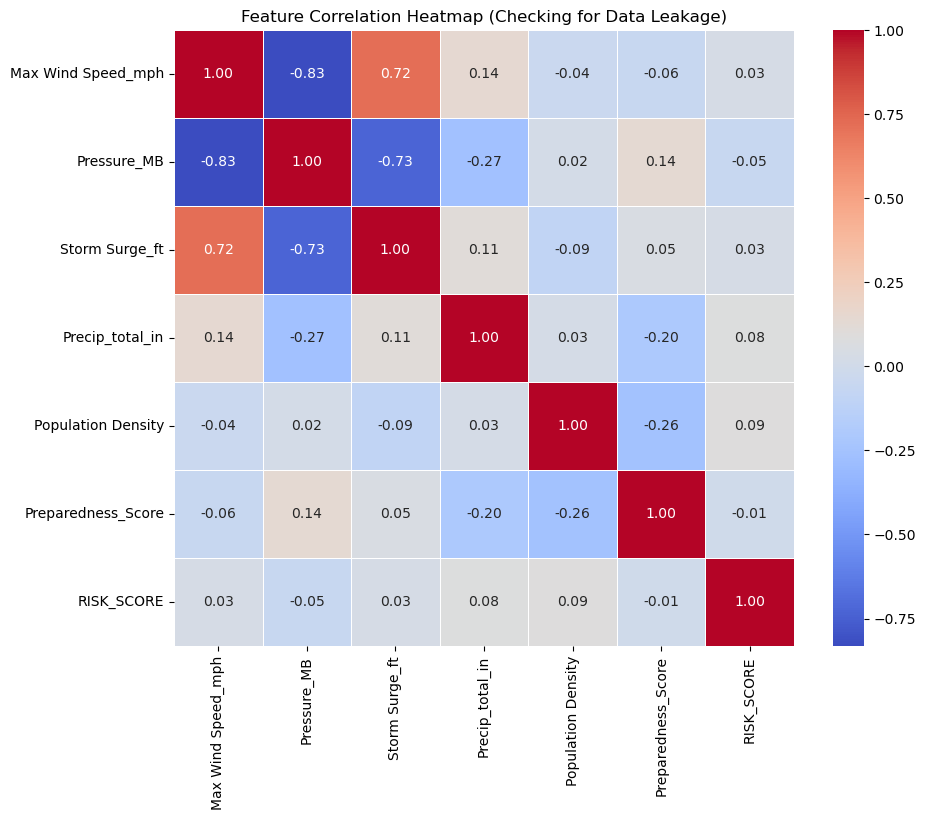


Highly Correlated Features with RISK_SCORE (Potential Leakage Check):
RISK_SCORE            1.000000
Population Density    0.089715
Precip_total_in       0.081500
Pressure_MB           0.051896
Max Wind Speed_mph    0.033038
Storm Surge_ft        0.027929
Preparedness_Score    0.005651
Name: RISK_SCORE, dtype: float64


In [34]:
# Compute correlation matrix for data leakage check
correlation_matrix = df_clean_test13.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Checking for Data Leakage)")
plt.show()

# Identify features highly correlated with RISK_SCORE (above 0.8 threshold)
high_correlation_features = correlation_matrix["RISK_SCORE"].abs().sort_values(ascending=False)

# Print highly correlated features
print("\nHighly Correlated Features with RISK_SCORE (Potential Leakage Check):")
print(high_correlation_features)



TEST 14 – GBM with Engineered Pre-Storm Vulnerability Metric
Mean Squared Error: 3.4377
R² Score: 0.8331

Feature Importance Analysis (GBM with Pre-Storm Metric):
                  Feature  Importance
4      Population Density    0.581991
6      Preparedness_Score    0.170967
5  PreStorm_Vulnerability    0.162209
0      Max Wind Speed_mph    0.025286
2          Storm Surge_ft    0.024336
1             Pressure_MB    0.020339
3         Precip_total_in    0.014872


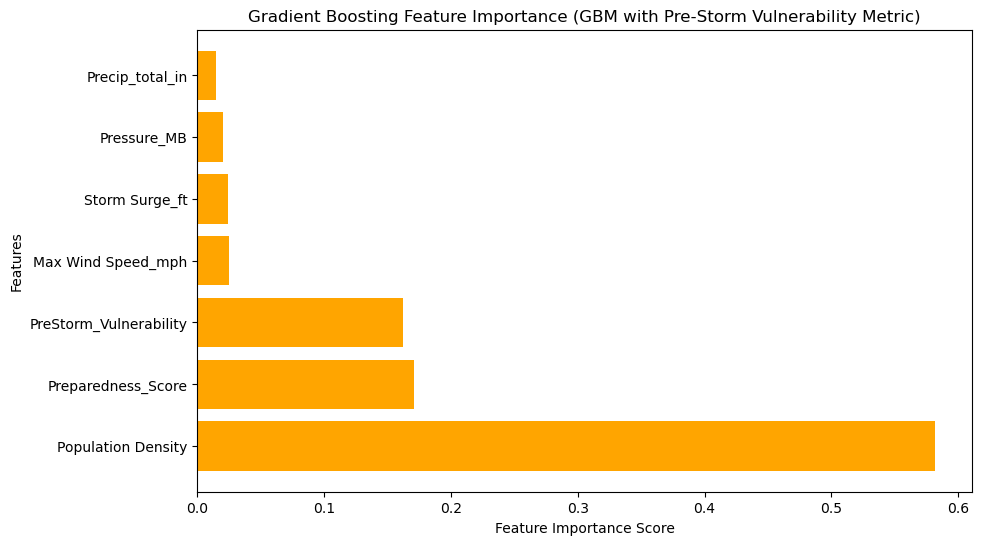

In [36]:
# Re-import necessary libraries since execution state was reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_no_unneeded_data.csv"
df = pd.read_csv(file_path)

# **Test 14 – Replace Damage Index with an Engineered Pre-Storm Vulnerability Metric**
# Create a new pre-storm metric based on available features
df["PreStorm_Vulnerability"] = (df["Population Density"] * df["Preparedness_Score"]) / df["Pressure_MB"]

# Define selected features replacing Damage Index with the engineered metric
selected_features_test14 = [
    "Max Wind Speed_mph", "Pressure_MB", "Storm Surge_ft", "Precip_total_in",
    "Population Density", "PreStorm_Vulnerability", "Preparedness_Score"
]

target_variable = "RISK_SCORE"

# Ensure no missing values before processing
df_clean_test14 = df[selected_features_test14 + [target_variable]].dropna()

# Apply feature scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean_test14[selected_features_test14])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df_clean_test14[target_variable], test_size=0.2, random_state=42, shuffle=True
)

# Train Gradient Boosting model with the engineered pre-storm metric
gbm_model_pre_storm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=5, random_state=42)
gbm_model_pre_storm.fit(X_train, y_train)

# Predict and evaluate GBM performance with the pre-storm metric
y_pred_gbm_pre_storm = gbm_model_pre_storm.predict(X_test)
mse_gbm_pre_storm = mean_squared_error(y_test, y_pred_gbm_pre_storm)
r2_gbm_pre_storm = r2_score(y_test, y_pred_gbm_pre_storm)

# Compute feature importance for GBM model with the pre-storm metric
feature_importance_gbm_pre_storm = gbm_model_pre_storm.feature_importances_

# Create a DataFrame to display feature importance values
feature_importance_df_gbm_pre_storm = pd.DataFrame({
    "Feature": selected_features_test14,
    "Importance": feature_importance_gbm_pre_storm
}).sort_values(by="Importance", ascending=False)

# Print results for GBM with the pre-storm metric
print("\nTEST 14 – GBM with Engineered Pre-Storm Vulnerability Metric")
print(f"Mean Squared Error: {mse_gbm_pre_storm:.4f}")
print(f"R² Score: {r2_gbm_pre_storm:.4f}")

# Print feature importance results
print("\nFeature Importance Analysis (GBM with Pre-Storm Metric):")
print(feature_importance_df_gbm_pre_storm)

# Plot feature importance for GBM with the pre-storm metric
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_gbm_pre_storm["Feature"], feature_importance_df_gbm_pre_storm["Importance"], color='orange')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Gradient Boosting Feature Importance (GBM with Pre-Storm Vulnerability Metric)")
plt.show()




In [38]:
# Recreate the engineered feature
df["PreStorm_Vulnerability"] = (df["Population Density"] * df["Preparedness_Score"]) / df["Pressure_MB"]

# Verify if the column is present
if "PreStorm_Vulnerability" not in df.columns:
    raise KeyError("❌ 'PreStorm_Vulnerability' column was not successfully created.")
else:
    print("✅ 'PreStorm_Vulnerability' successfully created!")


✅ 'PreStorm_Vulnerability' successfully created!


✅ Created 'PreStorm_Vulnerability' feature successfully!
Epoch 1/100


c:\Users\dson.AzureAD\anaconda3\envs\neural_net\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 9084.1465 - mae: 95.1588 - val_loss: 8796.8643 - val_mae: 93.6738
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8239.3428 - mae: 90.5605 - val_loss: 6140.4717 - val_mae: 77.8259
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4885.4629 - mae: 67.8941 - val_loss: 1083.8164 - val_mae: 27.3568
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1509.0349 - mae: 28.7522 - val_loss: 782.7208 - val_mae: 22.3351
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1077.3542 - mae: 25.9281 - val_loss: 614.4515 - val_mae: 21.1607
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 720.7859 - mae: 22.6893 - val_loss: 282.0557 - val_mae: 13.0009
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 662.4174 - mae: 19.2637 - val_loss: 222.5624 - val_mae: 12.4072
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 509.8053 - mae: 18.6200 - val_loss: 234.7220 - val_mae: 12.4475
Epoch 9/100
8/8 ━━━━━━━━━━━━

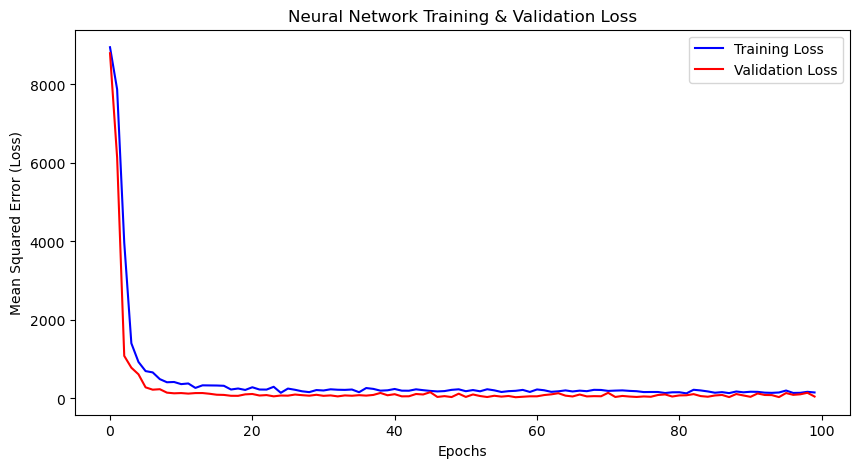

In [40]:
# Re-import necessary libraries since execution state was reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the dataset
file_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_no_unneeded_data.csv"
df = pd.read_csv(file_path)

# **Ensure PreStorm_Vulnerability is correctly created**
if "PreStorm_Vulnerability" not in df.columns:
    df["PreStorm_Vulnerability"] = (df["Population Density"] * df["Preparedness_Score"]) / df["Pressure_MB"]
    print("✅ Created 'PreStorm_Vulnerability' feature successfully!")
else:
    print("✅ 'PreStorm_Vulnerability' already exists.")

# Define selected features for Neural Network
selected_features_test15 = [
    "Max Wind Speed_mph", "Pressure_MB", "Storm Surge_ft", "Precip_total_in",
    "Population Density", "PreStorm_Vulnerability", "Preparedness_Score"
]

target_variable = "RISK_SCORE"

# Ensure no missing values before processing
df_clean_test15 = df[selected_features_test15 + [target_variable]].dropna()

# Apply feature scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean_test15[selected_features_test15])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df_clean_test15[target_variable], test_size=0.2, random_state=42, shuffle=True
)

# Build Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Prevent overfitting
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)  # Regression output (single continuous value)
])

# Compile model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='mse', metrics=['mae'])

# Train Neural Network
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16, verbose=1)

# Predict and evaluate Neural Network performance
y_pred_nn = model.predict(X_test)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

# Print Neural Network results
print("\nTEST 15 – Neural Network Model (Deep Learning)")
print(f"Mean Squared Error: {mse_nn:.4f}")
print(f"R² Score: {r2_nn:.4f}")

# Plot Training & Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (Loss)")
plt.title("Neural Network Training & Validation Loss")
plt.legend()
plt.show()


✅ Created 'PreStorm_Vulnerability' feature successfully!
Epoch 1/200


c:\Users\dson.AzureAD\anaconda3\envs\neural_net\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 8912.0332 - mae: 94.1297 - val_loss: 8830.4209 - val_mae: 93.8553
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8177.2100 - mae: 90.1471 - val_loss: 5855.3408 - val_mae: 75.8693
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4607.6479 - mae: 65.4035 - val_loss: 1132.7460 - val_mae: 28.3362
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1981.3929 - mae: 31.9125 - val_loss: 656.1978 - val_mae: 21.4349
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 760.6292 - mae: 22.8669 - val_loss: 718.9034 - val_mae: 23.8548
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 959.3591 - mae: 26.2106 - val_loss: 290.5887 - val_mae: 13.7422
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 812.2705 - mae: 23.7340 - val_loss: 229.8183 - val_mae: 11.7536
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 775.0278 - mae: 23.4640 - val_loss: 516.7009 - val_mae: 20.3201
Epoch 9/200
8/8 ━━━━━━━━━━━━━

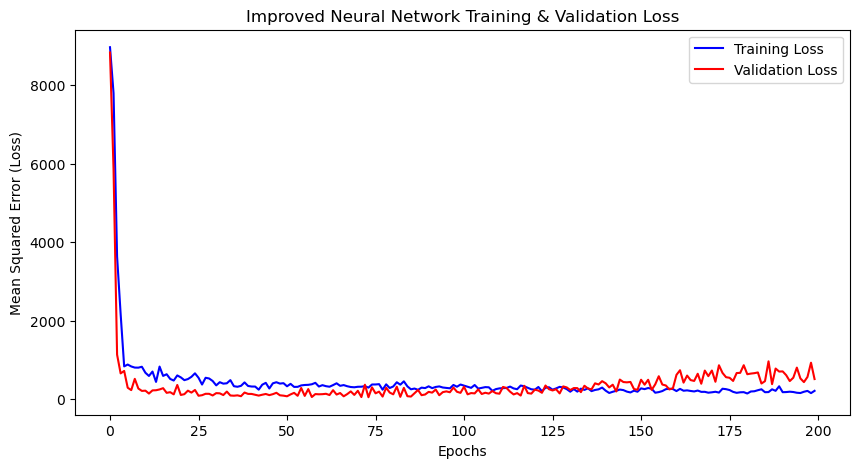

In [41]:
# Re-import necessary libraries since execution state was reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the dataset
file_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_no_unneeded_data.csv"
df = pd.read_csv(file_path)

# **Test 16 – Improved Neural Network (Deeper Architecture, Better Scaling)**
# Ensure PreStorm_Vulnerability is correctly created
if "PreStorm_Vulnerability" not in df.columns:
    df["PreStorm_Vulnerability"] = (df["Population Density"] * df["Preparedness_Score"]) / df["Pressure_MB"]
    print("✅ Created 'PreStorm_Vulnerability' feature successfully!")
else:
    print("✅ 'PreStorm_Vulnerability' already exists.")

# Define selected features for Neural Network (Deep Learning)
selected_features_test16 = [
    "Max Wind Speed_mph", "Pressure_MB", "Storm Surge_ft", "Precip_total_in",
    "Population Density", "PreStorm_Vulnerability", "Preparedness_Score"
]

target_variable = "RISK_SCORE"

# Ensure no missing values before processing
df_clean_test16 = df[selected_features_test16 + [target_variable]].dropna()

# Apply feature scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean_test16[selected_features_test16])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df_clean_test16[target_variable], test_size=0.2, random_state=42, shuffle=True
)

# Build an Improved Neural Network Model (Deeper Architecture)
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1)  # Regression output (single continuous value)
])

# Compile model with a lower learning rate for stability
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005), loss='mse', metrics=['mae'])

# Train Neural Network with more epochs
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=16, verbose=1)

# Predict and evaluate Neural Network performance
y_pred_nn_improved = model.predict(X_test)
mse_nn_improved = mean_squared_error(y_test, y_pred_nn_improved)
r2_nn_improved = r2_score(y_test, y_pred_nn_improved)

# Print Neural Network results
print("\nTEST 16 – Improved Neural Network Model (Deep Learning)")
print(f"Mean Squared Error: {mse_nn_improved:.4f}")
print(f"R² Score: {r2_nn_improved:.4f}")

# Plot Training & Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (Loss)")
plt.title("Improved Neural Network Training & Validation Loss")
plt.legend()
plt.show()


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_no_unneeded_data.csv"
df = pd.read_csv(file_path)

# Ensure PreStorm_Vulnerability is correctly created
if "PreStorm_Vulnerability" not in df.columns:
    df["PreStorm_Vulnerability"] = (df["Population Density"] * df["Preparedness_Score"]) / df["Pressure_MB"]
    print("✅ Created 'PreStorm_Vulnerability' feature successfully!")
else:
    print("✅ 'PreStorm_Vulnerability' already exists.")

# Define selected features (Best set from previous tests)
selected_features_final = [
    "Max Wind Speed_mph", "Pressure_MB", "Storm Surge_ft", "Precip_total_in",
    "Population Density", "PreStorm_Vulnerability", "Preparedness_Score"
]

target_variable = "RISK_SCORE"

# Ensure no missing values before processing
df_clean_final = df[selected_features_final + [target_variable]].dropna()

# Apply feature scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean_final[selected_features_final])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df_clean_final[target_variable], test_size=0.2, random_state=42, shuffle=True
)

# Initialize models for final comparison
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=5, random_state=42),
}

# Store results for final model selection
final_results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    final_results[name] = {
        "MSE": mse,
        "R² Score": r2
    }

    # Print results for each model
    print(f"\n{name} – Final Model Test")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")

# Compare results across models
final_results_df = pd.DataFrame(final_results).T

# Display summary results
print(final_results_df)


✅ Created 'PreStorm_Vulnerability' feature successfully!

Random Forest – Final Model Test
Mean Squared Error: 3.6766
R² Score: 0.8215

Gradient Boosting – Final Model Test
Mean Squared Error: 3.4377
R² Score: 0.8331
                        MSE  R² Score
Random Forest      3.676553  0.821505
Gradient Boosting  3.437690  0.833102


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_no_unneeded_data.csv"
df = pd.read_csv(file_path)

# Ensure PreStorm_Vulnerability is correctly created
if "PreStorm_Vulnerability" not in df.columns:
    df["PreStorm_Vulnerability"] = (df["Population Density"] * df["Preparedness_Score"]) / df["Pressure_MB"]
    print("✅ Created 'PreStorm_Vulnerability' feature successfully!")

# Define selected features
selected_features_final = [
    "Max Wind Speed_mph", "Pressure_MB", "Storm Surge_ft", "Precip_total_in",
    "Population Density", "PreStorm_Vulnerability", "Preparedness_Score"
]

target_variable = "RISK_SCORE"

# Ensure no missing values
df_clean_final = df[selected_features_final + [target_variable]].dropna()

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean_final[selected_features_final])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df_clean_final[target_variable], test_size=0.2, random_state=42, shuffle=True
)

# Initialize models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=5, random_state=42),
}

# Run cross-validation and model evaluation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
validation_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    cv_scores = cross_val_score(model, X_scaled, df_clean_final[target_variable], cv=kf, scoring='r2')
    
    validation_results[name] = {
        "MSE": mse,
        "R² Score": r2,
        "Cross-Validation Mean R²": np.mean(cv_scores),
        "Cross-Validation Std R²": np.std(cv_scores)
    }
    
    print(f"\n{name} – Validation Results")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print(f"Cross-Validation Mean R²: {np.mean(cv_scores):.4f}")
    print(f"Cross-Validation Std R²: {np.std(cv_scores):.4f}")

# Convert results to DataFrame for final review
validation_results_df = pd.DataFrame(validation_results).T

# Display results
print("\nFinal Model Validation Results:")
print(validation_results_df)

✅ Created 'PreStorm_Vulnerability' feature successfully!

Random Forest – Validation Results
Mean Squared Error: 3.6766
R² Score: 0.8215
Cross-Validation Mean R²: 0.5444
Cross-Validation Std R²: 0.2271

Gradient Boosting – Validation Results
Mean Squared Error: 3.4377
R² Score: 0.8331
Cross-Validation Mean R²: 0.6141
Cross-Validation Std R²: 0.2495

Final Model Validation Results:
                        MSE  R² Score  Cross-Validation Mean R²  \
Random Forest      3.676553  0.821505                  0.544374   
Gradient Boosting  3.437690  0.833102                  0.614116   

                   Cross-Validation Std R²  
Random Forest                     0.227056  
Gradient Boosting                 0.249493  


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge

# Load the dataset
file_path = r"C:\Users\dson.AzureAD\PROJECT_4\proj_4_docs\FINAL_Dataset_no_unneeded_data.csv"
df = pd.read_csv(file_path)

# Ensure PreStorm_Vulnerability is correctly created
if "PreStorm_Vulnerability" not in df.columns:
    df["PreStorm_Vulnerability"] = (df["Preparedness_Score"] * df["Pressure_MB"]) / df["Storm Surge_ft"]
    print("✅ Created 'PreStorm_Vulnerability' feature successfully!")

# Define selected features (With and Without Population Density)
selected_features_with_exposure = [
    "Max Wind Speed_mph", "Pressure_MB", "Storm Surge_ft", "Precip_total_in",
    "Population Density", "PreStorm_Vulnerability", "Preparedness_Score"
]

selected_features_without_exposure = [
    "Max Wind Speed_mph", "Pressure_MB", "Storm Surge_ft", "Precip_total_in",
    "PreStorm_Vulnerability", "Preparedness_Score"
]

target_variable = "RISK_SCORE"

# Ensure no missing values before processing
df_clean_with_exposure = df[selected_features_with_exposure + [target_variable]].dropna()
df_clean_without_exposure = df[selected_features_without_exposure + [target_variable]].dropna()

# Apply feature scaling (Standardization)
scaler = StandardScaler()
X_scaled_with_exposure = scaler.fit_transform(df_clean_with_exposure[selected_features_with_exposure])
X_scaled_without_exposure = scaler.fit_transform(df_clean_without_exposure[selected_features_without_exposure])

# Train-test split
X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(
    X_scaled_with_exposure, df_clean_with_exposure[target_variable], test_size=0.2, random_state=42, shuffle=True
)

X_train_no_exp, X_test_no_exp, y_train_no_exp, y_test_no_exp = train_test_split(
    X_scaled_without_exposure, df_clean_without_exposure[target_variable], test_size=0.2, random_state=42, shuffle=True
)

# Define models with regularization
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=5, random_state=42)

# Train and evaluate models with exposure bias
rf_model.fit(X_train_exp, y_train_exp)
gbm_model.fit(X_train_exp, y_train_exp)

y_pred_rf_exp = rf_model.predict(X_test_exp)
y_pred_gbm_exp = gbm_model.predict(X_test_exp)

# Train and evaluate models without exposure bias
rf_model.fit(X_train_no_exp, y_train_no_exp)
gbm_model.fit(X_train_no_exp, y_train_no_exp)

y_pred_rf_no_exp = rf_model.predict(X_test_no_exp)
y_pred_gbm_no_exp = gbm_model.predict(X_test_no_exp)

# Cross-validation setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_rf = cross_val_score(rf_model, X_scaled_without_exposure, df_clean_without_exposure[target_variable], cv=skf, scoring='r2')
cv_scores_gbm = cross_val_score(gbm_model, X_scaled_without_exposure, df_clean_without_exposure[target_variable], cv=skf, scoring='r2')

# Ensemble model combining RF & GBM
ensemble_model = StackingRegressor(estimators=[('rf', rf_model), ('gbm', gbm_model)], final_estimator=Ridge())
ensemble_model.fit(X_train_no_exp, y_train_no_exp)
y_pred_ensemble = ensemble_model.predict(X_test_no_exp)

# Calculate performance metrics
results = {
    "Model": ["Random Forest (With Exposure)", "Gradient Boosting (With Exposure)",
               "Random Forest (Without Exposure)", "Gradient Boosting (Without Exposure)",
               "Ensemble Model (RF + GBM)"],
    "MSE": [
        mean_squared_error(y_test_exp, y_pred_rf_exp),
        mean_squared_error(y_test_exp, y_pred_gbm_exp),
        mean_squared_error(y_test_no_exp, y_pred_rf_no_exp),
        mean_squared_error(y_test_no_exp, y_pred_gbm_no_exp),
        mean_squared_error(y_test_no_exp, y_pred_ensemble)
    ],
    "R² Score": [
        r2_score(y_test_exp, y_pred_rf_exp),
        r2_score(y_test_exp, y_pred_gbm_exp),
        r2_score(y_test_no_exp, y_pred_rf_no_exp),
        r2_score(y_test_no_exp, y_pred_gbm_no_exp),
        r2_score(y_test_no_exp, y_pred_ensemble)
    ],
    "Cross-Validation Mean R²": [
        np.mean(cv_scores_rf),
        np.mean(cv_scores_gbm),
        np.mean(cv_scores_rf),
        np.mean(cv_scores_gbm),
        "N/A"
    ]
}

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print results
print("\nFinal Model Performance Comparisons:")
print(results_df)


✅ Created 'PreStorm_Vulnerability' feature successfully!


ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

In [49]:
if "PreStorm_Vulnerability" not in df.columns:
    df["PreStorm_Vulnerability"] = (df["Preparedness_Score"] * df["Pressure_MB"]) / df["Storm Surge_ft"]
    print("✅ Created 'PreStorm_Vulnerability' feature successfully!")

# Define selected features (With and Without Population Density)
selected_features_with_exposure = [
    "Max Wind Speed_mph", "Pressure_MB", "Storm Surge_ft", "Precip_total_in",
    "Population Density", "PreStorm_Vulnerability", "Preparedness_Score"
]

selected_features_without_exposure = [
    "Max Wind Speed_mph", "Pressure_MB", "Storm Surge_ft", "Precip_total_in",
    "PreStorm_Vulnerability", "Preparedness_Score"
]

target_variable = "RISK_SCORE"

# Ensure no missing values before processing
df_clean_with_exposure = df[selected_features_with_exposure + [target_variable]].dropna()
df_clean_without_exposure = df[selected_features_without_exposure + [target_variable]].dropna()

# Apply feature scaling (Standardization)
scaler = StandardScaler()
X_scaled_with_exposure = scaler.fit_transform(df_clean_with_exposure[selected_features_with_exposure])
X_scaled_without_exposure = scaler.fit_transform(df_clean_without_exposure[selected_features_without_exposure])

# Train-test split
X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(
    X_scaled_with_exposure, df_clean_with_exposure[target_variable], test_size=0.2, random_state=42, shuffle=True
)

X_train_no_exp, X_test_no_exp, y_train_no_exp, y_test_no_exp = train_test_split(
    X_scaled_without_exposure, df_clean_without_exposure[target_variable], test_size=0.2, random_state=42, shuffle=True
)

# Define models with regularization
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=5, random_state=42)

# Train and evaluate models with exposure bias
rf_model.fit(X_train_exp, y_train_exp)
gbm_model.fit(X_train_exp, y_train_exp)

y_pred_rf_exp = rf_model.predict(X_test_exp)
y_pred_gbm_exp = gbm_model.predict(X_test_exp)

# Train and evaluate models without exposure bias
rf_model.fit(X_train_no_exp, y_train_no_exp)
gbm_model.fit(X_train_no_exp, y_train_no_exp)

y_pred_rf_no_exp = rf_model.predict(X_test_no_exp)
y_pred_gbm_no_exp = gbm_model.predict(X_test_no_exp)

# Cross-validation setup
skf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_rf = cross_val_score(rf_model, X_scaled_without_exposure, df_clean_without_exposure[target_variable], cv=skf, scoring='r2')
cv_scores_gbm = cross_val_score(gbm_model, X_scaled_without_exposure, df_clean_without_exposure[target_variable], cv=skf, scoring='r2')

# Ensemble model combining RF & GBM
ensemble_model = StackingRegressor(estimators=[('rf', rf_model), ('gbm', gbm_model)], final_estimator=Ridge())
ensemble_model.fit(X_train_no_exp, y_train_no_exp)
y_pred_ensemble = ensemble_model.predict(X_test_no_exp)

# Calculate performance metrics
results = {
    "Model": ["Random Forest (With Exposure)", "Gradient Boosting (With Exposure)",
               "Random Forest (Without Exposure)", "Gradient Boosting (Without Exposure)",
               "Ensemble Model (RF + GBM)"],
    "MSE": [
        mean_squared_error(y_test_exp, y_pred_rf_exp),
        mean_squared_error(y_test_exp, y_pred_gbm_exp),
        mean_squared_error(y_test_no_exp, y_pred_rf_no_exp),
        mean_squared_error(y_test_no_exp, y_pred_gbm_no_exp),
        mean_squared_error(y_test_no_exp, y_pred_ensemble)
    ],
    "R² Score": [
        r2_score(y_test_exp, y_pred_rf_exp),
        r2_score(y_test_exp, y_pred_gbm_exp),
        r2_score(y_test_no_exp, y_pred_rf_no_exp),
        r2_score(y_test_no_exp, y_pred_gbm_no_exp),
        r2_score(y_test_no_exp, y_pred_ensemble)
    ],
    "Cross-Validation Mean R²": [
        np.mean(cv_scores_rf),
        np.mean(cv_scores_gbm),
        np.mean(cv_scores_rf),
        np.mean(cv_scores_gbm),
        "N/A"
    ]
}

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print results
print("\nFinal Model Performance Comparisons:")
print(results_df)



Final Model Performance Comparisons:
                                  Model        MSE  R² Score  \
0         Random Forest (With Exposure)   5.805461  0.718148   
1     Gradient Boosting (With Exposure)   3.454879  0.832267   
2      Random Forest (Without Exposure)  17.196812  0.165103   
3  Gradient Boosting (Without Exposure)  18.512891  0.101208   
4             Ensemble Model (RF + GBM)  21.476283 -0.042663   

  Cross-Validation Mean R²  
0                -0.124655  
1                 -0.11948  
2                -0.124655  
3                 -0.11948  
4                      N/A  
